# Capstone Project: Create a Customer Segmentation Report for Arvato Financial Services

In this project, you will analyze demographics data for customers of a mail-order sales company in Germany, comparing it against demographics information for the general population. You'll use unsupervised learning techniques to perform customer segmentation, identifying the parts of the population that best describe the core customer base of the company. Then, you'll apply what you've learned on a third dataset with demographics information for targets of a marketing campaign for the company, and use a model to predict which individuals are most likely to convert into becoming customers for the company. The data that you will use has been provided by our partners at Bertelsmann Arvato Analytics, and represents a real-life data science task.

If you completed the first term of this program, you will be familiar with the first part of this project, from the unsupervised learning project. The versions of those two datasets used in this project will include many more features and has not been pre-cleaned. You are also free to choose whatever approach you'd like to analyzing the data rather than follow pre-determined steps. In your work on this project, make sure that you carefully document your steps and decisions, since your main deliverable for this project will be a blog post reporting your findings.

# Overview and Table of Content

The notebook will implement this workflow:

1. [Prepare jupyter lab notebook environment](#Prepare-jupyter-lab-notebook-environment)
1. [Download Data](#Download-Data)
1. [Data exploration and cleaning](#Data-exploration-and-cleaning)
    1. [Load data from S3](##Load-data-from-S3)
    1. explore the data
    1. [Class Cleaner](#Class-Cleaner)
    1. [Data Cleaning- (handling null and empty values, unknown values, encode categorical values)](#Data-Cleaning) 
    1. [Feature Engineering](#Feature-Engineering)    
1. [Part 1: Customer Segmentation Report](#Part-1:-Customer-Segmentation-Report)
    1. Feature engineering (PCA)
1. [Part 2: Supervised Learning Model](#Part-2:-Supervised-Learning-Model)
    1. Develop a model
    1. Train a model
    1. Model validation and evaluation
    1. Hyperparameters tuning
    1. Select the best performing model based on the test results
1. [Deploy model](#Deploy-Model)

# Prepare jupyter lab notebook environment
---


In [1]:
!python --version

Python 3.7.10


## Update Conda Packages

In [2]:
!conda update -y --force-reinstall conda

Solving environment: \ 
  - defaults/linux-64::six-1.15.0-py37h06a4308_0, defaults/linux-64::tenacity-6.3.1-py37h06a4308_0, defaults/noarch::plotly-5.1.0-pyhd3eb1b0_0
  - defaults/linux-64::plotly-3.6.1-py37_0, defaults/linux-64::retrying-1.3.3-py37_2, defaults/noarch::six-1.16.0-pyhd3eb1b0done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-4.5          |            1_gnu          22 KB
    autovizwidget-0.18.0       |     pyhd3eb1b0_0          14 KB
    ca-certificates-2021.7.5   |       h06a4308_1         113 KB
    certifi-2021.5.30          |   py37h06a4308_0         139 KB
    conda-4.10.3               |   py37h06a4308_0         2.9 MB
    cryptography-3.4.7         |   py37hd23ed53_0         904 KB
    hdijupyterutils-0.19.0     |     pyhd3eb1b0_0          10 KB
    idna-

In [3]:
! conda update -y conda

Solving environment: - 
  - defaults/linux-64::six-1.15.0-py37h06a4308_0, defaults/linux-64::tenacity-6.3.1-py37h06a4308_0, defaults/noarch::plotly-5.1.0-pyhd3eb1b0_0
  - defaults/linux-64::plotly-3.6.1-py37_0, defaults/linux-64::retrying-1.3.3-py37_2, defaults/noarch::six-1.16.0-pyhd3eb1b0done

# All requested packages already installed.



In [4]:
! conda update --force-reinstall --all -y

Solving environment: | 
  - defaults/linux-64::six-1.15.0-py37h06a4308_0, defaults/linux-64::tenacity-6.3.1-py37h06a4308_0, defaults/noarch::plotly-5.1.0-pyhd3eb1b0_0
  - defaults/linux-64::plotly-3.6.1-py37_0, defaults/linux-64::retrying-1.3.3-py37_2, defaults/noarch::six-1.16.0-pyhd3eb1b0done

## Package Plan ##

  environment location: /opt/conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    anaconda-client-1.8.0      |   py37h06a4308_0         150 KB
    anaconda-project-0.10.1    |     pyhd3eb1b0_0         218 KB
    anyio-2.2.0                |   py37h06a4308_1         123 KB
    appdirs-1.4.4              |     pyhd3eb1b0_0          12 KB
    argon2-cffi-20.1.0         |   py37h27cfd23_1          46 KB
    asn1crypto-1.4.0           |             py_0          80 KB
    astroid-2.6.6              |   py37h06a4308_0         311 KB
    astropy-4.3.1              |   py37h09021b7

In [5]:
! conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
aiobotocore               1.4.1                    pypi_0    pypi
aiohttp                   3.7.4.post0              pypi_0    pypi
aioitertools              0.8.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda-client           1.8.0            py37h06a4308_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py37h06a4308_1  
appdirs                   1.4.4              pyhd3eb1b0_0  
argh                      0.26.2                   py37_0  
argon2-cffi               21.1.0                   pypi_0    pypi
asn1crypto                1.4.0                      py_0  
astroid                   2.8.0                    pypi_0    pypi
astropy             

## Activate intelex for scikit
see [activate intelex for scikit](https://intel.github.io/scikit-learn-intelex/index.html)

In [10]:
! conda install -y -c districtdatalabs -c conda-forge xgboost==1.4.0  imbalanced-learn==1.4.0  yellowbrick==1.3.post1 pyarrow==5.0.0 scikit-learn-intelex==2021.2.1

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - imbalanced-learn
    - pyarrow
    - scikit-learn-intelex
    - xgboost
    - yellowbrick==1.3.post1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB  conda-forge
    abseil-cpp-20210324.0      |       h9c3ff4c_0        1011 KB  conda-forge
    arrow-cpp-4.0.0            |py37he4eac6b_0_cpu        22.2 MB  conda-forge
    aws-c-common-0.4.57        |       he1b5a44_1         159 KB  conda-forge
    aws-c-event-stream-0.1.6   |       h72b8ae1_3          25 KB  conda-forge
    aws-checksums-0.1.9        |       h346380f_0      

In [11]:
! conda list

# packages in environment at /opt/conda:
#
# Name                    Version                   Build  Channel
_libgcc_mutex             0.1                        main  
_openmp_mutex             4.5                       1_gnu  
_py-xgboost-mutex         2.0                       cpu_0    conda-forge
abseil-cpp                20210324.0           h9c3ff4c_0    conda-forge
aiobotocore               1.4.1                    pypi_0    pypi
aiohttp                   3.7.4.post0              pypi_0    pypi
aioitertools              0.8.0                    pypi_0    pypi
alabaster                 0.7.12                   py37_0  
anaconda-client           1.8.0            py37h06a4308_0  
anaconda-project          0.10.1             pyhd3eb1b0_0  
anyio                     2.2.0            py37h06a4308_1  
appdirs                   1.4.4              pyhd3eb1b0_0  
argh                      0.26.2                   py37_0  
argon2-cffi               21.1.0                   pypi_0    pypi


## Auto Reload Modules 
configure auto-reload of modules when they have been changed - this simplifies developing and testing

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

## Imports and global configs

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import progressbar

# magic word for producing visualizations in notebook
%matplotlib inline
sns.set_theme()

In [4]:
# display the N columns and rows
pd.set_option('display.max_columns', 50)

pd.set_option('display.max_rows', 100)

# Download Data
---
The four data sets
- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).
    
and two files of description    
- `DIAS Attributes - Values 2017.xlsx`
- `DIAS Information Levels - Attributes 2017.xlsx`

can be downloaded from the Udacity project workspace.

# Data exploration and cleaning
---

There are four data files associated with this project:

- `Udacity_AZDIAS_052018.csv`: Demographics data for the general population of Germany; 891 211 persons (rows) x 366 features (columns).
- `Udacity_CUSTOMERS_052018.csv`: Demographics data for customers of a mail-order company; 191 652 persons (rows) x 369 features (columns).
- `Udacity_MAILOUT_052018_TRAIN.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 982 persons (rows) x 367 (columns).
- `Udacity_MAILOUT_052018_TEST.csv`: Demographics data for individuals who were targets of a marketing campaign; 42 833 persons (rows) x 366 (columns).

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. Use the information from the first two files to figure out how customers ("CUSTOMERS") are similar to or differ from the general population at large ("AZDIAS"), then use your analysis to make predictions on the other two files ("MAILOUT"), predicting which recipients are most likely to become a customer for the mail-order company.

The "CUSTOMERS" file contains three extra columns ('CUSTOMER_GROUP', 'ONLINE_PURCHASE', and 'PRODUCT_GROUP'), which provide broad information about the customers depicted in the file. The original "MAILOUT" file included one additional column, "RESPONSE", which indicated whether or not each recipient became a customer of the company. For the "TRAIN" subset, this column has been retained, but in the "TEST" subset it has been removed; it is against that withheld column that your final predictions will be assessed in the Kaggle competition.

Otherwise, all of the remaining columns are the same between the three data files. For more information about the columns depicted in the files, you can refer to two Excel spreadsheets provided in the workspace. [One of them](./DIAS Information Levels - Attributes 2017.xlsx) is a top-level list of attributes and descriptions, organized by informational category. [The other](./DIAS Attributes - Values 2017.xlsx) is a detailed mapping of data values for each feature in alphabetical order.

In the below cell, we've provided some initial code to load in the first two datasets. Note for all of the `.csv` data files in this project that they're semicolon (`;`) delimited, so an additional argument in the [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) call has been included to read in the data properly. Also, considering the size of the datasets, it may take some time for them to load completely.

You'll notice when the data is loaded in that a warning message will immediately pop up. Before you really start digging into the modeling and analysis, you're going to need to perform some cleaning. Take some time to browse the structure of the data and look over the informational spreadsheets to understand the data values. Make some decisions on which features to keep, which features to drop, and if any revisions need to be made on data formats. It'll be a good idea to create a function with pre-processing steps, since you'll need to clean all of the datasets before you work with them.

## Load Data from S3
The load script assumes that the downloaded data has been transferred to S3.

The data load of the AZDIAS data set takes more than a minute the CUSTOMERS data set should be loaded in less than 20 secs


In [5]:
import os
if os.path.exists('data') and os.path.isdir('data'):
    prefix = './data'
else:
    prefix = 's3://sagemaker-eu-central-1-292575554790/dsnd_arvato'

In [6]:
! aws s3 ls s3://sagemaker-eu-central-1-292575554790/dsnd_arvato/

2021-08-26 12:23:24          0 
2021-08-26 12:23:57      79449 DIAS Attributes - Values 2017.xlsx
2021-08-26 12:23:57      32798 DIAS Information Levels - Attributes 2017.xlsx
2021-08-26 12:23:56  681624835 Udacity_AZDIAS_052018.csv
2021-08-26 12:23:56  144487786 Udacity_CUSTOMERS_052018.csv
2021-08-26 12:23:56   31968574 Udacity_MAILOUT_052018_TEST.csv
2021-08-26 12:23:56   32122983 Udacity_MAILOUT_052018_TRAIN.csv
2021-09-21 14:20:20    1074165 bauerst_prediction_2021_09_14_01.csv
2021-09-21 15:24:53     711515 bauerst_prediction_2021_09_15-pipe4-01.csv
2021-09-15 15:59:00     714772 bauerst_prediction_2021_09_15-pipe5-01.csv
2021-09-22 07:03:59   21332306 df_mailout_train_vanDeep


In [7]:
%%time
df_azdias = pd.read_csv(f'{prefix}/Udacity_AZDIAS_052018.csv', sep=';', index_col='LNR')
# load in the data
#azdias = pd.read_csv('data/Udacity_AZDIAS_052018.csv', sep=';')
#customers = pd.read_csv('data/Udacity_CUSTOMERS_052018.csv', sep=';')

/opt/conda/lib/python3.7/site-packages/IPython/core/magics/execution.py:1321: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code, glob, local_ns)


CPU times: user 20.8 s, sys: 4.51 s, total: 25.3 s
Wall time: 41.1 s


In [8]:
%%time
df_customers = pd.read_csv(f'{prefix}/Udacity_CUSTOMERS_052018.csv', sep=';', index_col='LNR')

CPU times: user 4.43 s, sys: 345 ms, total: 4.77 s
Wall time: 8.31 s


In [9]:
df_azdias.head()

AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  ALTER_KIND2  ALTER_KIND3  \
LNR                                                                             
910215        -1         NaN       NaN          NaN          NaN          NaN   
910220        -1         9.0       0.0          NaN          NaN          NaN   
910225        -1         9.0      17.0          NaN          NaN          NaN   
910226         2         1.0      13.0          NaN          NaN          NaN   
910241        -1         1.0      20.0          NaN          NaN          NaN   

        ALTER_KIND4  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
LNR                                                                            
910215          NaN                   NaN                  NaN           NaN   
910220          NaN                  21.0                 11.0           0.0   
910225          NaN                  17.0                 10.0           0.0   
910226          NaN                  13.0                  1.0           0.0   
910241          NaN                  14.0                  3.0           0.0   

        ANZ_KINDER  ANZ_PERSONEN  ANZ_STATISTISCHE_HAUSHALTE  ANZ_TITEL  \
LNR                                                                       
910215         NaN           NaN                         NaN        NaN   
910220         0.0           2.0                        12.0        0.0   
910225         0.0           1.0                         7.0        0.0   
910226         0.0           0.0                         2.0        0.0   
910241         0.0           4.0                         3.0        0.0   

        ARBEIT  BALLRAUM CAMEO_DEU_2015 CAMEO_DEUG_2015 CAMEO_INTL_2015  \
LNR                                                                       
910215     NaN       NaN            NaN             NaN             NaN   
910220     3.0       6.0             8A             8.0            51.0   
910225     3.0       2.0             4C             4.0            24.0   
910226     2.0       4.0             2A             2.0            12.0   
910241     4.0       2.0             6B             6.0            43.0   

        CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  CJT_TYP_2  CJT_TYP_3  \
LNR                                                                         
910215            2.0                5.0        1.0        1.0        5.0   
910220            5.0                1.0        5.0        5.0        2.0   
910225            3.0                2.0        4.0        4.0        1.0   
910226            2.0                3.0        2.0        2.0        4.0   
910241            5.0                3.0        3.0        3.0        3.0   

        CJT_TYP_4  ...  SEMIO_RAT  SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  \
LNR                ...                                                 
910215        5.0  ...          4          7          2            3   
910220        3.0  ...          6          4          5            6   
910225        3.0  ...          4          3          4            3   
910226        4.0  ...          3          2          5            4   
910241        4.0  ...          2          4          6            2   

        SEMIO_VERT  SHOPPER_TYP  SOHO_KZ  STRUKTURTYP  TITEL_KZ  UMFELD_ALT  \
LNR                                                                           
910215           1           -1      NaN          NaN       NaN         NaN   
910220           1            3      1.0          2.0       0.0         3.0   
910225           4            2      0.0          3.0       0.0         2.0   
910226           4            1      0.0          1.0       0.0         4.0   
910241           7            2      0.0          3.0       0.0         4.0   

        UMFELD_JUNG  UNGLEICHENN_FLAG  VERDICHTUNGSRAUM  VERS_TYP  VHA  VHN  \
LNR                                                                           
910215          NaN               NaN               NaN        -1  NaN

In [10]:
df_azdias.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 365 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(92), object(6)
memory usage: 2.4+ GB


In [11]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191652 entries, 9626 to 148883
Columns: 368 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(93), object(8)
memory usage: 539.5+ MB


## Checks 


### Data errors during load
during the load process we got two error messages for columns 18 and 19. I will check this here

In [12]:
# column 18 has 0-based index 17
df_azdias.iloc[:,17].unique()

array([nan, 8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7',
       '2', '8', '9', '6', '5', '1', 'X'], dtype=object)

In [13]:
# column 19 has 0-based index 18
df_customers.iloc[:,18].unique()

array([13.0, nan, 34.0, 24.0, 41.0, 23.0, 15.0, 55.0, 14.0, 22.0, 43.0,
       51.0, 33.0, 25.0, 44.0, 54.0, 32.0, 12.0, 35.0, 31.0, 45.0, 52.0,
       '45', '25', '55', '51', '14', '54', '43', '22', '15', '24', '35',
       '23', '12', '44', '41', '52', '31', '13', '34', '32', '33', 'XX'],
      dtype=object)

In [14]:
df_azdias.columns[17:19]

Index(['CAMEO_DEUG_2015', 'CAMEO_INTL_2015'], dtype='object')


**Result:** The errors is caused by string values "X" and "XX" in the datasets in columns CAMEO_DEUG_2015 and CAMEO_INTL_2015.

I will add some code to the Data Cleaner class to handle this


### check for duplicates
check if dataset contains duplicate records 
1. based on column ID LNR and 
1. based on identical records  (same values for all features)

In [15]:
df_azdias.index.duplicated().sum()

0

In [16]:
df_customers.index.duplicated().sum()

0

In [17]:
t1=df_azdias.drop_duplicates()
delta1 = df_azdias.shape[0] -t1.shape[0]

In [18]:
delta1/df_azdias.shape[0]

0.05134753332787266

In [19]:
t2=df_customers.drop_duplicates()
delta2 = df_customers.shape[0] -t2.shape[0]

In [20]:
delta2/df_customers.shape[0]

0.2145607663890802

## Loading & Explore Metadata

### Load Metadata

In [21]:
df_metadata = pd.read_excel(f'{prefix}/DIAS Attributes - Values 2017.xlsx', usecols='B:E', dtype='str', header=1).fillna(method='ffill')
df_metadata.head()

Attribute         Description Value                     Meaning
0  AGER_TYP  best-ager typology    -1                     unknown
1  AGER_TYP  best-ager typology     0  no classification possible
2  AGER_TYP  best-ager typology     1             passive elderly
3  AGER_TYP  best-ager typology     2            cultural elderly
4  AGER_TYP  best-ager typology     3   experience-driven elderly

### Explore Metadata

1. check nulls
2. check unkown values

In [22]:
df_metadata.isnull().sum()

Attribute      0
Description    0
Value          0
Meaning        0
dtype: int64

In [23]:
f"Number of unique attributes: {df_metadata['Attribute'].unique().shape[0]}"

'Number of unique attributes: 314'

In [24]:
f"Number of Attributes that can be unnkown value: {df_metadata['Meaning'].str.contains('unknown').sum()}"

'Number of Attributes that can be unnkown value: 233'

In [25]:
f"Number of Attributes that can be `no transaction known` value: {df_metadata['Meaning'].str.contains('no transaction.? known', regex=True).sum()}"

'Number of Attributes that can be `no transaction known` value: 56'

In [26]:
f"Total: {df_metadata['Meaning'].str.contains('unknown').sum() + df_metadata['Meaning'].str.contains('no transaction.? known', regex=True).sum()}"

'Total: 289'

In [27]:
df_metadata[df_metadata['Meaning'].str.contains('no transaction.? known', regex=True)]

Attribute  \
138          D19_BANKEN_ANZ_12   
145          D19_BANKEN_ANZ_24   
161           D19_BANKEN_DATUM   
162       D19_BANKEN_DIREKT_RZ   
170        D19_BANKEN_GROSS_RZ   
178        D19_BANKEN_LOKAL_RZ   
195   D19_BANKEN_OFFLINE_DATUM   
205    D19_BANKEN_ONLINE_DATUM   
217         D19_BANKEN_REST_RZ   
225      D19_BEKLEIDUNG_GEH_RZ   
233     D19_BEKLEIDUNG_REST_RZ   
241             D19_BILDUNG_RZ   
249            D19_BIO_OEKO_RZ   
257                D19_BUCH_RZ   
265          D19_DIGIT_SERV_RZ   
273     D19_DROGERIEARTIKEL_RZ   
281             D19_ENERGIE_RZ   
289            D19_FREIZEIT_RZ   
297              D19_GARTEN_RZ   
305          D19_GESAMT_ANZ_12   
312          D19_GESAMT_ANZ_24   
328           D19_GESAMT_DATUM   
338   D19_GESAMT_OFFLINE_DATUM   
348    D19_GESAMT_ONLINE_DATUM   
360            D19_HANDWERK_RZ   
368           D19_HAUS_DEKO_RZ   
376       D19_KINDERARTIKEL_RZ   
398            D19_KOSMETIK_RZ   
406        D19_LEBENSMITTEL_RZ   
414               D19_LOTTO_RZ   
422  D19_NAHRUNGSERGAENZUNG_RZ   
430            D19_RATGEBER_RZ   
438              D19_REISEN_RZ   
446       D19_SAMMELARTIKEL_RZ   
454              D19_SCHUHE_RZ   
462            D19_SONSTIGE_RZ   
470             D19_TECHNIK_RZ   
478           D19_TELKO_ANZ_12   
485           D19_TELKO_ANZ_24   
501            D19_TELKO_DATUM   
502        D19_TELKO_MOBILE_RZ   
519    D19_TELKO_OFFLINE_DATUM   
529     D19_TELKO_ONLINE_DATUM   
530          D19_TELKO_REST_RZ   
538         D19_TIERARTIKEL_RZ   
546         D19_VERSAND_ANZ_12   
553         D19_VERSAND_ANZ_24   
569          D19_VERSAND_DATUM   
579  D19_VERSAND_OFFLINE_DATUM   
589   D19_VERSAND_ONLINE_DATUM   
601        D19_VERSAND_REST_RZ   
609      D19_VERSICHERUNGEN_RZ   
617           D19_VERSI_ANZ_12   
624           D19_VERSI_ANZ_24   
631       D19_VOLLSORTIMENT_RZ   
639       D19_WEIN_FEINKOST_RZ   

                                           Description Value  \
138   transaction activity BANKS in the last 12 months     0   
145   transaction activity BANKS in the last 24 months     0   
161  actuality of the last transaction for the segm...    10   
162  transactional activity based on the product gr...     0   
170  transactional activity based on the product gr...     0   
178  transactional activity based on the product gr...     0   
195  actuality of the last transaction for the segm...    10   
205  actuality of the last transaction for the segm...    10   
217  transactional activity based on the product gr...     0   
225  transactional activity based on the product gr...     0   
233  transactional activity based on the product gr...     0   
241  transactional activity based on the product gr...     0   
249  transactional activity based on the product gr...     0   
257  transactional activity based on the product gr...     0   
265  transactional activity based on the product gr...     0   
273  transactional activity based on the product gr...     0   
281  transactional activity based on the product gr...     0   
289  transactional activity based on the product gr...     0   
297  transactional activity based on the product gr...     0   
305  transaction activity TOTAL POOL in the last 12...     0   
312  transaction activity TOTAL POOL in the last 24...     0   
328  actuality of the last transaction with the com...    10   
338  actuality of the last transaction with the com...    10   
348  actuality of the last transaction with the com...    10   
360  transactional activity based on the product gr...     0   
368  transactional activity based on the product gr...     0   
376  transactional activity based on the product gr...     0   
398  transactional activity based on the product gr...     0   
406  transactional activity based on the product gr...     0   
414  transactional activity based on the product gr...     0   
422  transactional activity based on the product gr...     0   
430  transactional activity based 

### Metadata Summary

The value *"unkown"* will be treated like a missing value.

The value *"no transaction(s) known"* will be treated as if the customer has done no transaction


## Compare dataset features (columns)

In [28]:
# columns that customers dataset contain but azidas not
set(df_customers.columns) - set(df_azdias.columns)

{'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

In [29]:
# columns that azdias dataset contain but customers not
set(df_azdias.columns) - set(df_customers.columns)

set()

**Result**: `CUSTOMERS` dataset has 3 more columns {'CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP'}

### Metadata Columns compared to Dataset columns

check for which columns of the dataset a metadata description exists

In [30]:
df_metadata_cols = df_metadata['Attribute'].copy()
# some columns of the metadata ends on _RZ whereas the datasets have the same columns whcih do not end on _RZ
# therefore we replace this
df_metadata_cols = df_metadata_cols.str.replace('_RZ','')

diff_set = set(df_azdias.columns) - set(df_metadata_cols)
print(f'number of cols in AZDIAS dataset but not described in Metadata: {len(diff_set)}')
pd.Series(list(diff_set)).sort_values().unique()

number of cols in AZDIAS dataset but not described in Metadata: 60


array(['AKT_DAT_KL', 'ALTERSKATEGORIE_FEIN', 'ALTER_KIND1', 'ALTER_KIND2',
       'ALTER_KIND3', 'ALTER_KIND4', 'ANZ_KINDER',
       'ANZ_STATISTISCHE_HAUSHALTE', 'ARBEIT', 'CAMEO_INTL_2015',
       'CJT_KATALOGNUTZER', 'CJT_TYP_1', 'CJT_TYP_2', 'CJT_TYP_3',
       'CJT_TYP_4', 'CJT_TYP_5', 'CJT_TYP_6', 'D19_BUCH_CD',
       'D19_KONSUMTYP_MAX', 'D19_LETZTER_KAUF_BRANCHE', 'D19_SOZIALES',
       'D19_TELKO_ONLINE_QUOTE_12', 'D19_VERSI_DATUM',
       'D19_VERSI_OFFLINE_DATUM', 'D19_VERSI_ONLINE_DATUM',
       'D19_VERSI_ONLINE_QUOTE_12', 'DSL_FLAG', 'EINGEFUEGT_AM',
       'EINGEZOGENAM_HH_JAHR', 'EXTSEL992', 'FIRMENDICHTE', 'GEMEINDETYP',
       'HH_DELTA_FLAG', 'KBA13_ANTG1', 'KBA13_ANTG2', 'KBA13_ANTG3',
       'KBA13_ANTG4', 'KBA13_BAUMAX', 'KBA13_CCM_1401_2500', 'KBA13_GBZ',
       'KBA13_HHZ', 'KBA13_KMH_210', 'KK_KUNDENTYP', 'KOMBIALTER',
       'KONSUMZELLE', 'MOBI_RASTER', 'RT_KEIN_ANREIZ', 'RT_SCHNAEPPCHEN',
       'RT_UEBERGROESSE', 'SOHO_KZ', 'STRUKTURTYP', 'UMFELD_ALT',
   

In [31]:
diff_set2 = set(df_metadata_cols) - set(df_azdias.columns)
print(f'number of cols in Metadata but not in AZDIAS dataset: {len(diff_set2)}')
diff_set2

number of cols in Metadata but not in AZDIAS dataset: 9


{'BIP_FLAG',
 'CAMEO_DEUINTL_2015',
 'D19_BUCH',
 'D19_KK_KUNDENTYP',
 'GEOSCORE_KLS7',
 'HAUSHALTSSTRUKTUR',
 'KBA13_CCM_1400_2500',
 'SOHO_FLAG',
 'WACHSTUMSGEBIET_NB'}

In [32]:
df_azdias[list(diff_set)].head()

KOMBIALTER  ALTER_KIND1  MOBI_RASTER  ALTER_KIND2  KBA13_ANTG2  \
LNR                                                                      
910215           9          NaN          NaN          NaN          NaN   
910220           1          NaN          1.0          NaN          4.0   
910225           2          NaN          2.0          NaN          3.0   
910226           4          NaN          4.0          NaN          3.0   
910241           3          NaN          1.0          NaN          4.0   

        D19_VERSI_OFFLINE_DATUM  HH_DELTA_FLAG  UMFELD_JUNG  \
LNR                                                           
910215                       10            NaN          NaN   
910220                       10            0.0          3.0   
910225                       10            0.0          5.0   
910226                       10            NaN          5.0   
910241                        7            0.0          3.0   

        D19_KONSUMTYP_MAX  CJT_TYP_2 CAMEO_INTL_2015        EINGEFUEGT_AM  \
LNR                                                                         
910215                  9        1.0             NaN                  NaN   
910220                  9        5.0            51.0  1992-02-10 00:00:00   
910225                  8        4.0            24.0  1992-02-12 00:00:00   
910226                  8        2.0            12.0  1997-04-21 00:00:00   
910241                  1        3.0            43.0  1992-02-12 00:00:00   

        D19_TELKO_ONLINE_QUOTE_12  ANZ_STATISTISCHE_HAUSHALTE  CJT_TYP_3  VHN  \
LNR                                                                             
910215                        NaN                         NaN        5.0  NaN   
910220                        NaN                        12.0        2.0  4.0   
910225                        0.0                         7.0        1.0  2.0   
910226                        0.0                         2.0        4.0  0.0   
910241                        0.0                         3.0        3.0  2.0   

        KBA13_ANTG1 D19_LETZTER_KAUF_BRANCHE  KBA13_BAUMAX  D19_BUCH_CD  \
LNR                                                                       
910215          NaN                      NaN           NaN            0   
910220          2.0                      NaN           2.0            0   
910225          2.0            D19_UNBEKANNT           1.0            0   
910226          2.0            D19_UNBEKANNT           1.0            6   
910241          1.0               D19_SCHUHE           2.0            6   

        UMFELD_ALT  ARBEIT  STRUKTURTYP  RT_KEIN_ANREIZ  AKT_DAT_KL  ...  \
LNR                                                                  ...   
910215         NaN     NaN          NaN             1.0         NaN  ...   
910220         3.0     3.0          2.0             5.0         9.0  ...   
910225         2.0     3.0          3.0             5.0         9.0  ...   
910226         4.0     2.0          1.0             3.0         1.0  ...   
910241         4.0     4.0          3.0             3.0         1.0  ...   

        D19_VERSI_ONLINE_DATUM  CJT_TYP_5  ALTERSKATEGORIE_FEIN  KBA13_ANTG4  \
LNR                                                                            
910215                      10        5.0                   NaN          NaN   
910220                      10        1.0                  21.0          1.0   
910225                      10        2.0                  17.0          0.0   
910226                      10        5.0                  13.0          0.0   
910241                      10        3.0                  14.0          1.0   

        ALTER_KIND3  FIRMENDICHTE  SOHO_KZ  CJT_TYP_1  D19_VERSI_DATUM  \
LNR                                                                      
910215          NaN           NaN      NaN        1.0               10   
910220          NaN           2.0      1.0        5.0               10   
910225          NaN    

### Value Checks
some checks to see which values have been used and if they match the values defined in Metadata dataset. I will run several times the investigate_values to check which columns contain values that have to be corrected

In [33]:
np.set_printoptions(threshold=500)

In [34]:
df_metadata['Value'].unique()

array(['-1', '0', '1', '2', '3', '-1, 0', '4', '9', '5', '6', '7', '8',
       '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '…', '1A', '1B', '1C', '1D', '1E', '2A', '2B', '2C', '2D',
       '3A', '3B', '3C', '3D', '4A', '4B', '4C', '4D', '4E', '5A', '5B',
       '5C', '5D', '5E', '5F', '6A', '6B', '6C', '6D', '6E', '6F', '7A',
       '7B', '7C', '7D', '7E', '8A', '8B', '8C', '8D', '9A', '9B', '9C',
       '9D', '9E', '22', '23', '24', '25', '31', '32', '33', '34', '35',
       '41', '42', '43', '44', '45', '51', '52', '53', '54', '55',
       '-1, 9', '26', '27', '28', '29', '30', '36', '37', '38', '39',
       '40', 'O', 'W'], dtype=object)

In [35]:
df_metadata[df_metadata['Value']=='…']

Attribute                                        Description  \
36    ANZ_HAUSHALTE_AKTIV               number of households in the building   
37           ANZ_HH_TITEL        number of academic title holder in building   
38           ANZ_PERSONEN           number of adult persons in the household   
39              ANZ_TITEL  number of professional title holder in household    
711           GEBURTSJAHR                                      year of birth   
1167     KBA13_ANZAHL_PKW                         number of cars in the PLZ8   
1986     MIN_GEBAEUDEJAHR  year the building was first mentioned in our d...   

     Value                                    Meaning  
36       …  numeric value (typically coded from 1-10)  
37       …  numeric value (typically coded from 1-10)  
38       …   numeric value (typically coded from 1-3)  
39       …  numeric value (typically coded from 1-10)  
711      …                              numeric value  
1167     …                              numeric value  
1986     …                              numeric value

In [36]:
# function to investigate column values
def investigate_values(values_to_find=[], cols_to_ignore=[]):
    value_set = set()
    cols_matching_search = []
    for col in df_azdias.columns:    
            if not col in cols_to_ignore:
                col_set = set(df_azdias[col].unique())        
                if any(val in values_to_find for val in col_set):
                    print(col)
                    cols_matching_search.append(col)
                value_set = value_set | col_set
            
    return value_set, cols_matching_search


In [37]:
vs, cols = investigate_values(cols_to_ignore=['EINGEFUEGT_AM'])
vals = np.array(list(vs))
vals[vals!='nan'][:200]

array(['0', '1', '2', '3', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0',
       '26.0', '27.0', '28.0', '29.0', '30.0', '31.0', '32.0', '33.0',
       '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0',
       '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0',
       '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0',
       '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0',
       '66.0', '67.0', '68.0', '69.0', '70.0', '71.0', '72.0', '73.0',
       '74.0', '75.0', '76.0', '77.0', '78.0', '79.0', '80.0', '81.0',
       '82.0', '83.0', '84.0', '85.0', '86.0', '88.0', '87.0', '90.0',
       '91.0', '92.0', '94.0', '95.0', '93.0', '97.0', '98.0', '99.0',
       '100.0', '101.0', '102.0', '103.0', '104.0', '106.0', '107.0',
       '108.0', '109.0', '110.0', '111.0', '112.0', '114.0', '113.0',
       '11

There are several floats - let's find out whicht columns contain that 

In [38]:
vs, cols = investigate_values([86.0,91.0],cols_to_ignore=['EINGEFUEGT_AM'])
np.array(list(vs))[:100]

ANZ_HAUSHALTE_AKTIV
ANZ_STATISTISCHE_HAUSHALTE
KBA13_ANZAHL_PKW


array(['0', '1', '2', '3', 'nan', '4.0', '5.0', '6.0', '7.0', '8.0',
       '9.0', 'nan', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0',
       '16.0', '17.0', '18.0', '19.0', '20.0', '21.0', '22.0', '23.0',
       '24.0', '25.0', '26.0', '27.0', '28.0', 'nan', 'nan', 'nan', 'nan',
       'nan', 'nan', '29.0', '30.0', '31.0', '32.0', '33.0', '34.0',
       '35.0', '36.0', '37.0', '38.0', '39.0', '40.0', '41.0', '42.0',
       '43.0', '44.0', '45.0', '46.0', '47.0', '48.0', '49.0', '50.0',
       '51.0', '52.0', '53.0', '54.0', '55.0', '56.0', '57.0', '58.0',
       '59.0', '60.0', '61.0', '62.0', '63.0', '64.0', '65.0', '66.0',
       '67.0', '68.0', '69.0', '70.0', '71.0', '72.0', '73.0', '74.0',
       '75.0', '76.0', '77.0', '78.0', '79.0', '80.0', '81.0', '82.0',
       '83.0', '84.0', '85.0', '86.0', '88.0', '87.0', '90.0', '91.0',
       '92.0'], dtype='<U32')

In [39]:
vs, cols = investigate_values(cols_to_ignore=['ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE','KBA13_ANZAHL_PKW','EINGEFUEGT_AM'])
vals = np.array(list(vs))
vals[vals!='nan']

array(['0', '1', '2', '3', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0',
       '33', '29.0', '26.0', '35.0', '37.0', '38.0', '40.0', '45.0', '2D',
       '5F', '43.0', '44.0', '48.0', '51.0', '52.0', '49.0', '54.0',
       '55.0', 'D19_UNBEKANNT', '50.0', '53.0', '56.0', 'D19_TELKO_REST',
       '5A', '27.0', '28.0', '30.0', '32.0', '33.0', '34.0', '36.0',
       '39.0', '41.0', 'D19_ENERGIE', '42.0', 'D19_BEKLEIDUNG_REST',
       '46.0', '44', '47.0', '35', 'D19_BEKLEIDUNG_GEH',
       'D19_WEIN_FEINKOST', '1D', '7C', '3A', 'D19_SONSTIGE', 'O', '7A',
       '9', '13', '6D', '24', '9B', '6A', '7', '4E', 'D19_BANKEN_GROSS',
       '7E', 'D19_BANKEN_LOKAL', '52', 'D19_LEBENSMITTEL', '2B',
       'D19_DROGERIEARTIKEL', '5D', '32', 'D19_VERSAND_REST',
       'D19_KOSMETIK', '14', '4A', '4D', '5E', '55', 'D19_KINDERARTIKEL',
       '34', 'D19_BILDUNG', '

In [40]:
vs, cols = investigate_values(['D19_LEBENSMITTEL', 'D19_BANKEN_DIREKT', 'D19_BANKEN_GROSS', 'D19_BANKEN_LOKAL', 'D19_BANKEN_REST', 'D19_BEKLEIDUNG_GEH', 'D19_BEKLEIDUNG_REST', 'D19_BILDUNG', 'D19_BIO_OEKO', 'D19_BUCH_CD', 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL', 'D19_ENERGIE', 'D19_FREIZEIT', 'D19_GARTEN', 'D19_HANDWERK', 'D19_HAUS_DEKO', 'D19_KINDERARTIKEL', 'D19_KOSMETIK', 'D19_LEBENSMITTEL', 'D19_LOTTO', 'D19_NAHRUNGSERGAENZUNG', 'D19_RATGEBER',
 'D19_REISEN', 'D19_SAMMELARTIKEL', 'D19_SCHUHE', 'D19_SONSTIGE', 'D19_TECHNIK', 'D19_TELKO_MOBILE', 'D19_TELKO_REST', 'D19_TIERARTIKEL', 'D19_UNBEKANNT', 'D19_VERSAND_REST', 'D19_VERSICHERUNGEN', 'D19_VOLLSORTIMENT', 'D19_WEIN_FEINKOST', 1939, 2001,2001.0,2000.0],cols_to_ignore=['ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE','KBA13_ANZAHL_PKW','EINGEFUEGT_AM'])
vals = np.array(list(vs))
vals[vals!='nan'][:50]

D19_LETZTER_KAUF_BRANCHE
EINGEZOGENAM_HH_JAHR
GEBURTSJAHR
MIN_GEBAEUDEJAHR


array(['0', '1', '2', '3', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0',
       '33', '29.0', '26.0', '35.0', '37.0', '38.0', '40.0', '45.0', '2D',
       '5F', '43.0', '44.0', '48.0', '51.0', '52.0', '49.0', '54.0',
       '55.0', 'D19_UNBEKANNT', '50.0', '53.0', '56.0', 'D19_TELKO_REST',
       '5A'], dtype='<U32')

**Result** Fix for EINGEZOGENAM_HH_JAHR, GEBURTSJAHR and MIN_GEBAEUDEJAHR required. Convert to int and impute missing values

In [41]:
vs, cols = investigate_values(cols_to_ignore=['ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE','KBA13_ANZAHL_PKW','EINGEFUEGT_AM','D19_LETZTER_KAUF_BRANCHE', 'GEBURTSJAHR','EINGEZOGENAM_HH_JAHR','MIN_GEBAEUDEJAHR','CAMEO_DEU_2015'])
vals = np.array(list(vs))
vals[vals!='nan']


array(['0', '1', '2', '3', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0',
       '33', '29.0', '26.0', '35.0', '37.0', '38.0', '40.0', '45.0',
       '41.0', '43.0', '44.0', '42.0', '46.0', '51.0', '52.0', '47.0',
       '54.0', '55.0', '48.0', '49.0', '50.0', '53.0', '56.0', '22', '1',
       '27.0', '28.0', '2', '30.0', '32.0', '33.0', '34.0', '36.0', '4',
       '39.0', '44', '43', '35', 'W', '31', '31.0', 'O', '51', '3', '9',
       '13', '24', '23', '7', '12', '52', '32', '14', '55', '34', '54',
       'XX', '5', '6', '25', '41', '8', '15', '45', 'X', '-1'],
      dtype='<U32')

In [42]:
vs, cols = investigate_values([18.0,48.0,'XX','X',51],cols_to_ignore=['ANZ_HAUSHALTE_AKTIV','ANZ_STATISTISCHE_HAUSHALTE','KBA13_ANZAHL_PKW','EINGEFUEGT_AM','D19_LETZTER_KAUF_BRANCHE', 'GEBURTSJAHR','EINGEZOGENAM_HH_JAHR','MIN_GEBAEUDEJAHR','CAMEO_DEU_2015'])
vals = np.array(list(vs))
vals[vals!='nan']


ALTER_HH
ALTER_KIND1
ALTER_KIND2
ALTER_KIND3
ALTER_KIND4
ALTERSKATEGORIE_FEIN
ANZ_HH_TITEL
ANZ_PERSONEN
CAMEO_DEUG_2015
CAMEO_INTL_2015
EXTSEL992
LP_LEBENSPHASE_FEIN
VERDICHTUNGSRAUM


array(['0', '1', '2', '3', '4.0', '5.0', '6.0', '7.0', '8.0', '9.0',
       '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0', '17.0',
       '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0', '25.0',
       '33', '29.0', '26.0', '35.0', '37.0', '38.0', '40.0', '45.0',
       '41.0', '43.0', '44.0', '42.0', '46.0', '51.0', '52.0', '47.0',
       '54.0', '55.0', '48.0', '49.0', '50.0', '53.0', '56.0', '22', '1',
       '27.0', '28.0', '2', '30.0', '32.0', '33.0', '34.0', '36.0', '4',
       '39.0', '44', '43', '35', 'W', '31', '31.0', 'O', '51', '3', '9',
       '13', '24', '23', '7', '12', '52', '32', '14', '55', '34', '54',
       'XX', '5', '6', '25', '41', '8', '15', '45', 'X', '-1'],
      dtype='<U32')

**Results**: Values not described in the metadata are either absolute values or years. And also sometime floats instead of ints are used. 

### Extract `Kinder` information and build new feature
we use the ANZ_KINDER and ALTER_KIND(n) columns to derive the number of children <10 and >= 10

number of records with more than 4 children: 252 of 891,221 (0.02828 %)
number of records with at least one child: 86480 of 891,221 (9.70354 %)
number of records with ANZ_KINDER >= 5 and ALTER_KIND4 < 10: 9

--------------------------------------------------------------------------------


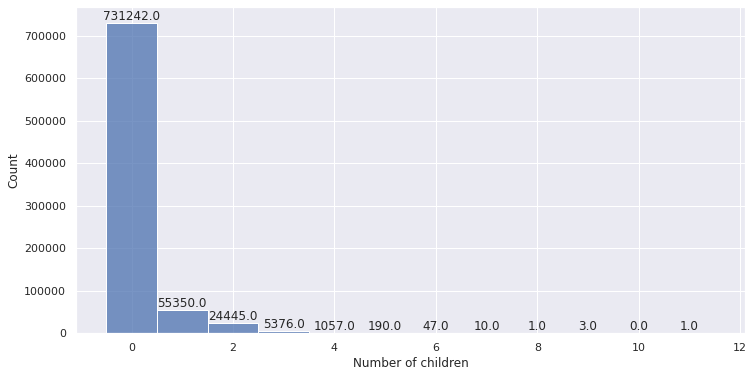

In [43]:
num_moreThan4Children = df_azdias[df_azdias['ANZ_KINDER']>4].shape[0]
num_withChildren = df_azdias[df_azdias['ANZ_KINDER']>0].shape[0]
df_children5plus = df_azdias[(df_azdias['ANZ_KINDER']>4) & (df_azdias['ALTER_KIND4']<10)].filter(regex='(ANZ_KINDER)|(ALTER_KIND.?)')

print(f'number of records with more than 4 children: {num_moreThan4Children} of {df_azdias.shape[0]:,.0f} ({(num_moreThan4Children / df_azdias.shape[0] *100):6.5f} %)')
print(f'number of records with at least one child: {num_withChildren} of {df_azdias.shape[0]:,.0f} ({(num_withChildren / df_azdias.shape[0] *100):6.5f} %)')
print(f'number of records with ANZ_KINDER >= 5 and ALTER_KIND4 < 10: {df_children5plus.shape[0]}\n')
print('-'*80)

plt.figure(figsize=(12,6))
ax = sns.histplot(data=df_azdias['ANZ_KINDER'], discrete=True)
#ax.set_yscale('log')
ax.set_xlabel('Number of children')

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')
plt.show()

**Result** The query above shows that there just 9 records with more or equal than 5 children and an age of child4 (`ALTER_KIND4`) < 10. In addition the `ALTER_KIND` column values are ordered so we can assume that the age of child5 and higher is >= 10

In [44]:
num_moreThan4Children = df_customers[df_customers['ANZ_KINDER']>4].shape[0]
num_withChildren = df_customers[df_customers['ANZ_KINDER']>0].shape[0]
df_children5plus = df_customers[(df_customers['ANZ_KINDER']>4) & (df_customers['ALTER_KIND4']<10)].filter(regex='(ANZ_KINDER)|(ALTER_KIND.?)')

print(f'number of records with more than 4 children: {num_moreThan4Children} of {df_customers.shape[0]:,.0f} ({(num_moreThan4Children / df_customers.shape[0] *100):6.5f} %)')
print(f'number of records with at least one child: {num_withChildren} of {df_customers.shape[0]:,.0f} ({(num_withChildren / df_customers.shape[0] *100):6.5f} %)')
print(f'number of records with ANZ_KINDER >= 5 and ALTER_KIND4 < 10: {df_children5plus.shape[0]}\n')
print('-'*80)



number of records with more than 4 children: 54 of 191,652 (0.02818 %)
number of records with at least one child: 12772 of 191,652 (6.66416 %)
number of records with ANZ_KINDER >= 5 and ALTER_KIND4 < 10: 2

--------------------------------------------------------------------------------


## Class Cleaner


The code for the ETL Pipeline is outsourced to python module ==> see python module etl.processor

In [45]:
import python.etl.processor as etlp
import python.etl.plot as plot

## Data Cleaning


The `DataCleaner` class will handle the following:

* replace `unknown` values (represented by -1, 0, 9 see [Metadata Descriptions](#Loading-and-Explore-Metadata))
* handle the errors raised during the load
* handle categorical variables
* drop not needed columns

see sections below for details

In [46]:
TESTING = False
if TESTING:
    df_azdias_cleaned = df_azdias.iloc[:100,:].copy()
else:
    df_azdias_cleaned = df_azdias.copy()


In [47]:
df_azdias_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 365 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(267), int64(92), object(6)
memory usage: 2.5+ GB


### Handle Unknown / Missing Data

The dataset contains a lot of unkown values. Many times these values are encoded by -1, 0 or 9 (see Metadata files). I replace all unkown values by np.NaN to use standard pandas function for imputinig and dropping.



In [48]:
df_azdias_cleaned['D19_LETZTER_KAUF_BRANCHE'].value_counts()

D19_UNBEKANNT             195338
D19_VERSICHERUNGEN         57734
D19_SONSTIGE               44722
D19_VOLLSORTIMENT          34812
D19_SCHUHE                 32578
D19_BUCH_CD                28754
D19_VERSAND_REST           26034
D19_DROGERIEARTIKEL        24072
D19_BANKEN_DIREKT          23273
D19_BEKLEIDUNG_REST        21796
D19_HAUS_DEKO              20858
D19_TELKO_MOBILE           14447
D19_ENERGIE                12084
D19_TELKO_REST             11472
D19_BANKEN_GROSS           10550
D19_BEKLEIDUNG_GEH         10272
D19_KINDERARTIKEL           7301
D19_FREIZEIT                7257
D19_TECHNIK                 7002
D19_LEBENSMITTEL            6458
D19_BANKEN_REST             5247
D19_RATGEBER                4931
D19_NAHRUNGSERGAENZUNG      4061
D19_DIGIT_SERV              3577
D19_REISEN                  3122
D19_TIERARTIKEL             2578
D19_SAMMELARTIKEL           2443
D19_HANDWERK                2227
D19_WEIN_FEINKOST           2164
D19_GARTEN                  1646
D19_BANKEN

In [49]:
195331/df_azdias_cleaned['D19_LETZTER_KAUF_BRANCHE'].value_counts().sum()

0.30804058614620855

In [50]:
dataCleaner = etlp.PreDataCleaner(df_metadata)


In [51]:
df_azdias_cleaned = dataCleaner._PreDataCleaner__mark_nans(df_azdias_cleaned)

replace unkown values by NaNs: 
 233 of 233columns
replace 0 by NaNs for : ['LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'GEBURTSJAHR']


In [52]:
df_azdias_cleaned.shape

(891221, 365)

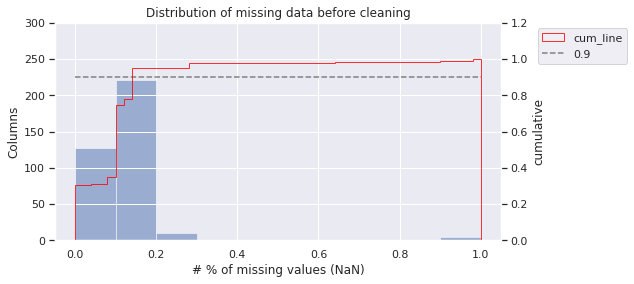

In [53]:
plot.Plot.print_null_dist(df_azdias, title='Distribution of missing data before cleaning')

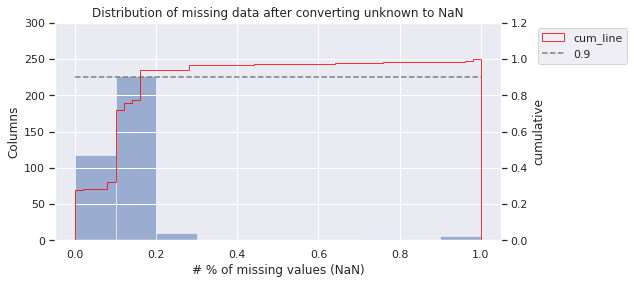

In [54]:
plot.Plot.print_null_dist(df_azdias_cleaned, title='Distribution of missing data after converting unknown to NaN')

Most columns have less than 30% missing values. Some columns have more than 50% missing data. Let's find them

In [55]:
num_of_records = df_azdias_cleaned.shape[0]
s_missing_data = df_azdias_cleaned.isnull().sum(axis=0)
s_missing_data_pct = df_azdias_cleaned.isnull().sum(axis=0) / num_of_records 

df_missing_data = pd.DataFrame({'abs':s_missing_data,'pct':s_missing_data_pct})
df_missing_data.sort_values(by='pct', ascending=False)[:20]


abs       pct
ALTER_KIND4                  890016  0.998648
TITEL_KZ                     889061  0.997576
ALTER_KIND3                  885051  0.993077
ALTER_KIND2                  861722  0.966900
ALTER_KIND1                  810163  0.909048
AGER_TYP                     677503  0.760196
EXTSEL992                    654153  0.733996
KK_KUNDENTYP                 584612  0.655967
KBA05_BAUMAX                 476524  0.534687
GEBURTSJAHR                  392318  0.440203
ALTER_HH                     310267  0.348137
ALTERSKATEGORIE_FEIN         262947  0.295041
D19_VERSI_ONLINE_QUOTE_12    257113  0.288495
D19_BANKEN_ONLINE_QUOTE_12   257113  0.288495
D19_SOZIALES                 257113  0.288495
D19_LOTTO                    257113  0.288495
D19_LETZTER_KAUF_BRANCHE     257113  0.288495
D19_KONSUMTYP                257113  0.288495
D19_GESAMT_ONLINE_QUOTE_12   257113  0.288495
D19_VERSAND_ONLINE_QUOTE_12  257113  0.288495

**Results**: 
* There 16 variables with more than 25% missing values -> These are candidates to drop
* There are some variables that have all the same number of missing data (257113 - D19_...).
* the variables `ALTER_KIND1` - `ALTER_KIND4` have a huge number of missing values. This is because they are dependent on `ANZ_KINDER` (number of children) so that for all records with `ANZ_KINDER`=0 the values for `ALTER_KIND1`- `ALTER_KIND4` are missing. We will handle this in feature engineering part and build a new varaible for these


**Note**: The drop operation will be the last part as columns maybe needed during the feature engineering process


WE can also remove ALTER_HH, KBA05_BAUMAX, AGER_TYP, TITEL_KZ as these have a lot of -1, 0 ,9 values which mean unkown

In [56]:
drop_level = 0.3
columns_to_drop = s_missing_data_pct.sort_values(ascending=False)
columns_to_drop = columns_to_drop[columns_to_drop>drop_level].index
columns_to_drop

Index(['ALTER_KIND4', 'TITEL_KZ', 'ALTER_KIND3', 'ALTER_KIND2', 'ALTER_KIND1',
       'AGER_TYP', 'EXTSEL992', 'KK_KUNDENTYP', 'KBA05_BAUMAX', 'GEBURTSJAHR',
       'ALTER_HH'],
      dtype='object')

### Inverstigate  columns that throw an error
Info: just a copy from above [Data error during load](#Data-errors-during-load)

In [57]:
df_azdias_cleaned['CAMEO_DEUG_2015'].unique()

array([nan, 8.0, 4.0, 2.0, 6.0, 1.0, 9.0, 5.0, 7.0, 3.0, '4', '3', '7',
       '2', '8', '9', '6', '5', '1', 'X'], dtype=object)

Obviously the 'X' is causing the issue. I will replace this by np.NaN

In [58]:
df_azdias_cleaned['CAMEO_INTL_2015'].unique()

array([nan, 51.0, 24.0, 12.0, 43.0, 54.0, 22.0, 14.0, 13.0, 15.0, 33.0,
       41.0, 34.0, 55.0, 25.0, 23.0, 31.0, 52.0, 35.0, 45.0, 44.0, 32.0,
       '22', '24', '41', '12', '54', '51', '44', '35', '23', '25', '14',
       '34', '52', '55', '31', '32', '15', '13', '43', '33', '45', 'XX'],
      dtype=object)

Obviously the 'XX' is causing the issue. I will replace this by np.NaN

### Handle Categorical Values

The datasets have a huge number of categorical variables. Most of the categorical variables are already encoded by int and floats, e.g. `AGER_TYP` is encoded by

|value  | meaning |
|-----  |---------|
|-1     |	unknown |
|0	    | no classification possible |
|1	    | passive elderly |
|2	    | cultural elderly |
|3	    | experience-driven elderly |

We keep this encoding as in many cases the categorical values are Ordinal and just some nominal, e.g.

variable `D19_TELKO_ANZ_12` the values are ordered from `very low activity` to `very high activity`

|value  | meaning |
|-----  |---------|
|0      | no transactions known            |
|1      | very low activity                |
|2      | low activity                     |
|3      | slightly increased activity      |
|4      | increased activity               |
|5      | high activity                    |
|6      | very high activity               |


However, some columns are of type = object. These are now investigated.

In [59]:
df_azdias_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891221 entries, 910215 to 825787
Columns: 365 entries, AGER_TYP to ALTERSKATEGORIE_GROB
dtypes: float64(298), int64(61), object(6)
memory usage: 2.5+ GB


In [60]:
df_azdias_cleaned.select_dtypes(include='object').head()

CAMEO_DEU_2015 CAMEO_DEUG_2015 CAMEO_INTL_2015  \
LNR                                                     
910215            NaN             NaN             NaN   
910220             8A             8.0            51.0   
910225             4C             4.0            24.0   
910226             2A             2.0            12.0   
910241             6B             6.0            43.0   

       D19_LETZTER_KAUF_BRANCHE        EINGEFUEGT_AM OST_WEST_KZ  
LNR                                                               
910215                      NaN                  NaN         NaN  
910220                      NaN  1992-02-10 00:00:00           W  
910225            D19_UNBEKANNT  1992-02-12 00:00:00           W  
910226            D19_UNBEKANNT  1997-04-21 00:00:00           W  
910241               D19_SCHUHE  1992-02-12 00:00:00           W

#### Results Categorical:

|variable   | type      | action    |
|--         |--         | ---   	|
|CAMEO_DEU_2015| nominal | drop - this column seems to be based on not real measurable feature |
|D19_LETZTER_KAUF_BRANCHE | nominal | replace by one hot encoding |
| EINGEFUEGT_AM | date | drop - this is just the date when the record has been added |
| OST_WEST_KZ | nominal | replace by binary 0 and 1 |

`CAMEO_DEUG_2015` encoded categorical variable - contains invalid strings 'X'
`CAMEO_INTL_2015` encoded categorical variable - contains invalid strings 'XX'
`CAMEO_DEU_2015` will be dropped



### Correlations

<AxesSubplot:>

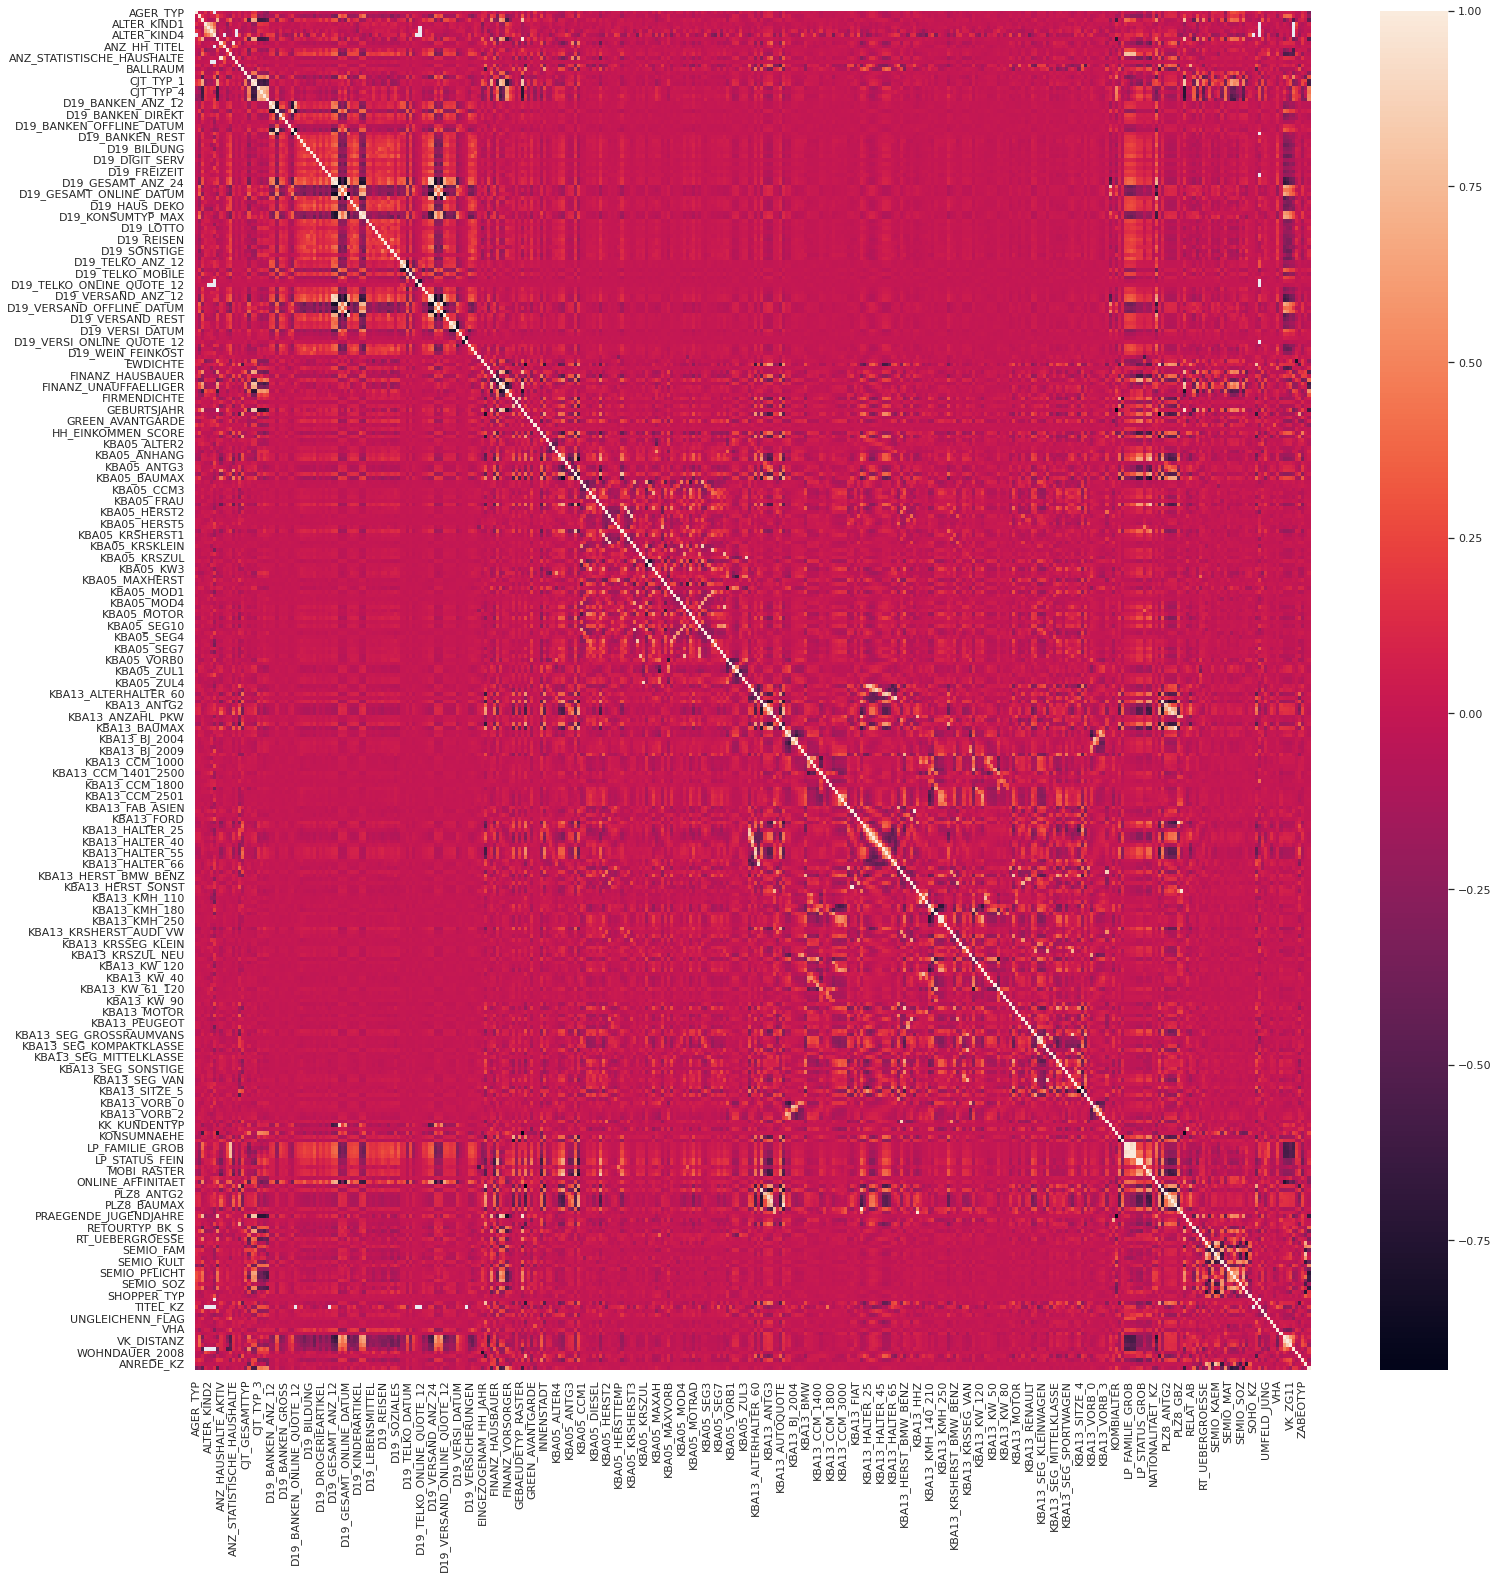

In [61]:
df_corr = df_azdias_cleaned.sample(30000).corr()
plt.figure(figsize=(25,25))
sns.heatmap(df_corr)

The heatmap shows a high correlation of KBA05* features, high correlation between some LP* features, between some D19* features,  between LP and some D19* features 

In [62]:
n = df_corr.shape[0]
df_ones = pd.DataFrame(np.ones([n,n]))
df_corr


AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  \
AGER_TYP              1.000000    0.033670 -0.005365     0.133272   
AKT_DAT_KL            0.033670    1.000000  0.155017     0.029692   
ALTER_HH             -0.005365    0.155017  1.000000     0.040741   
ALTER_KIND1           0.133272    0.029692  0.040741     1.000000   
ALTER_KIND2          -0.056260   -0.005591 -0.077823     0.765586   
...                        ...         ...       ...          ...   
WOHNDAUER_2008       -0.027259   -0.052665 -0.142044     0.268752   
WOHNLAGE             -0.045401   -0.030489  0.058176    -0.036620   
ZABEOTYP              0.103973    0.165464  0.096866    -0.091320   
ANREDE_KZ             0.030082    0.042533  0.009038    -0.023338   
ALTERSKATEGORIE_GROB -0.310305   -0.196230 -0.465526     0.075154   

                      ALTER_KIND2  ALTER_KIND3  ALTER_KIND4  \
AGER_TYP                -0.056260     0.155406          NaN   
AKT_DAT_KL              -0.005591     0.074048     0.082117   
ALTER_HH                -0.077823    -0.073980    -0.029189   
ALTER_KIND1              0.765586     0.617399     0.358980   
ALTER_KIND2              1.000000     0.766909     0.479169   
...                           ...          ...          ...   
WOHNDAUER_2008           0.180912     0.078265     0.044226   
WOHNLAGE                -0.086129    -0.122389    -0.201358   
ZABEOTYP                -0.054117    -0.078805     0.000574   
ANREDE_KZ               -0.016216    -0.009526    -0.034630   
ALTERSKATEGORIE_GROB     0.001349    -0.027714     0.129898   

                      ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
AGER_TYP                          0.059594             0.037188      0.000639   
AKT_DAT_KL                        0.311723             0.114234      0.026928   
ALTER_HH                          0.715722            -0.062327     -0.050033   
ALTER_KIND1                      -0.118339            -0.019499     -0.020650   
ALTER_KIND2                      -0.074128            -0.005630      0.013852   
...                                    ...                  ...           ...   
WOHNDAUER_2008                   -0.256697            -0.053303     -0.012402   
WOHNLAGE                          0.023035            -0.078821     -0.035912   
ZABEOTYP                          0.183885             0.163277      0.025235   
ANREDE_KZ                         0.025191             0.000540      0.009353   
ALTERSKATEGORIE_GROB             -0.504184            -0.020741      0.014881   

                      ANZ_KINDER  ANZ_PERSONEN  ANZ_STATISTISCHE_HAUSHALTE  \
AGER_TYP               -0.028867     -0.042106                    0.030380   
AKT_DAT_KL             -0.077114     -0.142075                    0.116985   
ALTER_HH                0.203818      0.399104                   -0.076487   
ALTER_KIND1            -0.264005      0.096522                   -0.019831   
ALTER_KIND2            -0.166735     -0.011903                   -0.002718   
...                          ...           ...                         ...   
WOHNDAUER_2008         -0.001273      0.194576                   -0.046308   
WOHNLAGE                0.039722      0.051437                   -0.079049   
ZABEOTYP                0.024912     -0.229491                    0.158603   
ANREDE_KZ               0.027834     -0.017229                    0.007801   
ALTERSKATEGORIE_GROB   -0.103963     -0.028244                   -0.008623   

                      ANZ_TITEL    ARBEIT  BALLRAUM  CJT_GESAMTTYP  \
AGER_TYP               0.001619  0.063930 -0.047350       0.032722   
AKT_DAT_KL            -0.007303  0.077525 -0.054642       0.068779   
ALTER_HH              -0.015171 -0.087394  0.039233       0.350081   
ALTER_KIND1           -0.003848  0.049191 -0.032768      -0.086116   
ALTER_KIND2            0.005716  0.034775 -0.104529      -0.075847   
...                         ...       ...       ...            ...   
WOHNDAUER_2008         0.022867 -0.0

### find feature with greatest correlation

I will no search for feature with very high correlation (>0.925). This feature will be removed.

In [63]:
n = df_corr.shape[0]
df_ones = np.zeros((n,n))
np.fill_diagonal(df_ones, 1)
df_ones = pd.DataFrame(df_ones, index=df_corr.index, columns=df_corr.columns)

In [64]:
df_high_corr_cols = df_corr.columns[(abs(df_corr - df_ones) > 0.9).any()]
print(len(df_high_corr_cols))
df_corr.loc[df_high_corr_cols[:10],df_high_corr_cols]

41


ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  \
ALTERSKATEGORIE_FEIN                    1.000000             0.001916   
ANZ_HAUSHALTE_AKTIV                     0.001916             1.000000   
ANZ_STATISTISCHE_HAUSHALTE             -0.009248             0.980703   
D19_GESAMT_ANZ_12                       0.181047            -0.098675   
D19_GESAMT_ANZ_24                       0.208175            -0.107428   
D19_GESAMT_ONLINE_DATUM                -0.215821             0.104861   
D19_GESAMT_ONLINE_QUOTE_12              0.202281            -0.069566   
D19_VERSAND_ANZ_12                      0.158381            -0.093766   
D19_VERSAND_ANZ_24                      0.185916            -0.101411   
D19_VERSAND_DATUM                      -0.184240             0.109973   

                            ANZ_STATISTISCHE_HAUSHALTE  D19_GESAMT_ANZ_12  \
ALTERSKATEGORIE_FEIN                         -0.009248           0.181047   
ANZ_HAUSHALTE_AKTIV                           0.980703          -0.098675   
ANZ_STATISTISCHE_HAUSHALTE                    1.000000          -0.102669   
D19_GESAMT_ANZ_12                            -0.102669           1.000000   
D19_GESAMT_ANZ_24                            -0.112301           0.906712   
D19_GESAMT_ONLINE_DATUM                       0.110168          -0.805255   
D19_GESAMT_ONLINE_QUOTE_12                   -0.073196           0.717513   
D19_VERSAND_ANZ_12                           -0.097210           0.905220   
D19_VERSAND_ANZ_24                           -0.105744           0.857758   
D19_VERSAND_DATUM                             0.113937          -0.792799   

                            D19_GESAMT_ANZ_24  D19_GESAMT_ONLINE_DATUM  \
ALTERSKATEGORIE_FEIN                 0.208175                -0.215821   
ANZ_HAUSHALTE_AKTIV                 -0.107428                 0.104861   
ANZ_STATISTISCHE_HAUSHALTE          -0.112301                 0.110168   
D19_GESAMT_ANZ_12                    0.906712                -0.805255   
D19_GESAMT_ANZ_24                    1.000000                -0.844008   
D19_GESAMT_ONLINE_DATUM             -0.844008                 1.000000   
D19_GESAMT_ONLINE_QUOTE_12           0.702315                -0.872182   
D19_VERSAND_ANZ_12                   0.829815                -0.775199   
D19_VERSAND_ANZ_24                   0.920649                -0.818020   
D19_VERSAND_DATUM                   -0.830251                 0.917511   

                            D19_GESAMT_ONLINE_QUOTE_12  D19_VERSAND_ANZ_12  \
ALTERSKATEGORIE_FEIN                          0.202281            0.158381   
ANZ_HAUSHALTE_AKTIV                          -0.069566           -0.093766   
ANZ_STATISTISCHE_HAUSHALTE                   -0.073196           -0.097210   
D19_GESAMT_ANZ_12                             0.717513            0.905220   
D19_GESAMT_ANZ_24                             0.702315            0.829815   
D19_GESAMT_ONLINE_DATUM                      -0.872182           -0.775199   
D19_GESAMT_ONLINE_QUOTE_12                    1.000000            0.688751   
D19_VERSAND_ANZ_12                            0.688751            1.000000   
D19_VERSAND_ANZ_24                            0.683718            0.907880   
D19_VERSAND_DATUM                            -0.769252           -0.820511   

                            D19_VERSAND_ANZ_24  D19_VERSAND_DATUM  \
ALTERSKATEGORIE_FEIN                  0.185916          -0.184240   
ANZ_HAUSHALTE_AKTIV                  -0.101411           0.109973   
ANZ_STATISTISCHE_HAUSHALTE           -0.105744           0.113937   
D19_GESAMT_ANZ_12                     0.857758          -0.792799   
D19_GESAMT_ANZ_24                     0.920649          -0.830251   
D19_GESAMT_ONLINE_DATUM              -0.818020           0.917511   
D19_GESAMT_ONLINE_QUOTE_12            0.683718          -0.769252   
D19_VERSAND_ANZ_12                    0.907880          -0.820511   
D19_VERSAND_ANZ_24                    1.000000          -0.860351   
D19_VERSAND_

In [65]:
high_corr_dict = {}
candidate_to_drop = set()
corr_threshold = 0.9
for col in df_corr.loc[df_high_corr_cols[:30],df_high_corr_cols]:
    col_correaltions = df_corr[col].sort_values(ascending=False)
    tmp_list = []
    
    for corr_col in col_correaltions.index:
        if corr_col != col:
            if (col_correaltions[corr_col] >= corr_threshold) and not corr_col in high_corr_dict:
                candidate_to_drop.add(corr_col)
                tmp_list.append({corr_col : col_correaltions[corr_col]})
            else:
                break
    
    if tmp_list:
        high_corr_dict[col] = tmp_list
                
candidate_to_drop
    

{'ANZ_STATISTISCHE_HAUSHALTE',
 'D19_GESAMT_ANZ_24',
 'D19_VERSAND_ANZ_12',
 'D19_VERSAND_ANZ_24',
 'D19_VERSAND_DATUM',
 'D19_VERSAND_ONLINE_DATUM',
 'D19_VERSAND_ONLINE_QUOTE_12',
 'GEBURTSJAHR',
 'KBA13_HALTER_66',
 'KBA13_HERST_SONST',
 'KBA13_KMH_250',
 'LP_FAMILIE_GROB',
 'LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'LP_STATUS_GROB',
 'PLZ8_ANTG1',
 'PLZ8_ANTG3',
 'PLZ8_ANTG4',
 'PLZ8_BAUMAX',
 'PLZ8_GBZ',
 'PLZ8_HHZ'}

In [66]:
high_corr_dict

{'ALTERSKATEGORIE_FEIN': [{'GEBURTSJAHR': 0.9969186937954216}],
 'ANZ_HAUSHALTE_AKTIV': [{'ANZ_STATISTISCHE_HAUSHALTE': 0.980703405345142}],
 'D19_GESAMT_ANZ_12': [{'D19_GESAMT_ANZ_24': 0.9067120288337377},
  {'D19_VERSAND_ANZ_12': 0.905220056978279}],
 'D19_GESAMT_ANZ_24': [{'D19_VERSAND_ANZ_24': 0.9206487576073333}],
 'D19_GESAMT_ONLINE_DATUM': [{'D19_VERSAND_ONLINE_DATUM': 0.9455888740307264},
  {'D19_VERSAND_DATUM': 0.9175109099943246}],
 'D19_GESAMT_ONLINE_QUOTE_12': [{'D19_VERSAND_ONLINE_QUOTE_12': 0.9168370273933519}],
 'D19_VERSAND_ANZ_12': [{'D19_VERSAND_ANZ_24': 0.9078795028317982}],
 'D19_VERSAND_DATUM': [{'D19_VERSAND_ONLINE_DATUM': 0.9595252473847163}],
 'KBA13_ALTERHALTER_61': [{'KBA13_HALTER_66': 0.9288287540734881}],
 'KBA13_ANTG1': [{'PLZ8_ANTG1': 0.9185663476906529}],
 'KBA13_ANTG3': [{'PLZ8_ANTG3': 0.9120314844419528}],
 'KBA13_ANTG4': [{'PLZ8_ANTG4': 0.9031429953448442}],
 'KBA13_BAUMAX': [{'PLZ8_BAUMAX': 0.9509360100255203}],
 'KBA13_FAB_SONSTIGE': [{'KBA13_HERST_S

<AxesSubplot:>

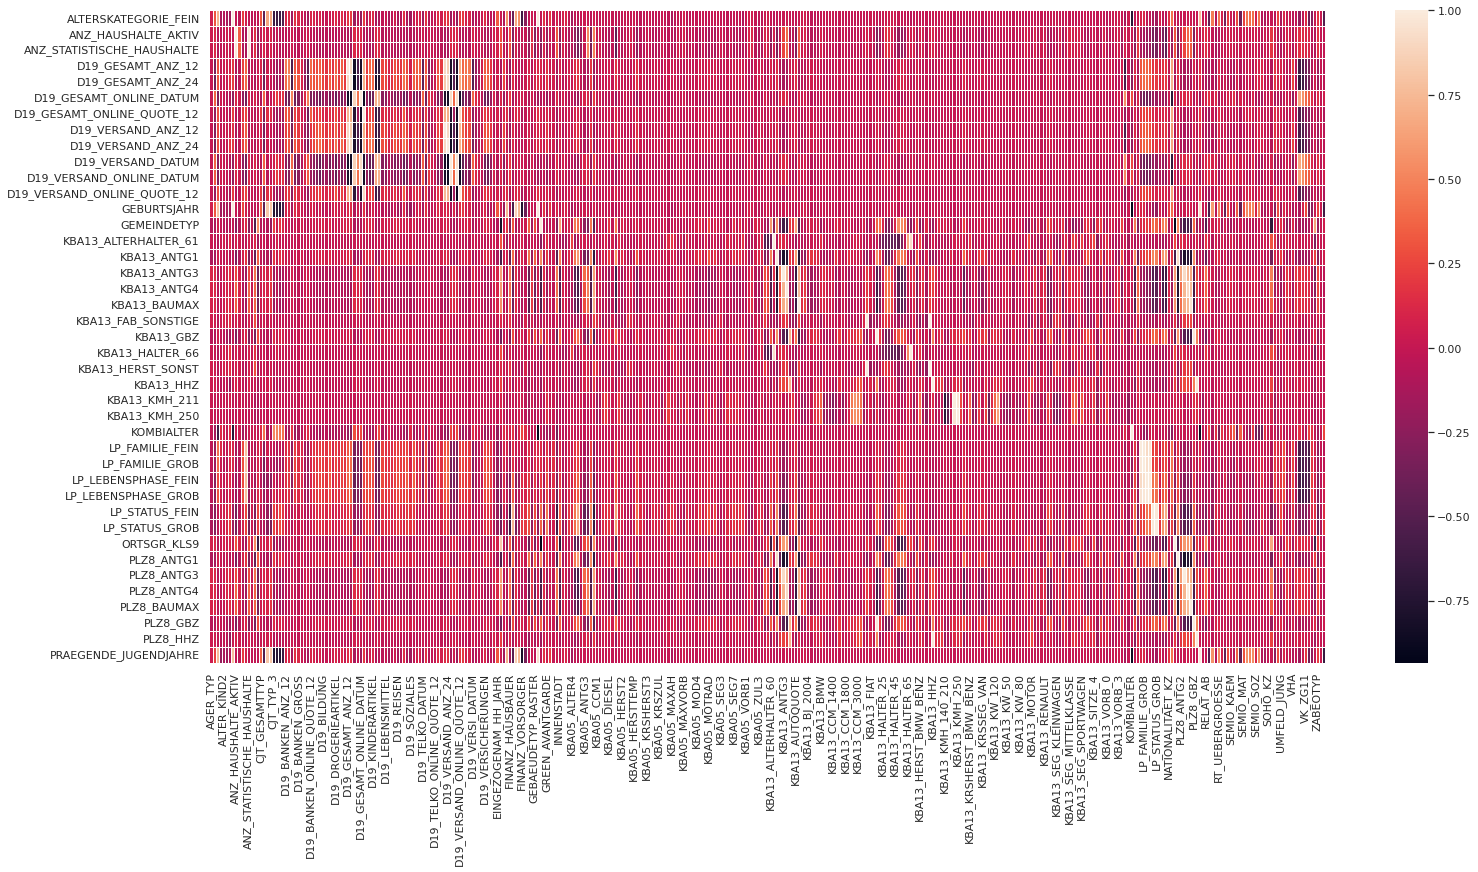

In [67]:
plt.figure(figsize=(25,12))
sns.heatmap(df_corr.loc[df_high_corr_cols,:], linewidths=0.8)


#### Analyse Variabls Lebensphase 

The following attributes seems to be very similar

* LP_LEBENSPHASE_GROB lifestage rough
* LP_LEBENSPHASE_FEIN lifestage fine
* LP_STATUS_FEIN
* LP_STATUS_GROB
* LP_FAMILIE_GROB
* LP_FAMILIE_FEIN

Therefore we make a short correlation check

In [68]:
cols = ['LP_LEBENSPHASE_FEIN','LP_LEBENSPHASE_GROB','LP_STATUS_GROB', 'LP_STATUS_FEIN',  'LP_FAMILIE_GROB', 'LP_FAMILIE_FEIN', 'CAMEO_INTL_2015','CAMEO_DEUG_2015','W_KEIT_KIND_HH', 'CJT_TYP_1','CJT_TYP_2']
df_azdias_cleaned[cols].corr()

LP_LEBENSPHASE_FEIN  LP_LEBENSPHASE_GROB  LP_STATUS_GROB  \
LP_LEBENSPHASE_FEIN             1.000000             0.988180        0.463909   
LP_LEBENSPHASE_GROB             0.988180             1.000000        0.408800   
LP_STATUS_GROB                  0.463909             0.408800        1.000000   
LP_STATUS_FEIN                  0.443415             0.417052        0.982411   
LP_FAMILIE_GROB                 0.941647             0.971096        0.245960   
LP_FAMILIE_FEIN                 0.911927             0.959766        0.237430   
W_KEIT_KIND_HH                 -0.521635            -0.526354       -0.156383   
CJT_TYP_1                      -0.190931            -0.071423       -0.259928   
CJT_TYP_2                      -0.250607            -0.128242       -0.336123   

                     LP_STATUS_FEIN  LP_FAMILIE_GROB  LP_FAMILIE_FEIN  \
LP_LEBENSPHASE_FEIN        0.443415         0.941647         0.911927   
LP_LEBENSPHASE_GROB        0.417052         0.971096         0.959766   
LP_STATUS_GROB             0.982411         0.245960         0.237430   
LP_STATUS_FEIN             1.000000         0.234589         0.250205   
LP_FAMILIE_GROB            0.234589         1.000000         0.988211   
LP_FAMILIE_FEIN            0.250205         0.988211         1.000000   
W_KEIT_KIND_HH            -0.172990        -0.569255        -0.549019   
CJT_TYP_1                 -0.195305        -0.036257         0.042804   
CJT_TYP_2                 -0.276832        -0.083982        -0.001035   

                     W_KEIT_KIND_HH  CJT_TYP_1  CJT_TYP_2  
LP_LEBENSPHASE_FEIN       -0.521635  -0.190931  -0.250607  
LP_LEBENSPHASE_GROB       -0.526354  -0.071423  -0.128242  
LP_STATUS_GROB            -0.156383  -0.259928  -0.336123  
LP_STATUS_FEIN            -0.172990  -0.195305  -0.276832  
LP_FAMILIE_GROB           -0.569255  -0.036257  -0.083982  
LP_FAMILIE_FEIN           -0.549019   0.042804  -0.001035  
W_KEIT_KIND_HH             1.000000  -0.330758  -0.272567  
CJT_TYP_1                 -0.330758   1.000000   0.897413  
CJT_TYP_2                 -0.272567   0.897413   1.000000

<AxesSubplot:>

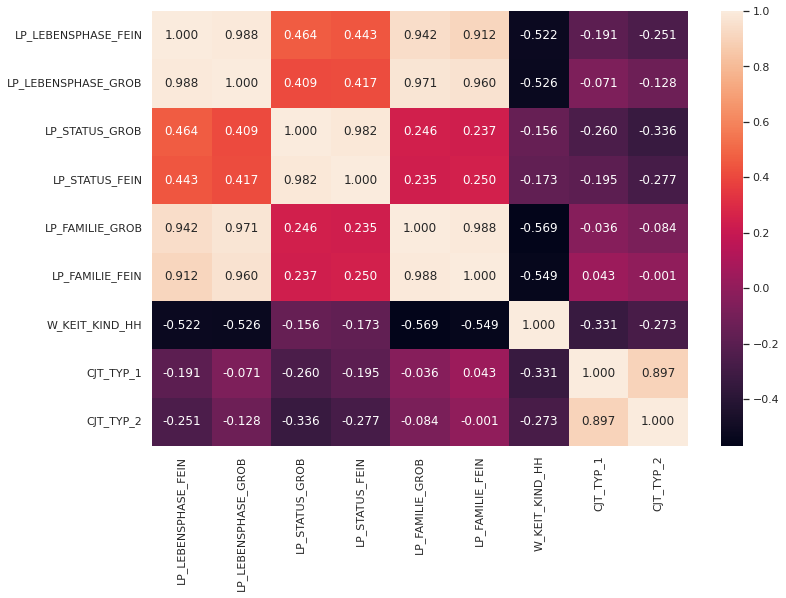

In [69]:
plt.figure(figsize=(12,8))
sns.heatmap(df_azdias_cleaned[cols].corr(), annot=True, fmt="3.3f")

**Result**

* LP_STATUS_FEIN and LP_STATUS_GROB are almost the same. As LP_STATUS_FEIN contains the more detailed level of information we keep this and drop LP_STATUS_GROB
* 

### High Anti correlated features

In [70]:
high_corr_dict = {}
candidate_to_drop = set()
corr_threshold = 0.9
for col in df_corr.loc[df_high_corr_cols[:30],df_high_corr_cols]:
    col_correaltions = df_corr[col].sort_values(ascending=True)
    tmp_list = []
    
    for corr_col in col_correaltions.index:
        if corr_col != col:
            if (abs(col_correaltions[corr_col]) >= corr_threshold) and not corr_col in high_corr_dict:
                candidate_to_drop.add(corr_col)
                tmp_list.append({corr_col : col_correaltions[corr_col]})
            else:
                break
    
    if tmp_list:
        high_corr_dict[col] = tmp_list
                
candidate_to_drop

{'KOMBIALTER', 'ORTSGR_KLS9'}

In [71]:
high_corr_dict

{'GEBURTSJAHR': [{'KOMBIALTER': -0.9322626374825693}],
 'GEMEINDETYP': [{'ORTSGR_KLS9': -0.9338925280209606}]}

### Run the cleaning process

In [72]:
df_azdias_cleaned = df_azdias.copy()
dfCleaner = etlp.PreDataCleaner(df_metadata)

df_azdias_cleaned = dfCleaner.transform(df_azdias_cleaned, drop_duplicates=True, build_kind_features=True, drop_cols=True)
df_azdias_cleaned.shape

fixing load errors {'CAMEO_DEUG_2015': 'X', 'CAMEO_INTL_2015': 'XX'}
fixed column CAMEO_DEUG_2015 - records fixed: 373
fixed column CAMEO_INTL_2015 - records fixed: 373
fixing year columns: ['MIN_GEBAEUDEJAHR', 'EINGEZOGENAM_HH_JAHR', 'GEBURTSJAHR']
replace unkown values by NaNs: 
 233 of 233columns
replace 0 by NaNs for : ['LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'GEBURTSJAHR']
creating one hot encoding columns for: 
convert to binary: 
	column: OST_WEST_KZ - Mapping: {'W': 0, 'O': 1}
dropping columns: ['EINGEFUEGT_AM', 'CAMEO_DEU_2015', 'LP_STATUS_GROB', 'LP_FAMILIE_GROB', 'D19_VERSAND_ANZ_24', 'LP_LEBENSPHASE_FEIN', 'ANZ_STATISTISCHE_HAUSHALTE', 'CAMEO_INTL_2015', 'D19_VERSAND_ONLINE_DATUM', 'KBA13_HALTER_66', 'KBA13_HERST_SONST', 'PLZ8_BAUMAX', 'PLZ8_GBZ', 'PLZ8_HHZ', 'D19_GESAMT_ANZ_24', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_DATUM', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_SEG9', 'KBA13_KMH_211', 'PLZ8_ANTG1', 'PLZ8_ANTG3', 'ALTER_KIND4', 'TITEL_KZ', 'ALTER_KIND3', 'ALTER_KIND2'

(845439, 333)

#### Check if still "0" values exist and what they mean
list all columns that still contain "0" values to check if there are wanted "0"s or maybe some overseen unknowns

In [73]:
f = lambda x: (x==0).sum()

t = df_azdias_cleaned.iloc[:10000,:].apply(f, axis=0)
set_1 = set(t[t>0].index.values)
set_2=set(df_metadata[df_metadata['Meaning'].str.contains('unknown')]['Attribute'].values)
set_1-set_2

{'ALTERSKATEGORIE_FEIN',
 'ANZ_HAUSHALTE_AKTIV',
 'ANZ_HH_TITEL',
 'ANZ_KINDER',
 'ANZ_PERSONEN',
 'ANZ_TITEL',
 'D19_BANKEN_ANZ_12',
 'D19_BANKEN_ANZ_24',
 'D19_BANKEN_DIREKT',
 'D19_BANKEN_GROSS',
 'D19_BANKEN_LOKAL',
 'D19_BANKEN_ONLINE_QUOTE_12',
 'D19_BANKEN_REST',
 'D19_BEKLEIDUNG_GEH',
 'D19_BEKLEIDUNG_REST',
 'D19_BILDUNG',
 'D19_BIO_OEKO',
 'D19_BUCH_CD',
 'D19_DIGIT_SERV',
 'D19_DROGERIEARTIKEL',
 'D19_ENERGIE',
 'D19_FREIZEIT',
 'D19_GARTEN',
 'D19_GESAMT_ANZ_12',
 'D19_GESAMT_ONLINE_QUOTE_12',
 'D19_HANDWERK',
 'D19_HAUS_DEKO',
 'D19_KINDERARTIKEL',
 'D19_KOSMETIK',
 'D19_LEBENSMITTEL',
 'D19_LOTTO',
 'D19_NAHRUNGSERGAENZUNG',
 'D19_RATGEBER',
 'D19_REISEN',
 'D19_SAMMELARTIKEL',
 'D19_SCHUHE',
 'D19_SONSTIGE',
 'D19_SOZIALES',
 'D19_TECHNIK',
 'D19_TELKO_ANZ_12',
 'D19_TELKO_ANZ_24',
 'D19_TELKO_MOBILE',
 'D19_TELKO_ONLINE_QUOTE_12',
 'D19_TELKO_REST',
 'D19_TIERARTIKEL',
 'D19_VERSAND_ONLINE_QUOTE_12',
 'D19_VERSAND_REST',
 'D19_VERSICHERUNGEN',
 'D19_VERSI_ANZ_12',
 'D19

**Result** the list seems to be fine. Either that are binary 0/1 or defined 0. All the D19 are "none transactions known" which we treat as 0 transactions.

### Check distribution of Missing values and Correclations again

<AxesSubplot:>

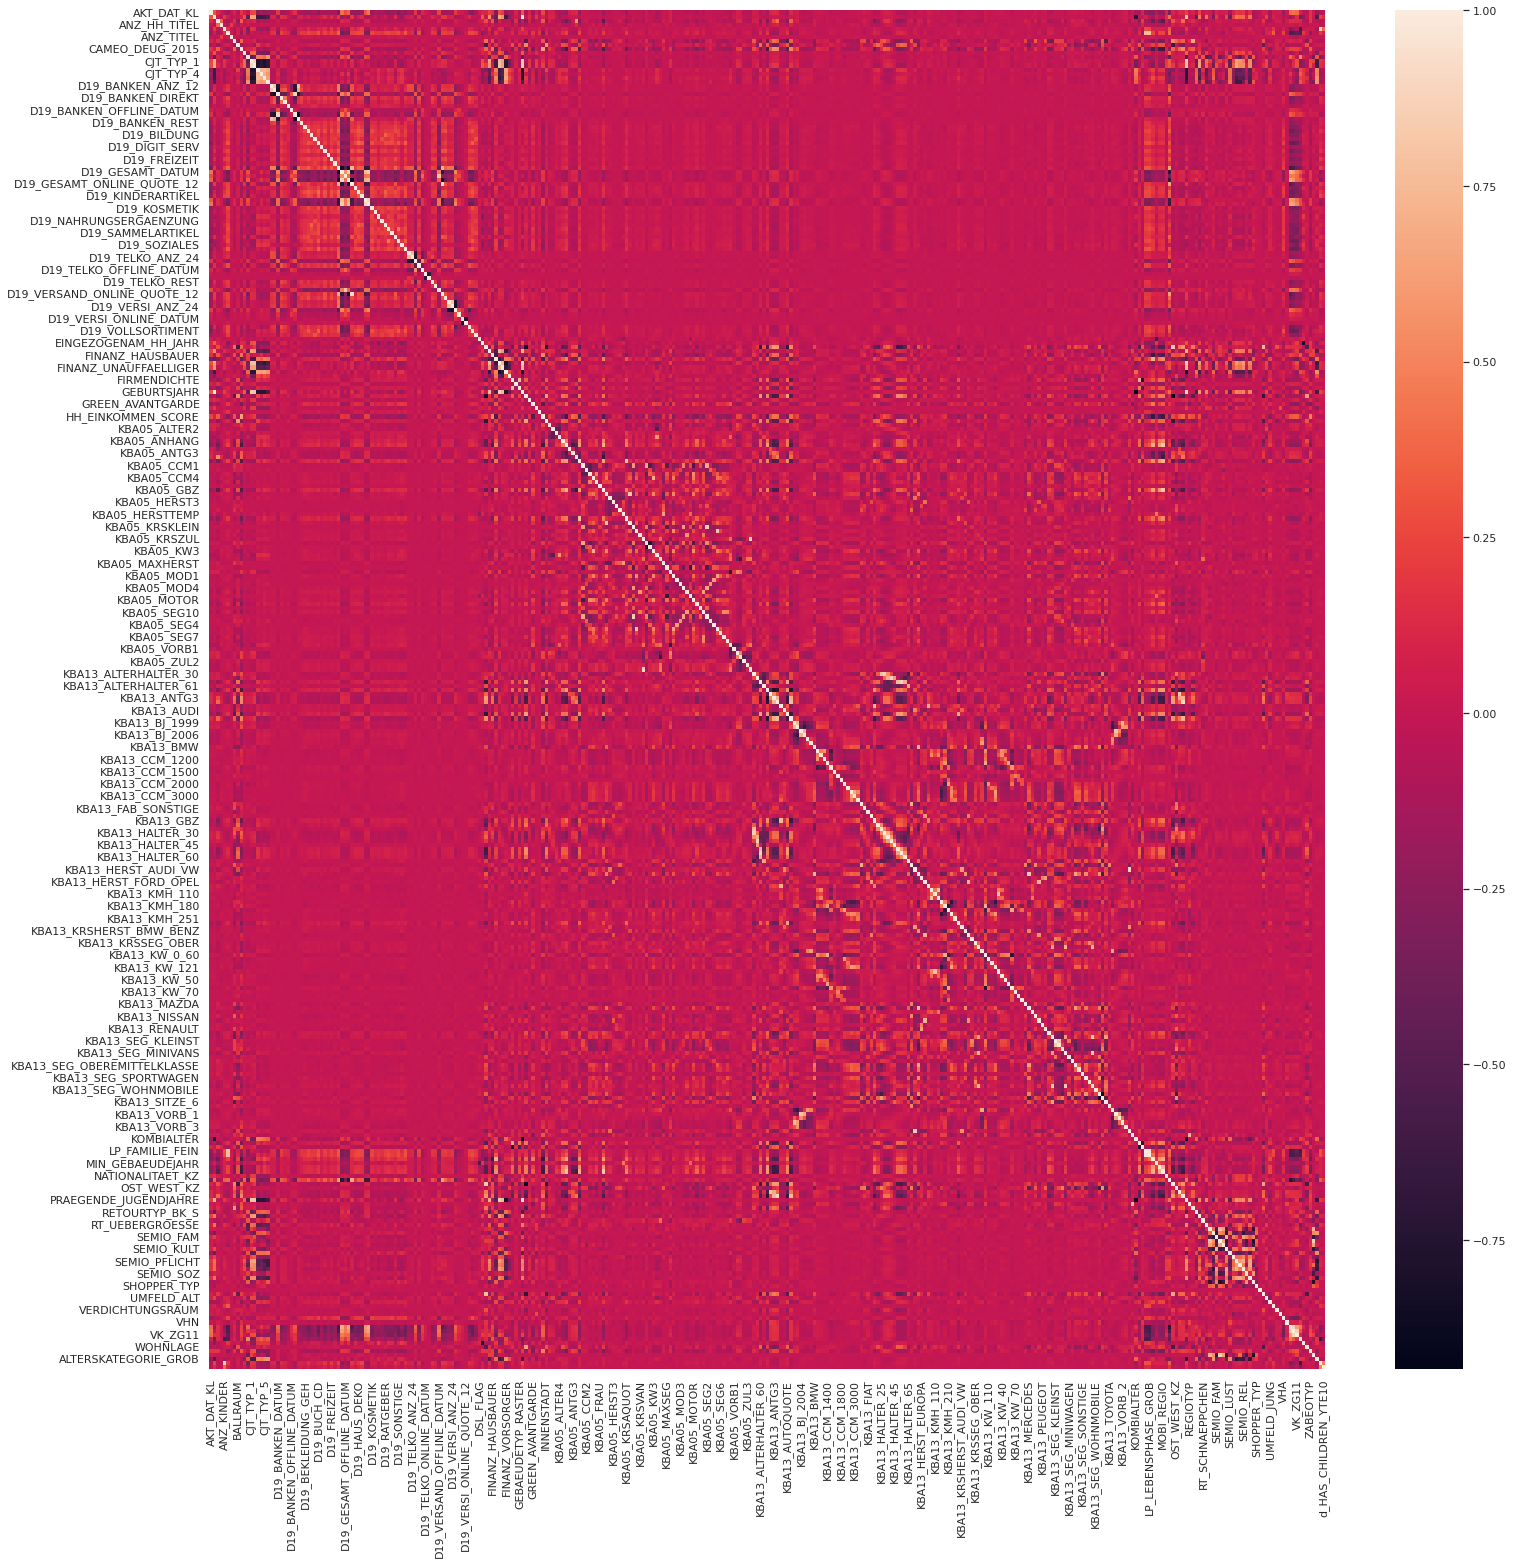

In [74]:
df_corr = df_azdias_cleaned.sample(30000).corr()
plt.figure(figsize=(25,25))
sns.heatmap(df_corr)

<AxesSubplot:>

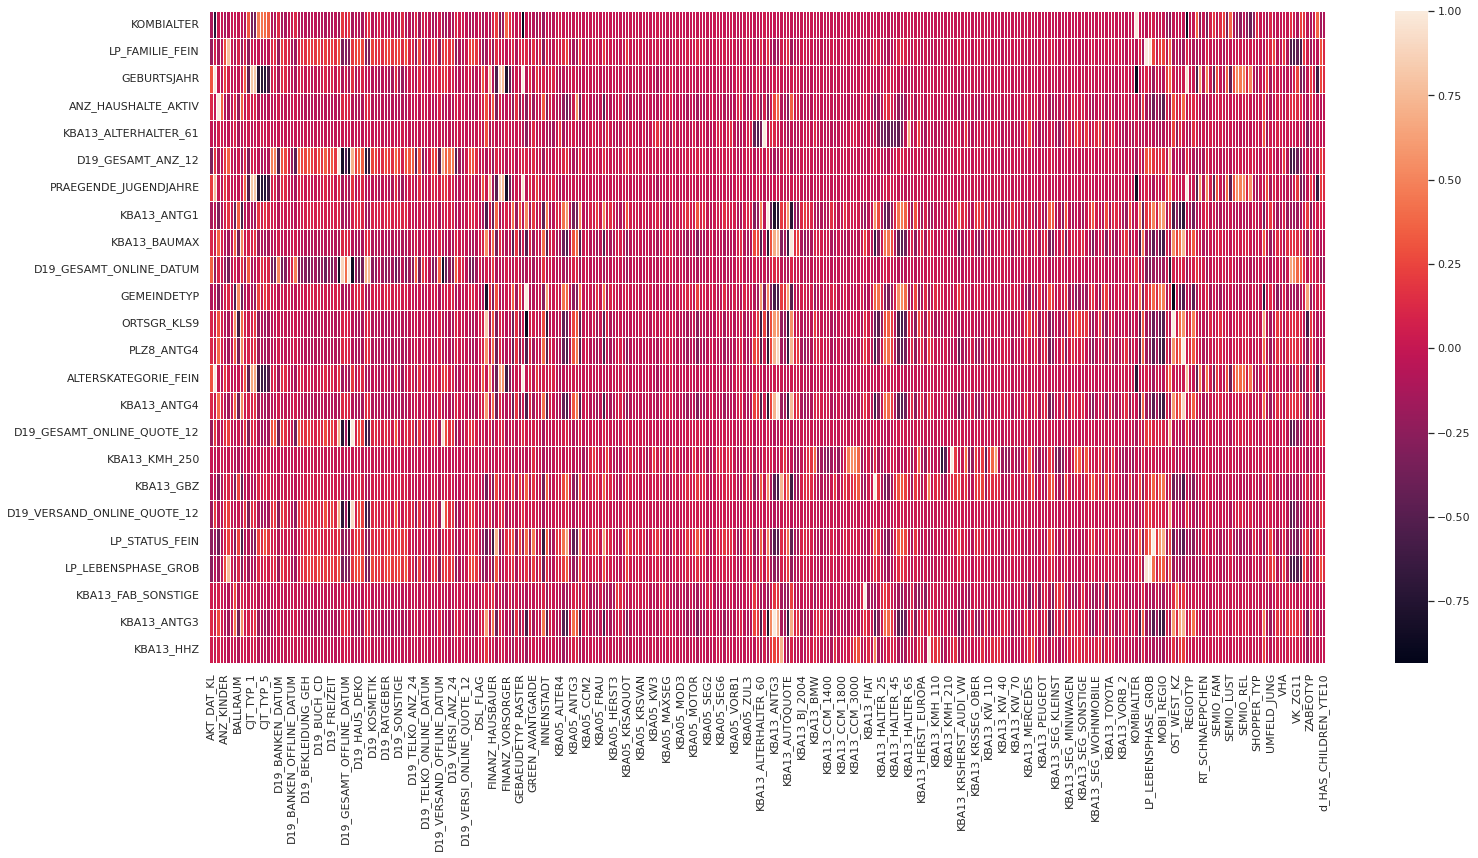

In [75]:
col_set = set(df_high_corr_cols).intersection(df_corr.columns)
plt.figure(figsize=(25,12))
sns.heatmap(df_corr.loc[col_set,:], linewidths=0.8)

<AxesSubplot:>

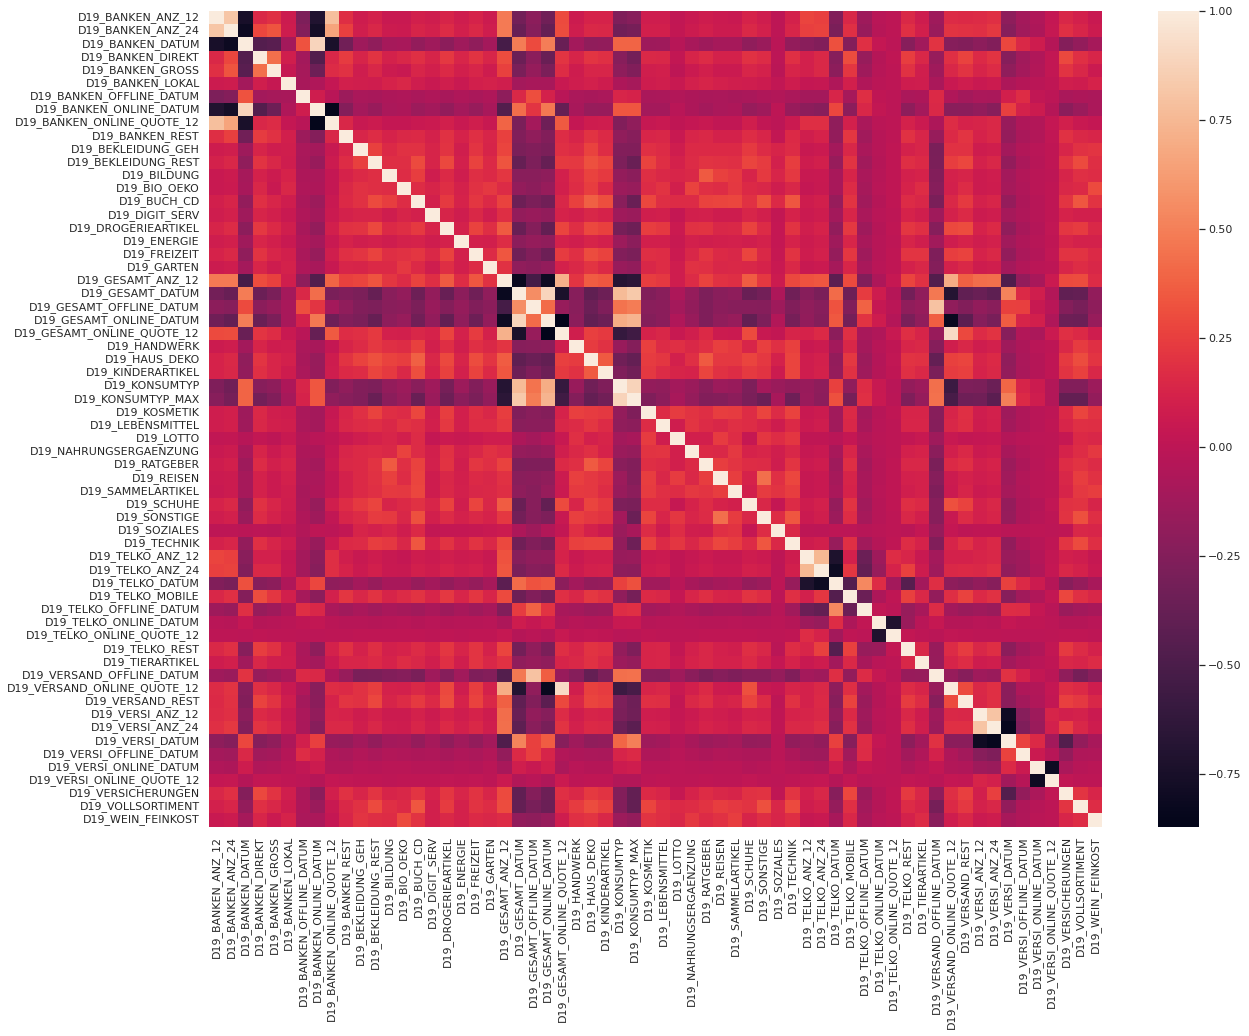

In [76]:
df_d19_corr = df_azdias_cleaned.filter(regex='D19.*',axis='columns').corr()
plt.figure(figsize=(20,15))
sns.heatmap(df_d19_corr)

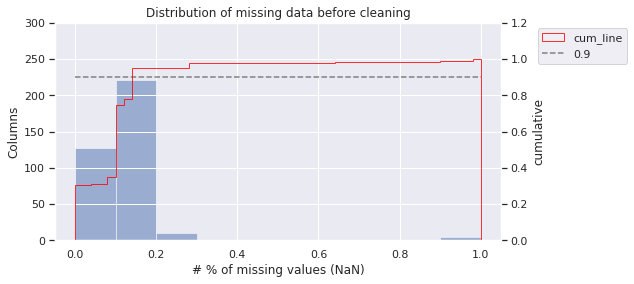

In [77]:
# Assess missing data in columns
plot.Plot.print_null_dist(df_azdias, 'dist_of_missingdata_after_transformation.jpg', title='Distribution of missing data before cleaning')


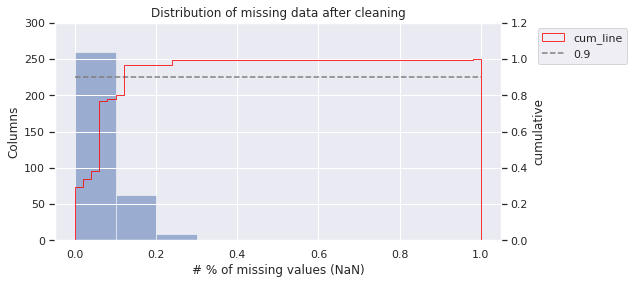

In [78]:
plot.Plot.print_null_dist(df_azdias_cleaned, 'dist_of_missingdata_after_transformation.jpg', title='Distribution of missing data after cleaning')

In [79]:
num_of_records = df_azdias_cleaned.shape[0]
s_missing_data = df_azdias_cleaned.isnull().sum(axis=0)
s_missing_data_pct = df_azdias_cleaned.isnull().sum(axis=0) / num_of_records 

df_missing_data = pd.DataFrame({'abs':s_missing_data,'pct':s_missing_data_pct})
df_missing_data.sort_values(by='pct', ascending=False)[:20]

abs       pct
GEBURTSJAHR                  346536  0.409889
ALTERSKATEGORIE_FEIN         217166  0.256868
D19_VERSAND_ONLINE_QUOTE_12  211338  0.249974
D19_BANKEN_ONLINE_QUOTE_12   211338  0.249974
D19_KONSUMTYP                211338  0.249974
D19_LOTTO                    211338  0.249974
D19_GESAMT_ONLINE_QUOTE_12   211338  0.249974
D19_SOZIALES                 211338  0.249974
D19_VERSI_ONLINE_QUOTE_12    211338  0.249974
D19_TELKO_ONLINE_QUOTE_12    211338  0.249974
REGIOTYP                     112334  0.132871
KKK                          112334  0.132871
KBA05_AUTOQUOT               102364  0.121078
KBA05_CCM1                   102359  0.121072
KBA05_ALTER1                 102359  0.121072
KBA05_ALTER4                 102359  0.121072
KBA05_CCM2                   102359  0.121072
KBA05_ALTER3                 102359  0.121072
KBA05_ALTER2                 102359  0.121072
KBA05_SEG7                   102359  0.121072

In [80]:
#df_missing_data.sort_values(by='pct')[:30]
df_azdias.isnull().sum()

AGER_TYP                     0
AKT_DAT_KL               73499
ALTER_HH                 73499
ALTER_KIND1             810163
ALTER_KIND2             861722
                         ...  
WOHNDAUER_2008           73499
WOHNLAGE                 93148
ZABEOTYP                     0
ANREDE_KZ                    0
ALTERSKATEGORIE_GROB         0
Length: 365, dtype: int64

**Results**: 

* there is a significant increase of columns with no missing data  
This is because of the transformation of categorical features to one-hot encoded columns. Therfore the number of columns increased with no missing values.
* the other changes are becuse we replaced "unknown" values by np.NaN

## Save cleaned Datasets
Note: using feather requires to reset the index

In [81]:
df_azdias_cleaned.reset_index().to_feather('df_azdias_cleaned')

## Loading DF
you can start here if you want to skip steps before

In [82]:
df_azdias_cleaned = pd.read_feather('df_azdias_cleaned')

# set the index as feather did store the index as column
df_azdias_cleaned.set_index('LNR', inplace=True)
df_azdias_cleaned.head()

AKT_DAT_KL  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
LNR                                                                           
910215         NaN                   NaN                  NaN           NaN   
910220         9.0                  21.0                 11.0           0.0   
910225         9.0                  17.0                 10.0           0.0   
910226         1.0                  13.0                  1.0           0.0   
910241         1.0                  14.0                  3.0           0.0   

        ANZ_KINDER  ANZ_PERSONEN  ANZ_TITEL  ARBEIT  BALLRAUM  \
LNR                                                             
910215         NaN           NaN        NaN     NaN       NaN   
910220         0.0           2.0        0.0     3.0       6.0   
910225         0.0           1.0        0.0     3.0       2.0   
910226         0.0           0.0        0.0     2.0       4.0   
910241         0.0           4.0        0.0     4.0       2.0   

        CAMEO_DEUG_2015  CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  \
LNR                                                                    
910215              NaN            2.0                5.0        1.0   
910220              8.0            5.0                1.0        5.0   
910225              4.0            3.0                2.0        4.0   
910226              2.0            2.0                3.0        2.0   
910241              6.0            5.0                3.0        3.0   

        CJT_TYP_2  CJT_TYP_3  CJT_TYP_4  CJT_TYP_5  CJT_TYP_6  \
LNR                                                             
910215        1.0        5.0        5.0        5.0        5.0   
910220        5.0        2.0        3.0        1.0        1.0   
910225        4.0        1.0        3.0        2.0        2.0   
910226        2.0        4.0        4.0        5.0        3.0   
910241        3.0        3.0        4.0        3.0        3.0   

        D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  D19_BANKEN_DATUM  \
LNR                                                              
910215                  0                  0                10   
910220                  0                  0                10   
910225                  0                  0                10   
910226                  0                  0                10   
910241                  3                  5                 5   

        D19_BANKEN_DIREKT  D19_BANKEN_GROSS  D19_BANKEN_LOKAL  \
LNR                                                             
910215                  0                 0                 0   
910220                  0                 0                 0   
910225                  0                 0                 0   
910226                  0                 0                 0   
910241                  1                 2                 0   

        D19_BANKEN_OFFLINE_DATUM  ...  SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  \
LNR                               ...                                      
910215                        10  ...        7.0        2.0          3.0   
910220                        10  ...        4.0        5.0          6.0   
910225                        10  ...        3.0        4.0          3.0   
910226                        10  ...        2.0        5.0          4.0   
910241                        10  ...        4.0        6.0          2.0   

        SEMIO_VERT  SHOPPER_TYP  SOHO_KZ  STRUKTURTYP  UMFELD_ALT  \
LNR                                                                 
910215         1.0          NaN      NaN          NaN         NaN   
910220         1.0          3.0      1.0          2.0         3.0   
910225         4.0          2.0      0.0          3.0         2.0   
910226         4.0          1.0      0.0          1.0         4.0   
910241         7.0          2.0      0.0          3.0         4.0   

        UMFELD_JUNG  UNGLEICHENN_FLAG  VERDICHTUNGSRAUM  VERS_TYP  VHA  VHN  \
LNR                   

# Part 1: Customer Segmentation Report
---

The main bulk of your analysis will come in this part of the project. Here, you should use unsupervised learning techniques to describe the relationship between the demographics of the company's existing customers and the general population of Germany. By the end of this part, you should be able to describe parts of the general population that are more likely to be part of the mail-order company's main customer base, and which parts of the general population are less so.

## Cluster algorithms
For clustering there is number of popular algorithms. For the algorthim selection I focused on the ones that scikit-learn provides and on the article [clustering algorithms with python](https://machinelearningmastery.com/clustering-algorithms-with-python/) or [How to Combine PCA and K-means CLustering](https://365datascience.com/tutorials/python-tutorials/pca-k-means/).

According to the references the most popular algorithms are
* Affinity Propagation
* Agglomerative Clustering
* BIRCH
* DBSCAN
* **K-Means**
* **Mini-Batch K-Means**
* Mean Shift
* OPTICS
* Spectral Clustering
* Mixture of Gaussians

the bold one are the one(s) I used 

## Feature Reduction and Selection

The dimension of the dataset is quite high (442 features) so that it is worth to consider a reduction of the dimensionality which will increase the performance and in many cases the accuracy of algorithm. In particular the popular K-means which I will use will profit from it.

See e.g. [PCA with k-means](https://365datascience.com/tutorials/python-tutorials/pca-k-means/)

## Approach 

1. **PCA - Principal Component Analysis**  
This algorithms is also provided by scikit-learn. It will transform the given space of features to new space with basis vectors that are linear combinations of the given features so that the new vectors point in direction of the maximum variance. For more information how to execute and interpret the values see [In Depth: Principal Component Analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)
    1. **Impute missing data**
    1. **Standardize data**
    1. **Execute PCA**

1. **K-means** 


For the complete process I will use a sklearn pipeline to chain the steps

In [83]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prepare the pipeline steps

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import progressbar

# magic word for producing visualizations in notebook
%matplotlib inline
sns.set_theme()

In [85]:
from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from python.etl.plot import Plot


In [86]:
from  python.model.pca import PCAProcessor

### Load Data
loads pre-processed data from a savepoint

In [87]:
import os

# this is NOT needed if you start from the beginning
if os.path.exists('data') and os.path.isdir('data'):
    prefix = './data'
else:
    prefix = 's3://sagemaker-eu-central-1-292575554790/dsnd_arvato'
	
#df_azdias = pd.read_csv(f'{prefix}/Udacity_AZDIAS_052018.csv', sep=';', index_col='LNR')
df_customers = pd.read_csv(f'{prefix}/Udacity_CUSTOMERS_052018.csv', sep=';', index_col='LNR')
df_metadata = pd.read_excel(f'{prefix}/DIAS Attributes - Values 2017.xlsx', usecols='B:E', dtype='str', header=1).fillna(method='ffill')


/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [88]:
# some columns of the metadata ends on _RZ whereas the datasets have the same columns whcih do not end on _RZ
# therefore we replace this
df_metadata['Attribute'] = df_metadata['Attribute'].str.replace('_RZ','')


In [89]:
df_population_cleaned = pd.read_feather('df_azdias_cleaned')

# set the index as feather-format did store the index as column
df_population_cleaned.set_index('LNR', inplace=True)
df_population_cleaned.head()


AKT_DAT_KL  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
LNR                                                                           
910215         NaN                   NaN                  NaN           NaN   
910220         9.0                  21.0                 11.0           0.0   
910225         9.0                  17.0                 10.0           0.0   
910226         1.0                  13.0                  1.0           0.0   
910241         1.0                  14.0                  3.0           0.0   

        ANZ_KINDER  ANZ_PERSONEN  ANZ_TITEL  ARBEIT  BALLRAUM  \
LNR                                                             
910215         NaN           NaN        NaN     NaN       NaN   
910220         0.0           2.0        0.0     3.0       6.0   
910225         0.0           1.0        0.0     3.0       2.0   
910226         0.0           0.0        0.0     2.0       4.0   
910241         0.0           4.0        0.0     4.0       2.0   

        CAMEO_DEUG_2015  CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  \
LNR                                                                    
910215              NaN            2.0                5.0        1.0   
910220              8.0            5.0                1.0        5.0   
910225              4.0            3.0                2.0        4.0   
910226              2.0            2.0                3.0        2.0   
910241              6.0            5.0                3.0        3.0   

        CJT_TYP_2  CJT_TYP_3  CJT_TYP_4  CJT_TYP_5  CJT_TYP_6  \
LNR                                                             
910215        1.0        5.0        5.0        5.0        5.0   
910220        5.0        2.0        3.0        1.0        1.0   
910225        4.0        1.0        3.0        2.0        2.0   
910226        2.0        4.0        4.0        5.0        3.0   
910241        3.0        3.0        4.0        3.0        3.0   

        D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  D19_BANKEN_DATUM  \
LNR                                                              
910215                  0                  0                10   
910220                  0                  0                10   
910225                  0                  0                10   
910226                  0                  0                10   
910241                  3                  5                 5   

        D19_BANKEN_DIREKT  D19_BANKEN_GROSS  D19_BANKEN_LOKAL  \
LNR                                                             
910215                  0                 0                 0   
910220                  0                 0                 0   
910225                  0                 0                 0   
910226                  0                 0                 0   
910241                  1                 2                 0   

        D19_BANKEN_OFFLINE_DATUM  ...  SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  \
LNR                               ...                                      
910215                        10  ...        7.0        2.0          3.0   
910220                        10  ...        4.0        5.0          6.0   
910225                        10  ...        3.0        4.0          3.0   
910226                        10  ...        2.0        5.0          4.0   
910241                        10  ...        4.0        6.0          2.0   

        SEMIO_VERT  SHOPPER_TYP  SOHO_KZ  STRUKTURTYP  UMFELD_ALT  \
LNR                                                                 
910215         1.0          NaN      NaN          NaN         NaN   
910220         1.0          3.0      1.0          2.0         3.0   
910225         4.0          2.0      0.0          3.0         2.0   
910226         4.0          1.0      0.0          1.0         4.0   
910241         7.0          2.0      0.0          3.0         4.0   

        UMFELD_JUNG  UNGLEICHENN_FLAG  VERDICHTUNGSRAUM  VERS_TYP  VHA  VHN  \
LNR                   

### Imputation

fill missing data with data. This is done by the PcaAnalyser class.

### Standardization

An important preprocessing step for PCA is stanardization (scaling) of the features. See [Importance of Feature Scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html) for mor information.

This step is also executed by the PCA analyser class.

###  PCA

References: 
* [Explaining K-Means clustering](https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6)

execute the principal component analysis. One of the main questions is how many principal components we want to keep, means on which dimension do we want to reduces the original dataset.

I now execute the following steps
1. PCA standardizing, fitting and transformation in one step on the population data set.
1. display the explained varaince in order to determine the number of components to keep
1. run PCA standardizing, fitting and transformation on reduced number of components
1. apply PCA on customer dataset

In [90]:
pca_processor = PCAProcessor(df_population_cleaned, df_metadata)
pca_processor.fit_transform()

0         1         2         3         4         5         6    \
LNR                                                                            
910215 -1.775080 -3.149425 -1.246016 -2.036806 -0.053610 -0.603717  0.418918   
910220 -4.775823  2.235917  6.658010 -4.585007  0.478920 -1.563796 -5.081487   
910225 -0.160790 -1.101102  2.576349 -2.807625  4.217815 -3.684360  4.866975   
910226  4.505993 -4.870954 -0.888632 -3.772132 -0.905147 -1.040510 -1.019796   
910241  4.691729  4.973468  3.455679  7.829028 -3.152869  2.961774  2.574181   
...          ...       ...       ...       ...       ...       ...       ...   
825761  2.365631  4.837634 -0.943754 -0.746685  0.722566 -3.884840 -2.058655   
825771 -8.874874  0.473515  1.638146  0.975314 -0.118125  1.246836 -6.299688   
825772  3.119353  4.223243  2.458158 -4.348466 -0.096523 -1.626895 -3.417396   
825776 -7.082779  5.883487 -2.231231 -0.748423 -3.586496  3.821476 -1.404746   
825787 -0.385318 -4.989156 -2.320545 -2.500663  1.013882  3.011278  1.925660   

             7         8         9         10        11        12        13   \
LNR                                                                            
910215 -0.151242  0.021162  0.317919  0.239417 -0.252827  0.114619 -2.205554   
910220 -0.346458 -1.196250  1.000792 -0.664580  2.839785 -0.971399  1.540839   
910225  1.648236  1.933954 -0.365674 -1.454141 -0.812377  1.260886  2.507245   
910226  0.473951 -3.277805  1.418344 -0.335844  0.632837 -1.460069 -0.530547   
910241  2.661603 -1.757098  5.481793  5.122363 -2.795873  2.858286 -3.621659   
...          ...       ...       ...       ...       ...       ...       ...   
825761 -5.034735  1.621555 -0.377755  2.124746  3.142584 -2.065894  1.088002   
825771  2.645826 -0.647699  0.010529 -1.802476  1.350057 -1.004099 -1.235270   
825772  1.438074 -1.279488  1.398705 -0.594287 -0.870185 -3.993283 -0.935890   
825776 -3.281088  1.587574 -0.102762 -4.040973 -0.372746  2.723053  0.023514   
825787  4.951481 -0.668940  3.174775  0.588805 -0.155188 -3.578644  2.376074   

             14        15        16        17        18        19        20   \
LNR                                                                            
910215  1.422429  0.666285  0.972941 -0.190513  1.308157 -1.224929 -0.080870   
910220 -2.874667 -2.696908  1.321526 -0.560200 -0.745676  0.937534  1.753581   
910225 -1.168402  0.857706  0.244477 -0.651824  1.809547 -1.622906 -0.564047   
910226  0.185078  1.370358  0.697999  1.081745  0.822816  1.101723 -0.957256   
910241  0.502084 -1.571660  1.037904 -1.483004  1.984211 -0.926169  1.632323   
...          ...       ...       ...       ...       ...       ...       ...   
825761 -2.425509  0.660649 -1.770751  3.527674 -2.458846 -2.477690 -0.443417   
825771  0.558465  0.527731  0.536054 -2.850862 -0.031534  0.646091 -0.816553   
825772 -1.788952 -0.809037 -1.106351  2.614671 -2.043057 -0.105846 -1.544805   
825776 -1.452718  1.742028 -2.414746 -2.747743  2.571642  0.183610  0.969700   
825787  0.352343 -0.681193  0.452664 -0.807039 -0.955040 -1.146800  0.786259   

             21        22        23        24   ...       308       309  \
LNR                                             ...                       
910215 -2.969468  0.636974  3.327927 -0.131010  ... -0.052188 -0.006418   
910220  0.487829 -2.125919  0.290187 -0.278754  ...  0.240638  0.519405   
910225  1.307273 -0.531752 -2.366777  0.313781  ... -0.123182  0.232197   
910226  0.890895  0.789215 -0.162361 -0.159590  ... -0.155249 -0.223205   
910241 -0.949643 -0.055147  2.269614  2.132994  ... -0.767109 -0.123978   
...          ...       ...       ...       ...  ...       ...       ...   
825761  0.516255 -0.611820 -1.178224 -1.354003  ...  0.258800  0.111114   
825771 -1.346043 -0.599423 -2.380517  0.288297  ... -0.279409  0.103810   
825772 -1.623821  1.450821 -1.981428 -1.394189  ...  0.073514 -0.144984   
825776 -0.368040 -2.300426 -1.203657 -0.421478  ... -0.261330 -0.

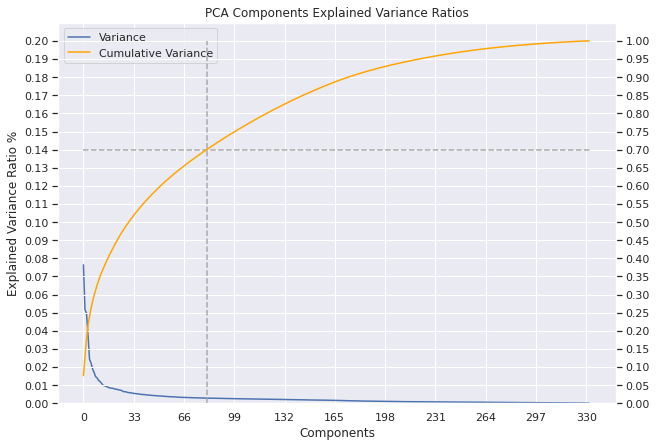

In [91]:
p_explained_variance = 0.7
pca_processor.plot(p_explained_variance)

In [92]:
n_reduced_components = pca_processor.get_components_for_variance(p_explained_variance)
n_reduced_components

81

In [103]:
print(f'{n_reduced_components  / pca_processor.X_train_transformed.shape[1]:5.4f} share components to get {p_explained_variance} share of variance')

0.2432 share components to get 0.7 share of variance


**Results**: The plot shows that 70% of the variance is explained by 81 components (~25% of the components).
I map the dataset to these 81 components for further analysis

#### PCA - show components

Show first and last n_show weights of components 1 - 3

In [106]:
n_show = 7

Component I

In [107]:
pca_processor.get_component_features(0)[:n_show]

Explained Variance in % for cmponent: 0: 0.0764


Attribute  Variance                                  Description
0         MOBI_REGIO  0.141682                              moving patterns
1     LP_STATUS_FEIN  0.138742                           social status fine
2        KBA05_ANTG1  0.130090      number of 1-2 family houses in the cell
3    KBA13_AUTOQUOTE  0.125690  share of cars per household within the PLZ8
4     KBA05_AUTOQUOT  0.125378                  share of cars per household
5          KBA05_GBZ  0.123855         number of buildings in the microcell
6  FINANZ_MINIMALIST  0.119042   financial typology: low financial interest

In [108]:
pca_processor.get_component_features(0)[-n_show:]

Explained Variance in % for cmponent: 0: 0.0764


Attribute  Variance  \
309    FINANZ_HAUSBAUER -0.109414   
310         ORTSGR_KLS9 -0.114175   
311         ORTSGR_KLS9 -0.114175   
312            EWDICHTE -0.116134   
313  HH_EINKOMMEN_SCORE -0.127086   
314          PLZ8_ANTG4 -0.130267   
315     CAMEO_DEUG_2015 -0.131404   

                                         Description  
309  financial typology: main focus is the own house  
310                            size of the community  
311              '- classified number of inhabitants  
312      density of inhabitants per square kilometer  
313                  estimated household net income   
314          number of >10 family houses in the PLZ8  
315           CAMEO classification 2015 - Uppergroup

Component II

In [109]:
pca_processor.get_component_features(1)[:n_show]

Explained Variance in % for cmponent: 1: 0.0517


Attribute  Variance  \
0  PRAEGENDE_JUGENDJAHRE  0.177636   
1          FINANZ_SPARER  0.171276   
2      ONLINE_AFFINITAET  0.154477   
3         FINANZ_ANLEGER  0.151385   
4          SEMIO_PFLICHT  0.140380   
5            SEMIO_TRADV  0.138184   
6              SEMIO_RAT  0.127204   

                                         Description  
0  dominating movement in the person's youth (ava...  
1                    financial typology: money saver  
2                                    online affinity  
3                       financial typology: investor  
4  affinity indicating in what way the person is ...  
5  affinity indicating in what way the person is ...  
6  affinity indicating in what way the person is ...

In [110]:
pca_processor.get_component_features(1)[-n_show:]

Explained Variance in % for cmponent: 1: 0.0517


Attribute  Variance  \
309           W_KEIT_KIND_HH -0.108596   
310         D19_GESAMT_DATUM -0.109094   
311  D19_GESAMT_ONLINE_DATUM -0.116738   
312           RETOURTYP_BK_S -0.116840   
313               SEMIO_LUST -0.118793   
314     ALTERSKATEGORIE_GROB -0.148994   
315         FINANZ_VORSORGER -0.168108   

                                           Description  
309    likelihood of a child present in this household  
310  actuality of the last transaction with the com...  
311  actuality of the last transaction with the com...  
312                                        return type  
313  affinity indicating in what way the person is ...  
314       age classification through prename analysis   
315                    financial typology: be prepared

Component III


In [111]:
pca_processor.get_component_features(2)[:n_show]

Explained Variance in % for cmponent: 2: 0.0499


Attribute  Variance  \
0         KBA13_HERST_BMW_BENZ  0.183161   
1  KBA13_SEG_OBEREMITTELKLASSE  0.158405   
2               KBA13_MERCEDES  0.156953   
3                    KBA13_BMW  0.152231   
4                KBA13_SITZE_4  0.147854   
5         KBA13_SEG_SPORTWAGEN  0.139257   
6                 KBA05_HERST1  0.121165   

                                         Description  
0       share of BMW & Mercedes Benz within the PLZ8  
1  share of upper middle class cars and upper cla...  
2                  share of MERCEDES within the PLZ8  
3                       share of BMW within the PLZ8  
4  number of cars with less than 5 seats in the PLZ8  
5                share of sportscars within the PLZ8  
6  share of top German manufacturer (Mercedes, BMW)

In [112]:
pca_processor.get_component_features(2)[-n_show:]

Explained Variance in % for cmponent: 2: 0.0499


Attribute  Variance  \
309              OST_WEST_KZ -0.111558   
310            KBA13_KMH_180 -0.114524   
311  KBA13_SEG_KOMPAKTKLASSE -0.117896   
312          KBA13_HALTER_25 -0.121013   
313        KBA13_KMH_140_210 -0.125558   
314     KBA13_SEG_KLEINWAGEN -0.132128   
315            KBA13_SITZE_5 -0.153357   

                                           Description  
309                 flag indicating the former GDR/FRG  
310  share of cars with max speed between 110 km/h ...  
311  share of lowe midclass cars (Ford Focus etc.) ...  
312  share of car owners between 21 and 25 within t...  
313  share of cars with max speed between 140 and 2...  
314  share of small and very small cars (Ford Fiest...  
315            number of cars with 5 seats in the PLZ8

#### apply PCA on reduced number of dimensions

In [113]:
pca_reduced = PCAProcessor(df_population_cleaned, df_metadata, n_reduced_components, random_state=42)
pca_reduced.fit_transform()

df_population_pca = pca_reduced.X_train_transformed

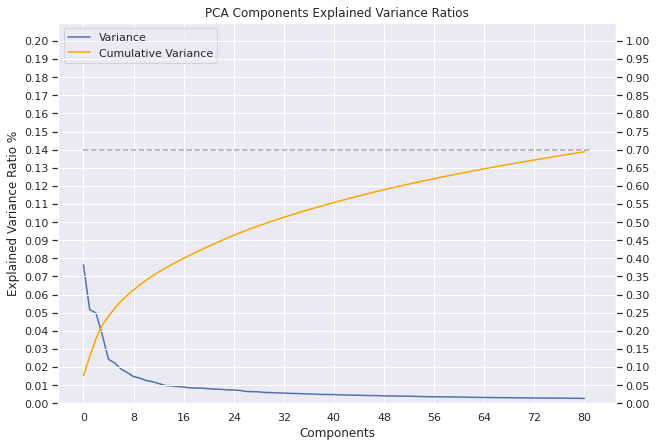

In [114]:
pca_reduced.plot(p_explained_variance)

### Customer Data Set

Now I load the customer data set and apply the PCA transformation with reduced number of components. The result is then used by KMeans for the customer segmentation report.

In [115]:
import python.etl.processor as etlp
df_customers_cleaned = df_customers.copy()
dfCleaner = etlp.PreDataCleaner(df_metadata)

df_customers_cleaned = dfCleaner.transform(df_customers_cleaned, drop_cols=True)
print(df_customers_cleaned.shape)



Dropping customer dataset cols: ['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']
dropping columns: ['CUSTOMER_GROUP', 'ONLINE_PURCHASE', 'PRODUCT_GROUP']
fixing load errors {'CAMEO_DEUG_2015': 'X', 'CAMEO_INTL_2015': 'XX'}
fixed column CAMEO_DEUG_2015 - records fixed: 126
fixed column CAMEO_INTL_2015 - records fixed: 126
fixing year columns: ['MIN_GEBAEUDEJAHR', 'EINGEZOGENAM_HH_JAHR', 'GEBURTSJAHR']
replace unkown values by NaNs: 
 233 of 233columns
replace 0 by NaNs for : ['LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'GEBURTSJAHR']
creating one hot encoding columns for: 
convert to binary: 
	column: OST_WEST_KZ - Mapping: {'W': 0, 'O': 1}
dropping columns: ['EINGEFUEGT_AM', 'CAMEO_DEU_2015', 'LP_STATUS_GROB', 'LP_FAMILIE_GROB', 'D19_VERSAND_ANZ_24', 'LP_LEBENSPHASE_FEIN', 'ANZ_STATISTISCHE_HAUSHALTE', 'CAMEO_INTL_2015', 'D19_VERSAND_ONLINE_DATUM', 'KBA13_HALTER_66', 'KBA13_HERST_SONST', 'PLZ8_BAUMAX', 'PLZ8_GBZ', 'PLZ8_HHZ', 'D19_GESAMT_ANZ_24', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_

In [116]:
df_customers_cleaned.reset_index().to_feather('df_customers_cleaned')

In [117]:
set(df_customers_cleaned.columns) - set(df_population_cleaned.columns)

set()

In [118]:
set(df_population_cleaned.columns) - set(df_customers_cleaned.columns)

set()

In [119]:
print(df_customers_cleaned.shape)
print(df_population_cleaned.shape)
print(df_customers.shape)

(191652, 333)
(845439, 333)
(191652, 368)


In [120]:
df_customers_cleaned.head()


AKT_DAT_KL  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
LNR                                                                           
9626           1.0                  10.0                  1.0           0.0   
9628           9.0                   NaN                  NaN           NaN   
143872         1.0                   0.0                  1.0           0.0   
143873         1.0                   8.0                  0.0           NaN   
143874         1.0                  14.0                  7.0           0.0   

        ANZ_KINDER  ANZ_PERSONEN  ANZ_TITEL  ARBEIT  BALLRAUM  \
LNR                                                             
9626           0.0           2.0        0.0     1.0       3.0   
9628           0.0           3.0        0.0     NaN       NaN   
143872         0.0           1.0        0.0     3.0       7.0   
143873         0.0           0.0        0.0     1.0       7.0   
143874         0.0           4.0        0.0     3.0       3.0   

        CAMEO_DEUG_2015  CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  \
LNR                                                                    
9626                1.0            5.0                4.0        1.0   
9628                NaN            NaN                NaN        NaN   
143872              5.0            2.0                5.0        2.0   
143873              4.0            2.0                5.0        1.0   
143874              7.0            6.0                4.0        3.0   

        CJT_TYP_2  CJT_TYP_3  CJT_TYP_4  CJT_TYP_5  CJT_TYP_6  \
LNR                                                             
9626          1.0        5.0        5.0        5.0        5.0   
9628          NaN        NaN        NaN        NaN        NaN   
143872        2.0        5.0        5.0        5.0        5.0   
143873        1.0        5.0        5.0        5.0        5.0   
143874        3.0        3.0        4.0        3.0        3.0   

        D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  D19_BANKEN_DATUM  \
LNR                                                              
9626                    0                  0                10   
9628                    0                  1                 6   
143872                  0                  0                10   
143873                  0                  0                10   
143874                  1                  2                 3   

        D19_BANKEN_DIREKT  D19_BANKEN_GROSS  D19_BANKEN_LOKAL  \
LNR                                                             
9626                    0                 0                 0   
9628                    0                 5                 0   
143872                  0                 0                 0   
143873                  0                 0                 0   
143874                  5                 0                 3   

        D19_BANKEN_OFFLINE_DATUM  ...  SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  \
LNR                               ...                                      
9626                          10  ...        2.0        6.0          1.0   
9628                          10  ...        2.0        3.0          1.0   
143872                        10  ...        1.0        2.0          1.0   
143873                        10  ...        3.0        6.0          4.0   
143874                        10  ...        4.0        4.0          4.0   

        SEMIO_VERT  SHOPPER_TYP  SOHO_KZ  STRUKTURTYP  UMFELD_ALT  \
LNR                                                                 
9626           6.0          3.0      0.0          3.0         4.0   
9628           7.0          3.0      0.0          NaN         NaN   
143872         3.0          1.0      0.0          3.0         1.0   
143873         7.0          0.0      0.0          1.0         3.0   
143874         5.0          1.0      0.0          3.0         2.0   

        UMFELD_JUNG  UNGLEICHENN_FLAG  VERDICHTUNGSRAUM  VERS_TYP  VHA  VHN  \
LNR                   

In [121]:
#df_customers_cleaned = df_customers_cleaned.sample(20000)
df_customers_pca = pca_reduced.transform(df_customers_cleaned)

## Cluster Building
we use now the given number of components (n_reduced_components) to build reduce the number of dimensions

### KMeans

#### Kmeans Ellbow Method
I use the [yellowbricks visualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html#module-yellowbrick.cluster.elbow) to calculate the number of useful clusters. In order to speed up the caclulation I use a sample of 15,000 random records to determine the ellbow.

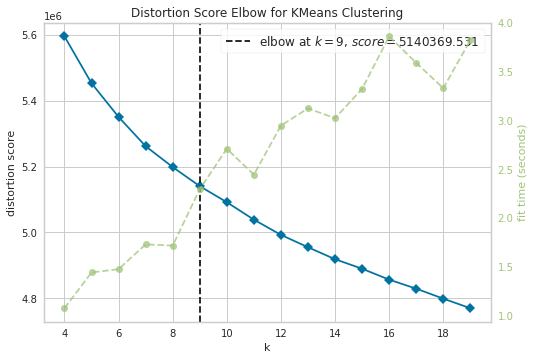

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [142]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Generate synthetic dataset with 8 random clustersa
#X, y = make_blobs(n_samples=1000, n_features=12, centers=8, random_state=42)

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,20))

visualizer.fit(df_population_pca.sample(30000))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [143]:
n_best_num_kmeans_clusters = 9

In [144]:
from  python.model.kmeans import KMeansProcessor

In [145]:
kmeans = KMeansProcessor()
# use 10 cluster as calculated by the ellbow method
k_means_result = kmeans.fit_transform(df_population_pca, n_clusters=n_best_num_kmeans_clusters)

### Review segmentation



In [146]:
customer_labels = kmeans.model.predict(df_customers_pca)
customer_centroids = kmeans.model.cluster_centers_

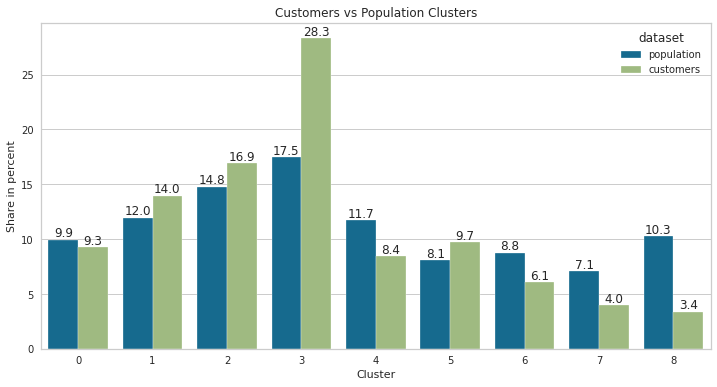

In [147]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

population_component_share = 100 * np.bincount(kmeans.pop_labels)/len(kmeans.pop_labels)
customer_component_share = 100 * np.bincount(customer_labels)/len(customer_labels)
component_shares = pd.DataFrame({'population':population_component_share,'customers':customer_component_share})
component_shares = component_shares.reset_index().melt(value_vars=['population','customers'],id_vars=['index'])
component_shares.rename(columns={'index':'component','variable':'dataset','value':'share'}, inplace=True)


#clusters = [x for x in range(0,n_best_num_kmeans_clusters)]
fig, ax = plt.subplots(1,1,figsize=(12,6))
#w=0.4
#sns.barplot(x=np.array(clusters)-0.2, height=customer_component_share, width=w , ax=ax)
sns.barplot(data=component_shares, x='component',y='share',hue='dataset',   ax=ax)
#sns.bar(x=np.array(clusters)+0.2, height=population_component_share, width=w, ax=ax)
plt.ylabel('Share in percent')
plt.xlabel('Cluster')
plt.xticks(range(0,n_best_num_kmeans_clusters))
plt.title('Customers vs Population Clusters')



for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.show()

Customers are much more in component 6 (26.6% vs 17.7%) and little more in component 1,2,3 (~ 2% more).
General population main components are 4 and 7

I now check which features are the main drivers for that components.

In [148]:
centroids_df = pd.DataFrame(pca_reduced.pca.inverse_transform(customer_centroids), columns=df_customers_cleaned.columns)


In [149]:
centroids_df

AKT_DAT_KL  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
0   -0.032764             -0.527403             0.403303      0.056663   
1   -0.688244             -0.015426            -0.409286     -0.096829   
2   -0.261517             -0.618784            -0.325562     -0.109833   
3    0.391121              0.185705            -0.138762     -0.090282   
4   -0.106067              0.709231            -0.211396     -0.088553   
5   -0.041089             -0.279766             0.040864      0.291407   
6    0.265489             -0.135192             0.716237      0.253469   
7   -0.085251              0.004655            -0.290168     -0.067531   
8    0.447693              0.629781             0.508291      0.012511   

   ANZ_KINDER  ANZ_PERSONEN  ANZ_TITEL    ARBEIT  BALLRAUM  CAMEO_DEUG_2015  \
0   -0.287020     -0.318623  -0.023153  0.763688 -0.196640         0.764700   
1    0.277738      1.075603   0.031391 -0.486326  0.278983        -0.682728   
2   -0.260082     -0.189811  -0.026763 -0.549236  0.396515        -0.526201   
3   -0.219111     -0.426786  -0.040242 -0.230627  0.231123         0.012099   
4    0.725210      0.350917  -0.039913 -0.295961  0.146581        -0.267802   
5   -0.168456     -0.166471   0.190583 -0.035750 -0.575736        -0.373845   
6   -0.231656     -0.385295   0.023623  0.358568 -0.794832         0.881472   
7   -0.048496     -0.008540   0.008888  0.529556  0.790033        -0.140056   
8    0.002796     -0.235586  -0.058924  0.670812 -0.523786         0.939655   

   CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  CJT_TYP_2  CJT_TYP_3  \
0      -0.443051           0.670321  -0.792330  -0.700754   0.618779   
1       0.118145          -0.494708  -0.284158  -0.421395   0.323384   
2      -0.597073           0.605314  -0.964138  -1.041296   0.936407   
3       0.185591          -0.012773   0.443106   0.427484  -0.313239   
4       0.457107          -0.779348   0.888374   0.832859  -0.684371   
5      -0.131995           0.175544  -0.369075  -0.292645   0.185096   
6       0.006755           0.420539  -0.112560   0.091274  -0.156822   
7      -0.095745           0.082344  -0.124191  -0.218840   0.244311   
8       0.367273          -0.406019   1.003093   1.133081  -1.068104   

   CJT_TYP_4  CJT_TYP_5  CJT_TYP_6  D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  \
0   0.737034   0.595674   0.629506          -0.176248          -0.216240   
1   0.071713   0.350273   0.179562           0.541463           0.610629   
2   0.837304   0.950175   0.882293          -0.214950          -0.252374   
3  -0.248078  -0.393022  -0.284235          -0.222161          -0.275185   
4  -0.791752  -0.722577  -0.752919           0.381303           0.470284   
5   0.317916   0.325140   0.253326          -0.143484          -0.157663   
6   0.046022  -0.059046   0.033152          -0.157648          -0.196624   
7  -0.011301   0.161566   0.142720          -0.085944          -0.077000   
8  -0.791190  -1.046120  -0.937507          -0.003492           0.016473   

   D19_BANKEN_DATUM  D19_BANKEN_DIREKT  D19_BANKEN_GROSS  D19_BANKEN_LOKAL  \
0          0.262363          -0.232495         -0.186318         -0.060779   
1         -0.748499           0.599233          0.400977          0.448970   
2          0.304088          -0.274854         -0.200789         -0.091201   
3          0.377563          -0.346510         -0.280948         -0.122871   
4         -0.572364           0.497686          0.448148          0.004565   
5          0.153780          -0.140769         -0.111297         -0.049570   
6          0.241589          -0.226369         -0.179251         -0.098702   
7          0.064011           0.034091         -0.016497          0.079654   
8         -0.032995           0.096029          0.125914         -0.114686   

   D19_BANKEN_OFFLINE_DATUM  ...  SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  \
0                  0.083224  ...  -0.692208  -0.052724    -0.758637   
1                 -0.445893  ...  -0.353000  -0.019347    -0.21026

In [162]:
def show_component_details(dataset):
    n_max_disp = 3
    investigate_col_set_pos = set()
    investigate_col_set_neg = set()

    tdf = component_shares.pivot(columns='dataset', index='component')
    #tdf['diff'] = tdf['customer']-tdf['population']
    tdf = tdf.droplevel(axis=1, level=None)
    tdf['diff'] = tdf['population']-tdf['customers']

    ascending = dataset =='customers'
    tarr = tdf['diff'].sort_values(ascending = ascending).index[:n_max_disp]
    
    print(f'Dataset: {dataset}')
    for i, component_idx in enumerate(tarr):
        print('-'*50)
        print(f'Cluster: {component_idx}')
        print(f'Difference (population - customers) : {tdf.loc[component_idx,"diff"]:3.2f}%')
        print()
        max_pos_cols = centroids_df.iloc[component_idx,:].sort_values(ascending=False)[:4]
        for e in max_pos_cols.index:
            investigate_col_set_pos.add(e)
        
        max_neg_cols = centroids_df.iloc[component_idx,:].sort_values(ascending=False)[-4:]        
        for e in max_neg_cols.index:
            investigate_col_set_neg.add(e)
            
        print(max_pos_cols)        
        print()
        print(max_neg_cols)
        print()
        
    return investigate_col_set_pos, investigate_col_set_neg
        
cust_pos_cols, cust_neg_cols = show_component_details('customers')

Dataset: customers
--------------------------------------------------
Cluster: 3
Difference (population - customers) : -10.87%

D19_GESAMT_DATUM           0.743076
D19_KONSUMTYP_MAX          0.733504
D19_GESAMT_ONLINE_DATUM    0.673289
VK_DISTANZ                 0.644859
Name: 3, dtype: float64

D19_SONSTIGE                  -0.541147
D19_GESAMT_ANZ_12             -0.599165
D19_VERSAND_ONLINE_QUOTE_12   -0.689340
D19_GESAMT_ONLINE_QUOTE_12    -0.730498
Name: 3, dtype: float64

--------------------------------------------------
Cluster: 2
Difference (population - customers) : -2.15%

CJT_TYP_5           0.950175
CJT_TYP_3           0.936407
FINANZ_VORSORGER    0.912957
CJT_TYP_6           0.882293
Name: 2, dtype: float64

PRAEGENDE_JUGENDJAHRE   -0.880581
FINANZ_SPARER           -0.947545
CJT_TYP_1               -0.964138
CJT_TYP_2               -1.041296
Name: 2, dtype: float64

--------------------------------------------------
Cluster: 1
Difference (population - customers) : -2.00%



### Population main cluster

In [163]:
pop_pos_cols, pop_neg_cols = show_component_details('population')

Dataset: population
--------------------------------------------------
Cluster: 8
Difference (population - customers) : 6.89%

CJT_TYP_2        1.133081
KBA13_ANTG4      1.102190
PLZ8_ANTG4       1.079702
FINANZ_SPARER    1.071716
Name: 8, dtype: float64

CJT_TYP_5           -1.046120
KBA13_ANTG1         -1.054964
CJT_TYP_3           -1.068104
FINANZ_MINIMALIST   -1.240375
Name: 8, dtype: float64

--------------------------------------------------
Cluster: 4
Difference (population - customers) : 3.30%

ONLINE_AFFINITAET        1.078415
PRAEGENDE_JUGENDJAHRE    0.941774
CJT_TYP_1                0.888374
FINANZ_UNAUFFAELLIGER    0.855958
Name: 4, dtype: float64

CJT_KATALOGNUTZER         -0.779348
CJT_TYP_4                 -0.791752
D19_GESAMT_DATUM          -0.806747
D19_GESAMT_ONLINE_DATUM   -0.853298
Name: 4, dtype: float64

--------------------------------------------------
Cluster: 7
Difference (population - customers) : 3.11%

OST_WEST_KZ        1.622230
KBA13_SITZE_5      1.581272

## compare values for some features

In [172]:
def plot_feature_diff (cols):
    n_chars_per_row=4
    meta_cols = df_metadata['Attribute'].unique()

    fig, axes = plt.subplots(len(cols) //n_chars_per_row+(1 if len(cols) % n_chars_per_row!=0 else 0), n_chars_per_row, figsize=(20,16))
    plt.subplots_adjust(hspace=0.8)

    for idx, col in enumerate(cols):
        r = pd.concat([df_population_cleaned[col].value_counts().sort_index()/df_population_cleaned[col].notnull().sum(),
               df_customers_cleaned[col].value_counts().sort_index()/df_customers_cleaned[col].notnull().sum()], join='inner', axis=1, keys=['pop','cust'])

        r.reset_index(inplace=True)
        r = r.melt(value_vars=['pop','cust'],id_vars=['index'])

        ax = axes[idx//n_chars_per_row,idx%n_chars_per_row]
        sns.barplot(x='index',y='value',hue='variable',data=r, ax=ax)    

        if col in meta_cols:
            try:
                mapping = df_metadata[(df_metadata['Attribute']==col)][['Value','Meaning']]
                mask = mapping['Meaning'] !='unknown'
                mapping['Value'] = mapping[mask]['Value'].astype('int')            
                mapping = mapping.set_index('Value').to_dict()

                #print(mapping)
                labels = ax.get_xticklabels()


                mapped_labels = []
                for label in labels:            
                    tval = label.get_text()             
                    tval = int(float(tval))
                    try:
                        mval = mapping['Meaning'][tval]
                        mapped_labels.append(mval[:20])
                    except:
                        mapped_labels.append(tval)

                ax.set_xticklabels(mapped_labels, rotation=90)
            except Exception as e:
                print(e)
                print(col)


        ax.set_ylabel('share')
        ax.set_xlabel('attribute value')

        #ax.set_xticklabels((np.arange(0,10)*10)[:n_labels])
        ax.set_title(col)
    
    

invalid literal for int() with base 10: '…'
ANZ_PERSONEN


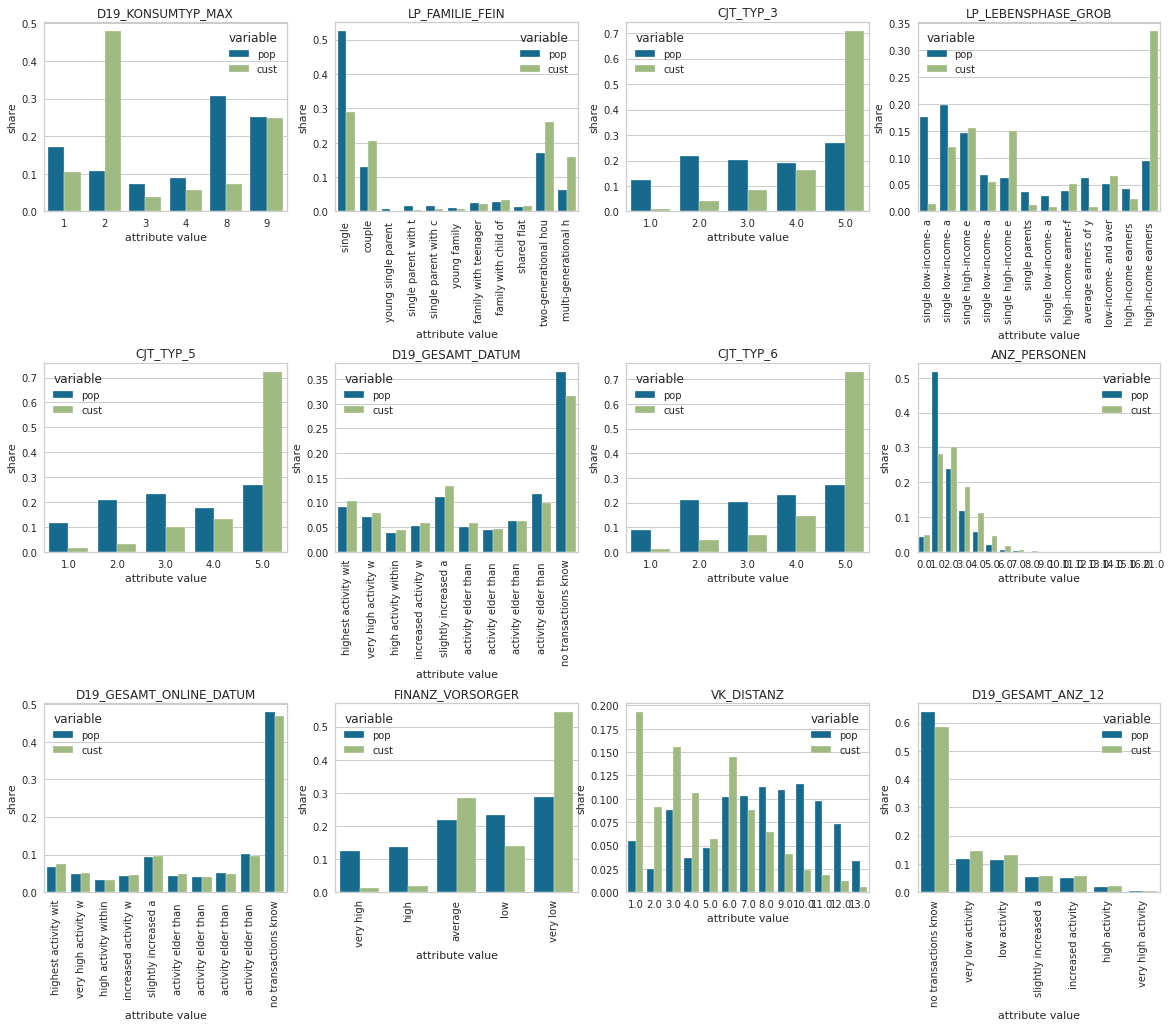

In [173]:
#len(cust_pos_cols) //5
plot_feature_diff(cust_pos_cols)

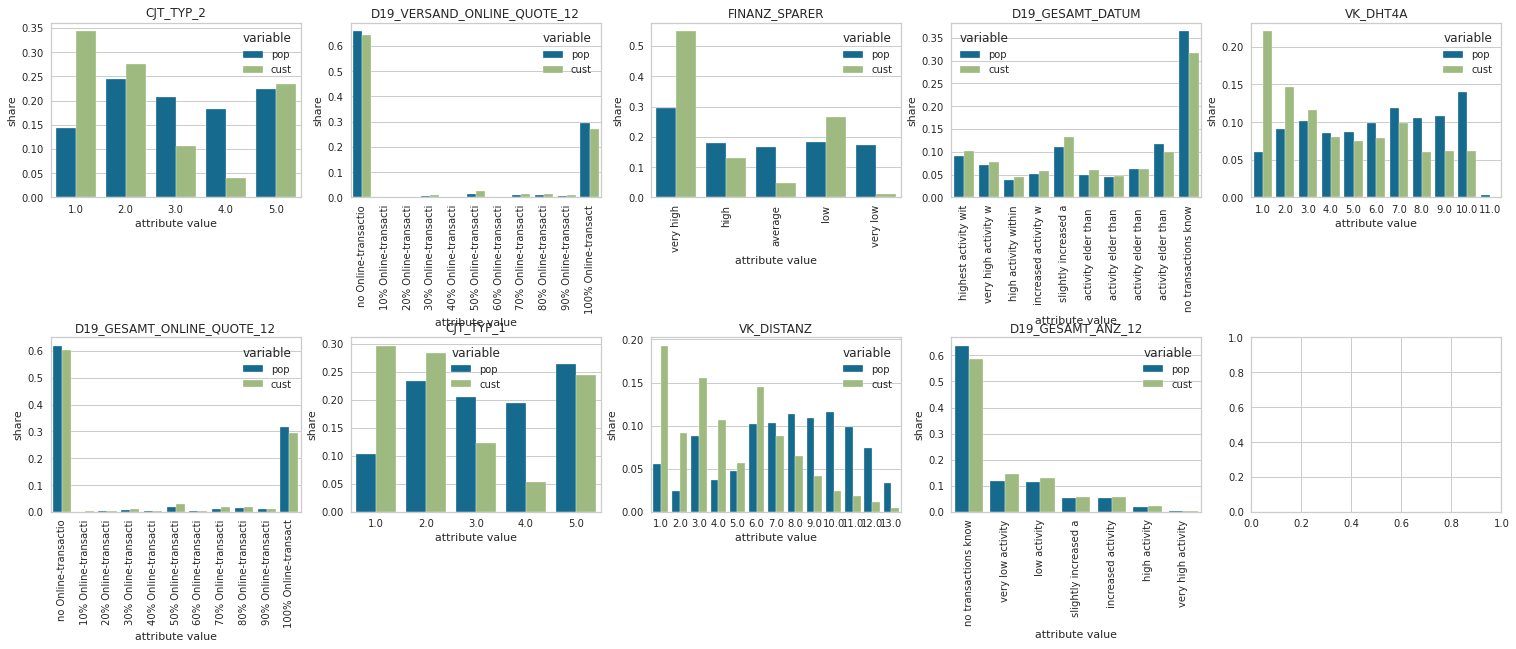

In [135]:
plot_feature_diff(cust_neg_cols)

invalid literal for int() with base 10: 'O'
OST_WEST_KZ


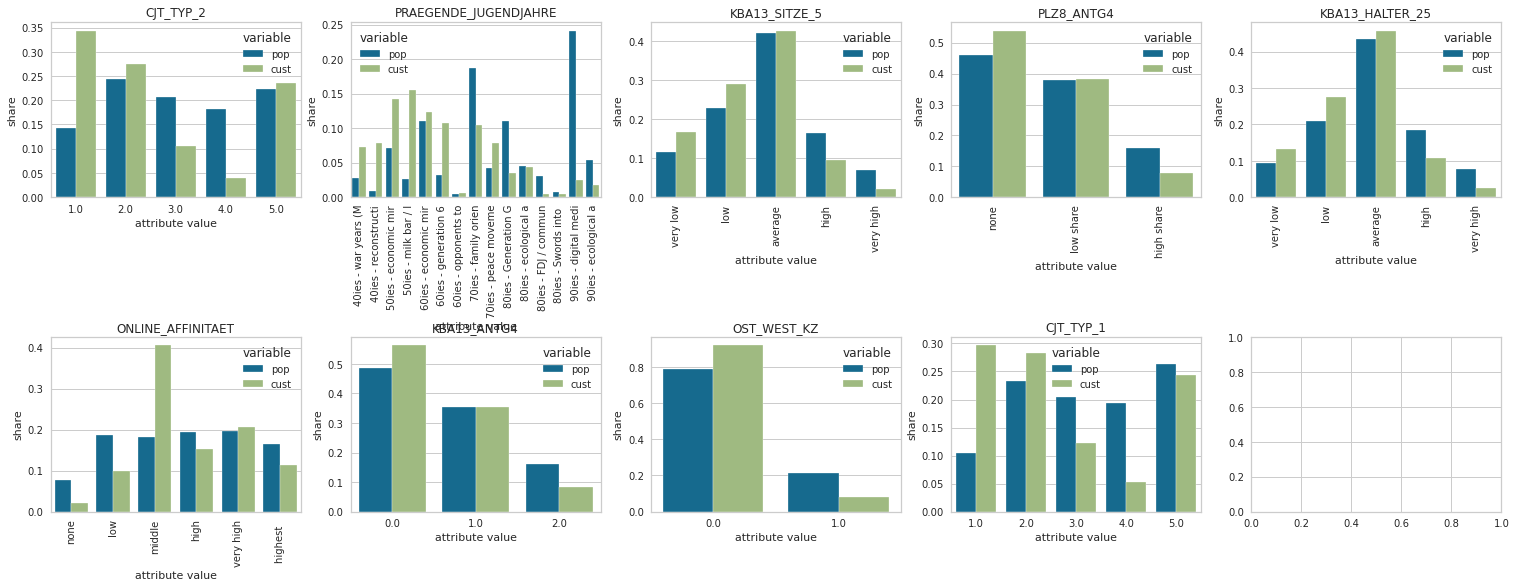

In [136]:
plot_feature_diff(pop_pos_cols)

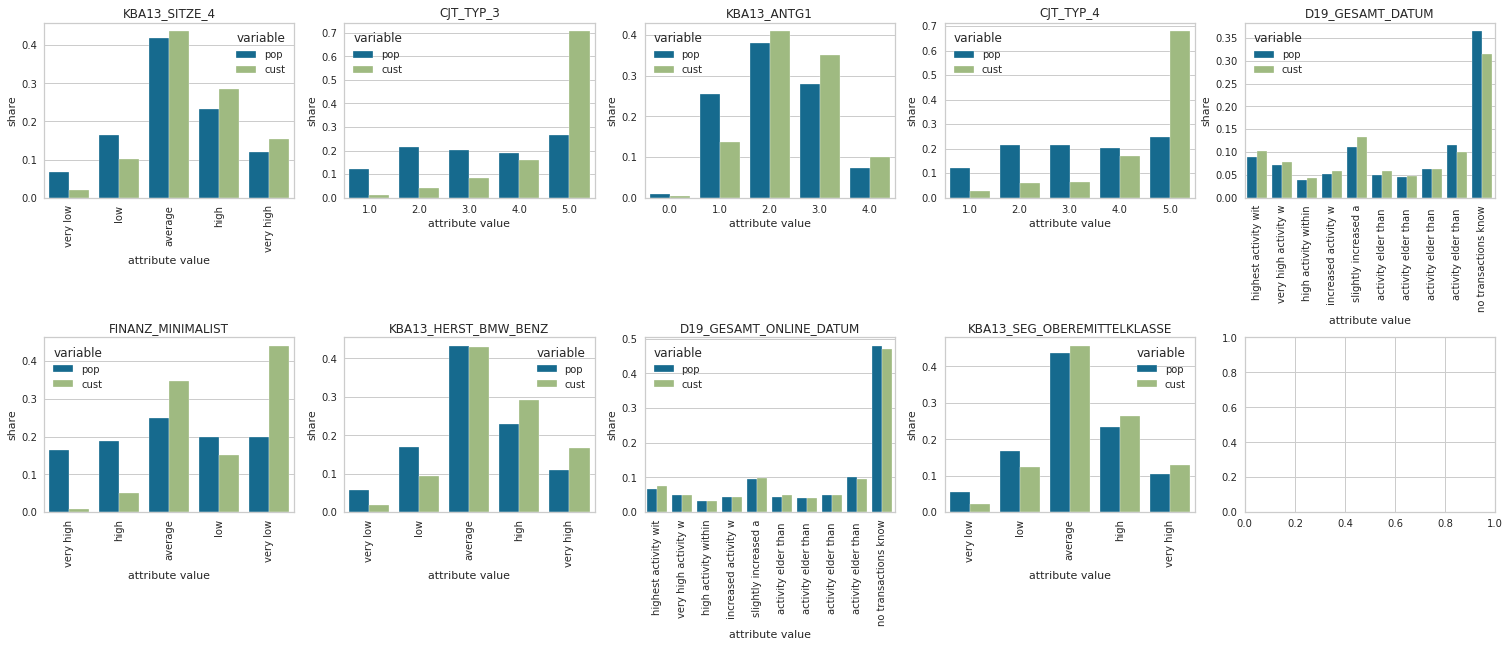

In [137]:
plot_feature_diff(pop_neg_cols)

# Part 2: Supervised Learning Model
---

Now that you've found which parts of the population are more likely to be customers of the mail-order company, it's time to build a prediction model. Each of the rows in the "MAILOUT" data files represents an individual that was targeted for a mailout campaign. Ideally, we should be able to use the demographic information from each individual to decide whether or not it will be worth it to include that person in the campaign.

The "MAILOUT" data has been split into two approximately equal parts, each with almost 43 000 data rows. In this part, you can verify your model with the "TRAIN" partition, which includes a column, "RESPONSE", that states whether or not a person became a customer of the company following the campaign. In the next part, you'll need to create predictions on the "TEST" partition, where the "RESPONSE" column has been withheld.

In [174]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import progressbar

# magic word for producing visualizations in notebooka
%matplotlib inline

sns.set_theme()

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from python.etl.plot import Plot

In [176]:
sns.__version__


'0.11.2'

## Load Training and Test Data 

* load customer and population cleaned datasets
* load Mailout training and Test data
* preprocess mailout datasets 

In [177]:
import os
if os.path.exists('data') and os.path.isdir('data'):
    prefix = './data'
else:
    prefix = 's3://sagemaker-eu-central-1-292575554790/dsnd_arvato'

In [178]:
df_metadata = pd.read_excel(f'{prefix}/DIAS Attributes - Values 2017.xlsx', usecols='B:E', dtype='str', header=1).fillna(method='ffill')

df_population_cleaned = pd.read_feather('df_azdias_cleaned')
df_customers_cleaned = pd.read_feather('df_customers_cleaned')

# set the index as feather-format did store the index as column
df_population_cleaned.set_index('LNR', inplace=True)
df_customers_cleaned.set_index('LNR', inplace=True)
df_population_cleaned.head(3)


AKT_DAT_KL  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
LNR                                                                           
910215         NaN                   NaN                  NaN           NaN   
910220         9.0                  21.0                 11.0           0.0   
910225         9.0                  17.0                 10.0           0.0   

        ANZ_KINDER  ANZ_PERSONEN  ANZ_TITEL  ARBEIT  BALLRAUM  \
LNR                                                             
910215         NaN           NaN        NaN     NaN       NaN   
910220         0.0           2.0        0.0     3.0       6.0   
910225         0.0           1.0        0.0     3.0       2.0   

        CAMEO_DEUG_2015  CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  \
LNR                                                                    
910215              NaN            2.0                5.0        1.0   
910220              8.0            5.0                1.0        5.0   
910225              4.0            3.0                2.0        4.0   

        CJT_TYP_2  CJT_TYP_3  CJT_TYP_4  CJT_TYP_5  CJT_TYP_6  \
LNR                                                             
910215        1.0        5.0        5.0        5.0        5.0   
910220        5.0        2.0        3.0        1.0        1.0   
910225        4.0        1.0        3.0        2.0        2.0   

        D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  D19_BANKEN_DATUM  \
LNR                                                              
910215                  0                  0                10   
910220                  0                  0                10   
910225                  0                  0                10   

        D19_BANKEN_DIREKT  D19_BANKEN_GROSS  D19_BANKEN_LOKAL  \
LNR                                                             
910215                  0                 0                 0   
910220                  0                 0                 0   
910225                  0                 0                 0   

        D19_BANKEN_OFFLINE_DATUM  ...  SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  \
LNR                               ...                                      
910215                        10  ...        7.0        2.0          3.0   
910220                        10  ...        4.0        5.0          6.0   
910225                        10  ...        3.0        4.0          3.0   

        SEMIO_VERT  SHOPPER_TYP  SOHO_KZ  STRUKTURTYP  UMFELD_ALT  \
LNR                                                                 
910215         1.0          NaN      NaN          NaN         NaN   
910220         1.0          3.0      1.0          2.0         3.0   
910225         4.0          2.0      0.0          3.0         2.0   

        UMFELD_JUNG  UNGLEICHENN_FLAG  VERDICHTUNGSRAUM  VERS_TYP  VHA  VHN  \
LNR                                                                           
910215          NaN               NaN               NaN       NaN  NaN  NaN   
910220          3.0               1.0               0.0       2.0  0.0  4.0   
910225          5.0               0.0               1.0       1.0  0.0  2.0   

        VK_DHT4A  VK_DISTANZ  VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  \
LNR                                                                     
910215       NaN         NaN      NaN             NaN             NaN   
910220       8.0        11.0     10.0             3.0             9.0   
910225       9.0         9.0      6.0             3.0             9.0   

        WOHNLAGE  ZABEOTYP  ANREDE_KZ  ALTERSKATEGORIE_GROB  d_HAS_CHILDREN  \
LNR                                                                           
910215       NaN       3.0        1.0                   2.0               0   
910220       4.0       5.0        2.0                   1.0               0   
910225       2.0       5.0        2.0                   3.0               0   

        d_HAS_CHILDREN_YTE10  
LNR                       

In [179]:
df_customers_cleaned.head(3)

AKT_DAT_KL  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
LNR                                                                           
9626           1.0                  10.0                  1.0           0.0   
9628           9.0                   NaN                  NaN           NaN   
143872         1.0                   0.0                  1.0           0.0   

        ANZ_KINDER  ANZ_PERSONEN  ANZ_TITEL  ARBEIT  BALLRAUM  \
LNR                                                             
9626           0.0           2.0        0.0     1.0       3.0   
9628           0.0           3.0        0.0     NaN       NaN   
143872         0.0           1.0        0.0     3.0       7.0   

        CAMEO_DEUG_2015  CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  \
LNR                                                                    
9626                1.0            5.0                4.0        1.0   
9628                NaN            NaN                NaN        NaN   
143872              5.0            2.0                5.0        2.0   

        CJT_TYP_2  CJT_TYP_3  CJT_TYP_4  CJT_TYP_5  CJT_TYP_6  \
LNR                                                             
9626          1.0        5.0        5.0        5.0        5.0   
9628          NaN        NaN        NaN        NaN        NaN   
143872        2.0        5.0        5.0        5.0        5.0   

        D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  D19_BANKEN_DATUM  \
LNR                                                              
9626                    0                  0                10   
9628                    0                  1                 6   
143872                  0                  0                10   

        D19_BANKEN_DIREKT  D19_BANKEN_GROSS  D19_BANKEN_LOKAL  \
LNR                                                             
9626                    0                 0                 0   
9628                    0                 5                 0   
143872                  0                 0                 0   

        D19_BANKEN_OFFLINE_DATUM  ...  SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  \
LNR                               ...                                      
9626                          10  ...        2.0        6.0          1.0   
9628                          10  ...        2.0        3.0          1.0   
143872                        10  ...        1.0        2.0          1.0   

        SEMIO_VERT  SHOPPER_TYP  SOHO_KZ  STRUKTURTYP  UMFELD_ALT  \
LNR                                                                 
9626           6.0          3.0      0.0          3.0         4.0   
9628           7.0          3.0      0.0          NaN         NaN   
143872         3.0          1.0      0.0          3.0         1.0   

        UMFELD_JUNG  UNGLEICHENN_FLAG  VERDICHTUNGSRAUM  VERS_TYP  VHA  VHN  \
LNR                                                                           
9626            4.0               0.0               8.0       1.0  0.0  3.0   
9628            NaN               0.0               NaN       1.0  0.0  NaN   
143872          5.0               0.0               0.0       2.0  0.0  4.0   

        VK_DHT4A  VK_DISTANZ  VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  \
LNR                                                                     
9626         5.0         3.0      2.0             6.0             9.0   
9628         6.0         6.0      3.0             NaN             9.0   
143872      10.0        13.0     11.0             6.0             9.0   

        WOHNLAGE  ZABEOTYP  ANREDE_KZ  ALTERSKATEGORIE_GROB  d_HAS_CHILDREN  \
LNR                                                                           
9626         7.0       3.0        1.0                   4.0               0   
9628         NaN       3.0        1.0                   4.0               0   
143872       2.0       3.0        2.0                   4.0               0   

        d_HAS_CHILDREN_YTE10  
LNR                       

In [180]:
df_mailout_train = pd.read_csv(f'{prefix}/Udacity_MAILOUT_052018_TRAIN.csv', sep=';')

#df_mailout_test = pd.read_csv(f'{prefix}/mailout_test.csv', index_col=False)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [181]:
df_mailout_test = pd.read_csv(f'{prefix}/Udacity_MAILOUT_052018_TEST.csv', index_col=False, sep=';')

In [182]:
df_mailout_test.head(5)

LNR  AGER_TYP  AKT_DAT_KL  ALTER_HH  ALTER_KIND1  ALTER_KIND2  \
0  1754         2         1.0       7.0          NaN          NaN   
1  1770        -1         1.0       0.0          NaN          NaN   
2  1465         2         9.0      16.0          NaN          NaN   
3  1470        -1         7.0       0.0          NaN          NaN   
4  1478         1         1.0      21.0          NaN          NaN   

   ALTER_KIND3  ALTER_KIND4  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  \
0          NaN          NaN                   6.0                  2.0   
1          NaN          NaN                   0.0                 20.0   
2          NaN          NaN                  11.0                  2.0   
3          NaN          NaN                   0.0                  1.0   
4          NaN          NaN                  13.0                  1.0   

   ANZ_HH_TITEL  ANZ_KINDER  ANZ_PERSONEN  ANZ_STATISTISCHE_HAUSHALTE  \
0           0.0         0.0           2.0                         2.0   
1           0.0         0.0           1.0                        21.0   
2           0.0         0.0           4.0                         2.0   
3           0.0         0.0           0.0                         1.0   
4           0.0         0.0           4.0                         1.0   

   ANZ_TITEL  ARBEIT  BALLRAUM CAMEO_DEU_2015 CAMEO_DEUG_2015 CAMEO_INTL_2015  \
0        0.0     3.0       6.0             2B               2              13   
1        0.0     4.0       7.0             5A               5              31   
2        0.0     4.0       1.0             7A               7              41   
3        0.0     4.0       1.0             2B               2              13   
4        0.0     3.0       6.0             5A               5              31   

   CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  CJT_TYP_2  CJT_TYP_3  ...  \
0            5.0                5.0        1.0        2.0        5.0  ...   
1            1.0                5.0        2.0        2.0        5.0  ...   
2            2.0                5.0        2.0        2.0        5.0  ...   
3            4.0                5.0        2.0        1.0        5.0  ...   
4            6.0                1.0        3.0        2.0        4.0  ...   

   SEMIO_RAT  SEMIO_REL  SEMIO_SOZ  SEMIO_TRADV  SEMIO_VERT  SHOPPER_TYP  \
0          1          2          6            1           7            3   
1          3          3          6            1           6            2   
2          3          1          4            3           3            3   
3          3          2          3            3           2            3   
4          3          2          5            3           3            3   

   SOHO_KZ  STRUKTURTYP  TITEL_KZ  UMFELD_ALT  UMFELD_JUNG  UNGLEICHENN_FLAG  \
0      0.0          3.0       0.0         2.0          5.0               0.0   
1      0.0          3.0       0.0         4.0          3.0               0.0   
2      0.0          3.0       0.0         1.0          5.0               1.0   
3      0.0          3.0       0.0         2.0          5.0               0.0   
4      0.0          2.0       0.0         5.0          5.0               0.0   

   VERDICHTUNGSRAUM  VERS_TYP  VHA  VHN  VK_DHT4A  VK_DISTANZ  VK_ZG11  \
0              23.0         1  1.0  4.0       5.0         6.0      3.0   
1               0.0         1  1.0  1.0       5.0         2.0      1.0   
2              15.0         1  1.0  3.0       9.0         6.0      3.0   
3              10.0         2  1.0  2.0       6.0         6.0      3.0   
4               0.0         1  1.0  1.0       2.0         4.0      3.0   

   W_KEIT_KIND_HH  WOHNDAUER_2008  WOHNLAGE  ZABEOTYP  ANREDE_KZ  \
0             6.0             9.0       3.0         3          1   
1             6.0             9.0       5.0         3          1   
2             2.0             9.0       4.0         3          2   
3             NaN             9.0       2.0         3          2   
4             3.0             9.

In [183]:
print(df_mailout_train.shape)
print(df_population_cleaned.shape)
print(df_customers_cleaned.shape)

(42962, 367)
(845439, 333)
(191652, 333)


### Clean Mailout Data

In [184]:
import python.etl.processor as etlp
dfCleaner = etlp.PreDataCleaner(df_metadata)


df_mailout_train.set_index('LNR',inplace=True)
df_mailout_test.set_index('LNR',inplace=True)

df_mailout_train = dfCleaner.transform(df_mailout_train,drop_cols=True)
df_mailout_test = dfCleaner.transform(df_mailout_test,drop_cols=True)


fixing load errors {'CAMEO_DEUG_2015': 'X', 'CAMEO_INTL_2015': 'XX'}
fixed column CAMEO_DEUG_2015 - records fixed: 11
fixed column CAMEO_INTL_2015 - records fixed: 11
fixing year columns: ['MIN_GEBAEUDEJAHR', 'EINGEZOGENAM_HH_JAHR', 'GEBURTSJAHR']
replace unkown values by NaNs: 
 233 of 233columns
replace 0 by NaNs for : ['LP_LEBENSPHASE_GROB', 'LP_FAMILIE_FEIN', 'GEBURTSJAHR']
creating one hot encoding columns for: 
convert to binary: 
	column: OST_WEST_KZ - Mapping: {'W': 0, 'O': 1}
dropping columns: ['EINGEFUEGT_AM', 'CAMEO_DEU_2015', 'LP_STATUS_GROB', 'LP_FAMILIE_GROB', 'D19_VERSAND_ANZ_24', 'LP_LEBENSPHASE_FEIN', 'ANZ_STATISTISCHE_HAUSHALTE', 'CAMEO_INTL_2015', 'D19_VERSAND_ONLINE_DATUM', 'KBA13_HALTER_66', 'KBA13_HERST_SONST', 'PLZ8_BAUMAX', 'PLZ8_GBZ', 'PLZ8_HHZ', 'D19_GESAMT_ANZ_24', 'D19_VERSAND_ANZ_12', 'D19_VERSAND_DATUM', 'KBA05_KRSHERST2', 'KBA05_KRSHERST3', 'KBA05_SEG9', 'KBA13_KMH_211', 'PLZ8_ANTG1', 'PLZ8_ANTG3', 'ALTER_KIND4', 'TITEL_KZ', 'ALTER_KIND3', 'ALTER_KIND2', 

In [185]:
print(df_mailout_train.shape)
print(df_population_cleaned.shape)
print(df_customers_cleaned.shape)

(42962, 334)
(845439, 333)
(191652, 333)


## Mailout Segmentation
Let's make a comparison of the population, customer and mailout training data set

In [186]:
X_train = df_mailout_train.drop(['RESPONSE'], axis=1)
y_train = df_mailout_train['RESPONSE']
y_train = y_train.astype('int64')

X_test  = df_mailout_test



In [187]:
df_mailout_train_pca = pca_reduced.transform(X_train)
df_mailout_test_pca = pca_reduced.transform(X_test)

In [188]:
#df_mailout_train_pca=df_mailout_train_pca[y[y==1]]
mailout_labels_train = kmeans.model.predict(df_mailout_train_pca)
mailout_labels_test = kmeans.model.predict(df_mailout_test_pca)
customer_centroids = kmeans.model.cluster_centers_

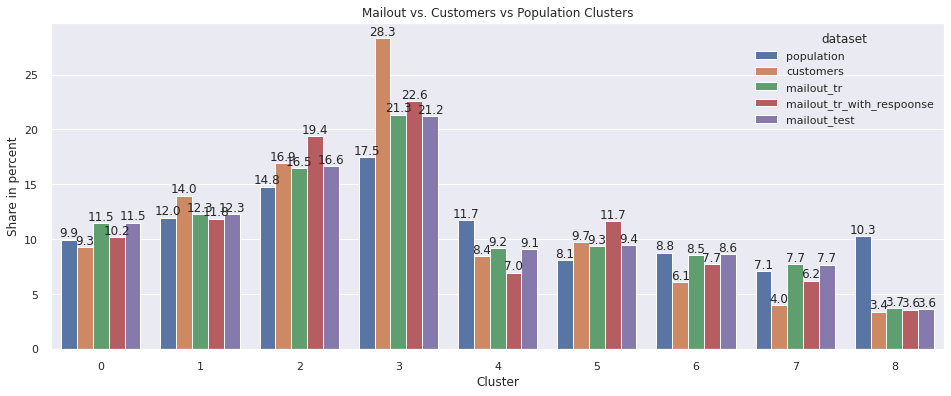

In [189]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

population_component_share = 100 * np.bincount(kmeans.pop_labels)/len(kmeans.pop_labels)
customer_component_share = 100 * np.bincount(customer_labels)/len(customer_labels)
# mailout no response
mailout_tr_component_share = 100 * np.bincount(mailout_labels_train[y_train==0])/len(mailout_labels_train[y_train==0])
# with response
mailout_tr_resp_component_share = 100 * np.bincount(mailout_labels_train[y_train==1])/len(mailout_labels_train[y_train==1])

mailout_tst_component_share = 100 * np.bincount(mailout_labels_test)/len(mailout_labels_test)

component_shares = pd.DataFrame({'population':population_component_share,'customers':customer_component_share, 
                                 'mailout_tr':mailout_tr_component_share, 'mailout_tr_with_respoonse':mailout_tr_resp_component_share,
                                'mailout_test':mailout_tst_component_share})
component_shares = component_shares.reset_index().melt(value_vars=['population','customers','mailout_tr', 'mailout_tr_with_respoonse','mailout_test'],id_vars=['index'])
component_shares.rename(columns={'index':'component','variable':'dataset','value':'share'}, inplace=True)


#clusters = [x for x in range(0,n_best_num_kmeans_clusters)]
fig, ax = plt.subplots(1,1,figsize=(16,6))
#w=0.4
#sns.barplot(x=np.array(clusters)-0.2, height=customer_component_share, width=w , ax=ax)
sns.barplot(data=component_shares, x='component',y='share',hue='dataset',   ax=ax)
#sns.bar(x=np.array(clusters)+0.2, height=population_component_share, width=w, ax=ax)
plt.ylabel('Share in percent')
plt.xlabel('Cluster')
#plt.xticks(rangeclusters)
plt.title('Mailout vs. Customers vs Population Clusters')



for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.show()

## Split data to Train and Validation data

In [190]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, XGBRegressor
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


from sklearn.metrics import roc_auc_score, fbeta_score, accuracy_score, precision_score, recall_score

In [191]:
X = df_mailout_train.drop(['RESPONSE'], axis=1)
y = df_mailout_train['RESPONSE']
y=y.astype('int64')


In [192]:
# I use stratify = y to keep the ratio of responses in the split datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=142)

In [193]:
X_val[y_val==1]

AKT_DAT_KL  ALTERSKATEGORIE_FEIN  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  \
9101          NaN                   NaN                  NaN           NaN   
35124         1.0                   8.0                 13.0           0.0   
31453         3.0                  16.0                 11.0           0.0   
26906         1.0                   0.0                  1.0           0.0   
18541         1.0                  10.0                  1.0           0.0   
...           ...                   ...                  ...           ...   
35275         1.0                   8.0                 10.0           0.0   
9581          1.0                  10.0                  1.0           0.0   
40126         1.0                   9.0                  1.0           0.0   
34143         1.0                   0.0                  1.0           0.0   
4843          1.0                  10.0                 11.0           0.0   

       ANZ_KINDER  ANZ_PERSONEN  ANZ_TITEL  ARBEIT  BALLRAUM  CAMEO_DEUG_2015  \
9101          NaN           NaN        NaN     NaN       NaN              NaN   
35124         0.0           1.0        0.0     3.0       3.0              6.0   
31453         0.0           1.0        0.0     4.0       1.0              9.0   
26906         0.0           2.0        0.0     4.0       1.0              6.0   
18541         0.0           1.0        0.0     3.0       6.0              3.0   
...           ...           ...        ...     ...       ...              ...   
35275         0.0           1.0        0.0     3.0       2.0              7.0   
9581          0.0           2.0        0.0     2.0       7.0              1.0   
40126         0.0           3.0        0.0     3.0       7.0              3.0   
34143         3.0           5.0        0.0     1.0       6.0              5.0   
4843          0.0           0.0        0.0     4.0       1.0              7.0   

       CJT_GESAMTTYP  CJT_KATALOGNUTZER  CJT_TYP_1  CJT_TYP_2  CJT_TYP_3  \
9101             6.0                5.0        2.0        2.0        5.0   
35124            6.0                5.0        1.0        2.0        5.0   
31453            3.0                3.0        4.0        4.0        2.0   
26906            1.0                5.0        2.0        1.0        5.0   
18541            1.0                5.0        1.0        1.0        5.0   
...              ...                ...        ...        ...        ...   
35275            4.0                4.0        2.0        2.0        5.0   
9581             1.0                5.0        2.0        1.0        5.0   
40126            2.0                5.0        2.0        1.0        5.0   
34143            2.0                5.0        4.0        3.0        3.0   
4843             1.0                5.0        2.0        2.0        5.0   

       CJT_TYP_4  CJT_TYP_5  CJT_TYP_6  D19_BANKEN_ANZ_12  D19_BANKEN_ANZ_24  \
9101         5.0        5.0        4.0                  0                  0   
35124        5.0        5.0        4.0                  0                  0   
31453        2.0        2.0        2.0                  0                  0   
26906        5.0        5.0        5.0                  0                  0   
18541        5.0        5.0        5.0                  0                  0   
...          ...        ...        ...                ...                ...   
35275        5.0        5.0        4.0                  0                  0   
9581         5.0        5.0        5.0                  0                  0   
40126        5.0        5.0        5.0                  0                  0   
34143        2.0        4.0        5.0                  0                  1   
4843         5.0        5.0        4.0                  0                  0   

       D19_BANKEN_DATUM  D19_BANKEN_DIREKT  D19_BANKEN_GROSS  \
9101                 10                  0                 0   
35124                10                  0                 0   
31453                10        

In [196]:
np.set_printoptions(suppress=True)

## GridSearch

### GridSearch Setup Parameters

In [206]:
scale_pos_weight = X_train.shape[0] / X_train[y_train==1].shape[0]
print(f'scale_pos_weight: {scale_pos_weight}')

parameters = [
    {
        'clf': [BalancedRandomForestClassifier()], 
        'clf__n_estimators': [10,50,300],
        'clf__max_depth': [5, 15],
        'clf__n_jobs':[-1]
    },
    {
        'clf': [XGBClassifier(use_label_encoder=False)],
        'clf__use_label_encoder': [False],
        'clf__n_estimators': [10,50,300],
        'clf__max_depth' : [5,15],
        'clf__scale_pos_weight' : [1,scale_pos_weight],
        'clf__n_jobs':[-1]
    }
]


scale_pos_weight: 80.67840375586854


### Run GridSearch

In [214]:
# I use median as valmost all values are nominal or ordinal
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
min_max_scaler = MinMaxScaler()

#estimators = [('imputer', imputer), ('scaler',min_max_scaler), ('clf', RandomForestClassifier())]
estimators = [('imputer', imputer), ('clf', RandomForestClassifier())]
pipeline = Pipeline(estimators)

gscv = GridSearchCV(pipeline,parameters, verbose=4,  scoring='roc_auc')

In [ ]:
gscv.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END clf=BalancedRandomForestClassifier(), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1;, score=0.661 total time=   3.5s
[CV 2/5] END clf=BalancedRandomForestClassifier(), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1;, score=0.672 total time=   1.8s
[CV 3/5] END clf=BalancedRandomForestClassifier(), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1;, score=0.658 total time=   1.3s
[CV 4/5] END clf=BalancedRandomForestClassifier(), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1;, score=0.571 total time=   1.3s
[CV 5/5] END clf=BalancedRandomForestClassifier(), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1;, score=0.640 total time=   1.3s
[CV 1/5] END clf=BalancedRandomForestClassifier(), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1;, score=0.748 total time=   1.4s
[CV 2/5] END clf=BalancedRandomForestClassifier(), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.783 total time=   1.6s
[20:34:49] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.722 total time=   1.6s
[20:34:51] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.755 total time=   1.7s
[20:34:52] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 4/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.739 total time=   1.6s
[20:34:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 5/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.789 total time=   1.8s
[20:34:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.726 total time=   1.7s
[20:34:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.713 total time=   1.7s
[20:34:59] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.728 total time=   1.7s
[20:35:01] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 4/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.755 total time=   1.7s
[20:35:03] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 5/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.729 total time=   1.7s
[20:35:04] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.721 total time=   2.8s
[20:35:07] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.693 total time=   2.9s
[20:35:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.710 total time=   2.9s
[20:35:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 4/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.708 total time=   2.8s
[20:35:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 5/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.732 total time=   2.9s
[20:35:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglo

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.625 total time=   2.8s
[20:35:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.663 total time=   3.5s
[20:35:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.661 total time=   2.9s
[20:35:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 4/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.669 total time=   3.1s
[20:35:31] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 5/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.651 total time=   2.9s
[20:35:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from '

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.626 total time=  10.2s
[20:35:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.640 total time=  10.0s
[20:35:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.633 total time=  10.3s
[20:36:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 4/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.663 total time=  10.2s
[20:36:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 5/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.680 total time=  10.0s
[20:36:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.579 total time=  10.9s
[20:36:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.648 total time=  10.1s
[20:36:46] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.651 total time=  10.1s
[20:36:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 4/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.639 total time=  10.0s
[20:37:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 5/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=5, clf__n_estimators=300, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.625 total time=  10.4s
[20:37:16] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.748 total time=   2.3s
[20:37:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.717 total time=   2.5s
[20:37:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.720 total time=   3.0s
[20:37:24] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 4/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.718 total time=   2.1s
[20:37:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 5/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.753 total time=   3.5s
[20:37:30] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.637 total time=   2.6s
[20:37:33] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.653 total time=   3.2s
[20:37:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.662 total time=   2.7s
[20:37:40] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 4/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.650 total time=   4.1s
[20:37:42] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 5/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=10, clf__n_jobs=-1, clf__scale_pos_weight=80.67840375586854, clf__use_label_encoder=False;, score=0.665 total time=   2.3s
[20:37:48] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 1/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.664 total time=   9.3s
[20:38:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 2/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.672 total time=  11.2s
[20:38:05] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


[CV 3/5] END clf=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=5,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=10, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=1, subsample=None, tree_method=None,
              use_label_encoder=False, validate_parameters=None,
              verbosity=None), clf__max_depth=15, clf__n_estimators=50, clf__n_jobs=-1, clf__scale_pos_weight=1, clf__use_label_encoder=False;, score=0.679 total time=   5.5s
[20:38:11] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logl

In [211]:
gscv.best_params_

{'clf': XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None, gamma=None,
               gpu_id=None, importance_type='gain', interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=5,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=10, n_jobs=-1, num_parallel_tree=None,
               random_state=None, reg_alpha=None, reg_lambda=None,
               scale_pos_weight=1, subsample=None, tree_method=None,
               use_label_encoder=False, validate_parameters=None,
               verbosity=None),
 'clf__max_depth': 5,
 'clf__n_estimators': 10,
 'clf__n_jobs': -1,
 'clf__scale_pos_weight': 1,
 'clf__use_label_encoder': False}

In [212]:
gscv.best_score_

0.7575812323298662

In [ ]:
best_clf = gscv.best_estimator_
best_predictions = best_clf.predict(X_val)
roc_auc_score(y_val, best_predictions)

In [ ]:
df_val_pred = pd.DataFrame('y_val':y_val,'y_pred':y_pred)

In [ ]:
df_val_pred['diff'] = df_val_pred['y_']

In [84]:
gscv.cv_results_

{'mean_fit_time': array([ 1.72772899,  1.55832968,  2.56254258,  1.59217772,  1.53799343,
         2.6418324 ,  1.9691854 ,  1.99051518,  3.97512126,  4.05842538,
        17.56867981, 17.33662262,  2.88184853,  3.07468824,  9.10135689,
         9.46213822, 35.46221013, 36.31527572]),
 'std_fit_time': array([0.7249514 , 0.05701752, 0.07944184, 0.19363961, 0.05310979,
        0.07545526, 0.06836204, 0.16580824, 0.02669353, 0.09911234,
        0.30622609, 0.4146528 , 0.16287327, 0.1127425 , 0.69326066,
        0.14692125, 0.3360814 , 0.74030181]),
 'mean_score_time': array([0.17305393, 0.14539585, 0.24221644, 0.1540184 , 0.1475563 ,
        0.24209051, 0.07721095, 0.07003045, 0.08749242, 0.06656151,
        0.07319145, 0.07489758, 0.07192531, 0.06965551, 0.07179728,
        0.06861582, 0.08273411, 0.08859839]),
 'std_score_time': array([0.0483025 , 0.00451302, 0.0004456 , 0.01419649, 0.00675032,
        0.00096188, 0.01436543, 0.01033634, 0.01236993, 0.00212516,
        0.00089542, 0.0045

## Imbalanced Data

Handling heavy imbalanced data: see [Random Forest With Random Undersampling](https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/)

In [47]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedRandomForestClassifier
# generate dataset
# define model
#model = BalancedRandomForestClassifier(n_estimators=50)
estimators = [('impute',imputer), ('clf', BalancedRandomForestClassifier(n_estimators=50))]
pipe = Pipeline(estimators)
pipe.fit(X_train,y_train)

model  = pipe.get_params('clf')['clf']
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipe, X_val, y_val, scoring='roc_auc', cv=cv)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

Mean ROC AUC: 0.587


In [48]:
best_predictions_simple = pipe.predict(X_val)
roc_auc_score(y_val, best_predictions_simple)

0.6092314327573136

In [49]:
best_predictions_simple.sum()

3172

### run Test

In [27]:
# I use stratify = y to keep the ratio of responses in the split datasets
#X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=142)
df_population_cleaned['RESPONSE']=0
df_customers_cleaned['RESPONSE']=1

X_pop_cust = df_population_cleaned.append(df_customers_cleaned)
y_pop_cust = X_pop_cust['RESPONSE'].astype('int')
X_pop_cust = X_pop_cust.drop(columns='RESPONSE')

X_train, X_val, y_train, y_val = train_test_split(X_pop_cust, y_pop_cust, test_size=0.3, random_state=142)

In [29]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
col_headers = X_train.columns

X_train = imputer.fit_transform(X_train)
X_val  =imputer.fit_transform(X_val)

In [30]:
X_train = pd.DataFrame(X_train)
X_val  =pd.DataFrame(X_val)


In [33]:
X_train.columns = col_headers
X_val.columns = col_headers


X_train.head()

AKT_DAT_KL  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  ANZ_PERSONEN  ANZ_TITEL  \
0         1.0                  3.0           0.0           2.0        0.0   
1         2.0                  8.0           0.0           2.0        0.0   
2         1.0                  3.0           0.0           1.0        0.0   
3         9.0                  4.0           0.0           1.0        0.0   
4         1.0                  3.0           0.0           1.0        0.0   

   ARBEIT  BALLRAUM  CAMEO_DEUG_2015  CJT_GESAMTTYP  CJT_KATALOGNUTZER  ...  \
0     3.0       5.0              6.0            5.0                3.0  ...   
1     4.0       1.0              5.0            5.0                5.0  ...   
2     3.0       5.0              6.0            3.0                1.0  ...   
3     4.0       6.0              6.0            2.0                2.0  ...   
4     3.0       5.0              6.0            6.0                5.0  ...   

   VK_DISTANZ  VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  WOHNLAGE  ZABEOTYP  \
0         3.0      2.0             4.0             9.0       3.0       3.0   
1         4.0      2.0             6.0             9.0       3.0       3.0   
2         7.0      5.0             4.0             9.0       3.0       3.0   
3        11.0     10.0             4.0             9.0       7.0       3.0   
4         7.0      5.0             4.0             9.0       3.0       3.0   

   ANREDE_KZ  ALTERSKATEGORIE_GROB  d_HAS_CHILDREN  d_HAS_CHILDREN_YTE10  
0        1.0                   4.0             0.0                   0.0  
1        1.0                   1.0             0.0                   0.0  
2        2.0                   3.0             0.0                   0.0  
3        2.0                   3.0             0.0                   0.0  
4        2.0                   1.0             0.0                   0.0  

[5 rows x 323 columns]

In [53]:
y_train.name='RESPONSE'
y_val.name='RESPONSE'

In [54]:
X_train.reset_index().to_feather('X_train_upsampled-imputed')
y_train.reset_index().to_feather('y_train_upsampled-imputed')
X_val.reset_index().to_feather('X_val_upsampled-imputed')
y_val.reset_index().to_feather('y_val_upsampled-imputed')

In [58]:

def run_test (clf, X_train, y_train, X_val, y_val, impute=False):
    if impute:
        imputer = SimpleImputer(missing_values=np.nan, strategy='median')
        estimators = [('impute',imputer)]
    else:
        estimators=[]
        
    estimators.append(('clf',clf))
    
    est = Pipeline(estimators)
    est.fit(X_train, y_train)
    y_pred = est.predict(X_val)
    roc_score = roc_auc_score(y_val, y_pred)
    
    print(f'ROC score: {roc_score}')
    
    return est

### XGBoost

see [XGBoost for imbanaced classification](https://machinelearningmastery.com/xgboost-for-imbalanced-classification/)


scale_pos_weight = total_negative_examples / total_positive_examples

In [26]:
scale_pos_weight = X.shape[0] / X[y==1].shape[0]
scale_pos_weight

80.75563909774436

In [60]:
from xgboost import XGBClassifier
est_xgb = run_test ( XGBClassifier(n_jobs=-1), X_train, y_train, X_val, y_val, impute=False)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:35:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC score: 0.8227449634922563


## Van depp

In [91]:
df_vadeep = pd.read_feather('df_mailout_train_vanDeep')

In [93]:
df_vadeep.set_index('LNR', inplace=True)

In [95]:
y_vandeep = df_mailout_train['RESPONSE']

In [96]:
X_train, X_val, y_train, y_val = train_test_split(df_vadeep, y_vandeep, stratify=y_vandeep, test_size=0.2, random_state=142)

In [98]:
est_xgb = run_test ( XGBRegressor(n_jobs=-1), X_train, y_train, X_val, y_val, impute=False)

ROC score: 0.6461274846546661


In [100]:
est_xgb = run_test ( AdaBoostRegressor(), X_train, y_train, X_val, y_val, impute=False)

ROC score: 0.7577154627165632


In [101]:
X_train, X_val, y_train, y_val = train_test_split(df_mailout_train.drop('RESPONSE', axis=1), df_mailout_train['RESPONSE'], stratify=y_vandeep, test_size=0.2, random_state=142)

In [102]:
est_xgb = run_test ( AdaBoostRegressor(), X_train, y_train, X_val, y_val, impute=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
est_gbc = run_test (GradientBoostingClassifier(n_jobs=-1), X_train, y_train, X_val, y_val)

### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
est_adabc = run_test (AdaBoostClassifier(), X_train, y_train, X_val, y_val)

### TESTS

In [28]:
X_val.shape

(324862, 323)

In [74]:
type(est_adabc)

NoneType

In [76]:
y_pred = est_xgb.predict(X_val)
y_pred

array([0.15140472, 0.00283915, 0.01234282, ..., 0.00152766, 0.00952327,
       0.19092283], dtype=float32)

# TEST vanDEEP algo

In [67]:
df_mailout_train['RESPONSE']

LNR
1763     0
1771     0
1776     0
1460     0
1783     0
        ..
66338    0
67629    0
68273    0
68581    0
69224    0
Name: RESPONSE, Length: 42962, dtype: int64

In [79]:
df_mailout_imp = imputer.fit_transform(df_mailout_train)
df_mailout_imp = pd.DataFrame(df_mailout_imp, columns=df_mailout_train.columns)

In [81]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import StratifiedKFold
#from sklearn.ensemble import XGBRegressor

alg_abr = AdaBoostRegressor(random_state=42)
alg_gbr = GradientBoostingRegressor(random_state=42)
alg_xgb = XGBRegressor(random_state=42)

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    
    learner = learner.fit(X_train, y_train)
    
    
    # TODO: Calculate the training time
    #results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    
    
    # print('unique predictions_train: ', set(predictions_train))
    
    # TODO: Calculate the total prediction time
    #results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    #results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    #results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    #results['prec_train'] = precision_score(y_train, predictions_train)
    #results['recall_train'] = recall_score(y_train, predictions_train)
    
    #results['prec_test'] = precision_score(y_test, predictions_test)
    #results['recall_test'] = recall_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    #results['f_train'] = fbeta_score(y_train, predictions_train, beta=1)
        
    # TODO: Compute F-score on the test set which is y_test
    #results['f_test'] = fbeta_score(y_test, predictions_test, beta=1)
       
    # Success
    #print("{} trained on samples.".format(learner.__class__.__name__))
    
    #results['roc'] = roc_auc_score(y_test, predictions_test)
    
    roc = roc_auc_score(y_test, predictions_test)
        
    # Return the results
    return roc


def run_vanDeep (df_mailout_train_data):
    df_mailout_train = df_mailout_train_data.drop('RESPONSE', axis=1)
    y = df_mailout_train_data['RESPONSE']
    
    skf = StratifiedKFold(n_splits=5)
    skf.get_n_splits(df_mailout_train, y)

    
    result_list = []
    for alg in [alg_abr, alg_gbr, alg_xgb]:
        alg_name = alg.__class__.__name__



        j=0
        for train_index, val_index in skf.split(df_mailout_train, y):

            j+=1
            #print('Fold {}...'.format(j))
            result = {}  
            result['alg_name'] = alg_name
            result['fold']  =  j
            # Split the data into training and test sets
            X_train, X_val = df_mailout_train.iloc[train_index], df_mailout_train.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]



            result['roc'] = train_predict(alg, X_train, y_train, X_val, y_val)
            result_list.append(result)
            print (result)

    #return result_list    

    print('result_list: ', result_list)

run_vanDeep(df_mailout_imp)

{'alg_name': 'AdaBoostRegressor', 'fold': 1, 'roc': 0.6288135929216015}
{'alg_name': 'AdaBoostRegressor', 'fold': 2, 'roc': 0.6190410373545433}
{'alg_name': 'AdaBoostRegressor', 'fold': 3, 'roc': 0.6639826306591545}
{'alg_name': 'AdaBoostRegressor', 'fold': 4, 'roc': 0.6613929046287115}
{'alg_name': 'AdaBoostRegressor', 'fold': 5, 'roc': 0.7128772584367593}
{'alg_name': 'GradientBoostingRegressor', 'fold': 1, 'roc': 0.6345977211503939}
{'alg_name': 'GradientBoostingRegressor', 'fold': 2, 'roc': 0.6519423966026506}
{'alg_name': 'GradientBoostingRegressor', 'fold': 3, 'roc': 0.7063798753996594}
{'alg_name': 'GradientBoostingRegressor', 'fold': 4, 'roc': 0.6579071411736979}
{'alg_name': 'GradientBoostingRegressor', 'fold': 5, 'roc': 0.6745905575887478}
{'alg_name': 'XGBRegressor', 'fold': 1, 'roc': 0.5374960627840026}
{'alg_name': 'XGBRegressor', 'fold': 2, 'roc': 0.5312053277415688}
{'alg_name': 'XGBRegressor', 'fold': 3, 'roc': 0.5760731326624541}
{'alg_name': 'XGBRegressor', 'fold': 4,

In [82]:
df_mailout_imp

AKT_DAT_KL  ANZ_HAUSHALTE_AKTIV  ANZ_HH_TITEL  ANZ_PERSONEN  ANZ_TITEL  \
0             1.0                 15.0           0.0           1.0        0.0   
1             4.0                  1.0           0.0           2.0        0.0   
2             1.0                  0.0           0.0           0.0        0.0   
3             1.0                  4.0           0.0           2.0        0.0   
4             1.0                 53.0           0.0           1.0        0.0   
...           ...                  ...           ...           ...        ...   
42957         1.0                  1.0           0.0           2.0        0.0   
42958         1.0                  1.0           0.0           2.0        0.0   
42959         1.0                  2.0           0.0           3.0        0.0   
42960         1.0                  3.0           0.0           3.0        0.0   
42961         1.0                  3.0           0.0           1.0        0.0   

       ARBEIT  BALLRAUM  CAMEO_DEUG_2015  CJT_GESAMTTYP  CJT_KATALOGNUTZER  \
0         3.0       5.0              5.0            2.0                5.0   
1         2.0       5.0              5.0            2.0                2.0   
2         4.0       1.0              2.0            4.0                5.0   
3         4.0       2.0              2.0            2.0                5.0   
4         3.0       4.0              7.0            6.0                5.0   
...       ...       ...              ...            ...                ...   
42957     1.0       2.0              3.0            3.0                1.0   
42958     4.0       6.0              6.0            3.0                3.0   
42959     1.0       6.0              4.0            5.0                5.0   
42960     2.0       6.0              8.0            5.0                3.0   
42961     3.0       6.0              4.0            2.0                5.0   

       ...  VK_ZG11  W_KEIT_KIND_HH  WOHNDAUER_2008  WOHNLAGE  ZABEOTYP  \
0      ...      1.0             6.0             9.0       3.0       3.0   
1      ...      1.0             4.0             9.0       7.0       1.0   
2      ...      2.0             6.0             9.0       2.0       3.0   
3      ...     11.0             6.0             9.0       1.0       3.0   
4      ...      1.0             6.0             9.0       3.0       3.0   
...    ...      ...             ...             ...       ...       ...   
42957  ...      1.0             4.0             8.0       7.0       1.0   
42958  ...      1.0             5.0             9.0       7.0       1.0   
42959  ...      1.0             2.0             9.0       7.0       1.0   
42960  ...      4.0             2.0             9.0       2.0       3.0   
42961  ...      4.0             6.0             9.0       7.0       3.0   

       RESPONSE  ANREDE_KZ  ALTERSKATEGORIE_GROB  d_HAS_CHILDREN  \
0           0.0        2.0                   4.0             0.0   
1           0.0        2.0                   3.0             0.0   
2           0.0        1.0                   4.0             0.0   
3           0.0        2.0                   4.0             0.0   
4           0.0        1.0                   3.0             0.0   
...         ...        ...                   ...             ...   
42957       0.0        1.0                   4.0             0.0   
42958       0.0        1.0                   3.0             0.0   
42959       0.0        1.0                   4.0             0.0   
42960       0.0        2.0                   4.0             0.0   
42961       0.0        2.0                   4.0             0.0   

       d_HAS_CHILDREN_YTE10  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0  
...                     ...  
42957                   0.0  
42958                   0.0  
42959                   0.0  
42960                   0.0  
42961                   0.0  

[42962 rows x 324 

# Kaggle Submission

In [39]:
best_clf = gscv.best_estimator_
y_predict = best_clf.predict_proba(df_mailout_test)
y_predict

array([[0.42005859, 0.57994141],
       [0.48116868, 0.51883132],
       [0.50549525, 0.49450475],
       ...,
       [0.58108721, 0.41891279],
       [0.51305225, 0.48694775],
       [0.54399819, 0.45600181]])

In [40]:
y_predict

array([[0.42005859, 0.57994141],
       [0.48116868, 0.51883132],
       [0.50549525, 0.49450475],
       ...,
       [0.58108721, 0.41891279],
       [0.51305225, 0.48694775],
       [0.54399819, 0.45600181]])

In [44]:
pd.DataFrame(index=df_mailout_test.index, data=y_predict[:, 1], columns=['RESPONSE']).to_csv(f"{prefix}/bauerst_prediction_2021_09_14_01.csv")

In [45]:
f"{prefix}/bauerst_prediction_2021_09_21_01.csv"

's3://sagemaker-eu-central-1-292575554790/dsnd_arvato/bauerst_prediction_2021_09_21_01.csv'

## Kaggle Submission 2

In [17]:
df_population_cleaned['RESPONSE']=0
df_customers_cleaned['RESPONSE']=1


In [18]:
# check if same individuals are in both data sets
set(df_population_cleaned.index).intersection(set(df_customers_cleaned.index))

set()

In [19]:
X_pop_cust = df_population_cleaned.append(df_customers_cleaned)
y_pop_cust = X_pop_cust['RESPONSE'].astype('int')
X_pop_cust = X_pop_cust.drop(columns='RESPONSE')

In [20]:
print(df_customers_cleaned.shape[0])
print(df_population_cleaned.shape[0])
print(df_population_cleaned.shape[0]+df_customers_cleaned.shape[0])
print(X_pop_cust.shape[0])

191652
891221
1082873
1082873


In [49]:
estimators = [ ('clf', XGBClassifier())]
pipe4 = Pipeline(estimators)
pipe4.fit(X_pop_cust,y_pop_cust)

# define evaluation procedure
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
#scores = cross_val_score(pipe4, X_pop_cust, y_pop_cust, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
#print('Mean ROC AUC: %.3f' % mean(scores))

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:15:33] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=8, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [50]:
y_predict = pipe4.predict_proba(df_mailout_test)

In [53]:
best_predictions = pipe4.predict(X_train)
roc_auc_score(y_train, best_predictions)

0.6382073633801157

In [54]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(pipe4, X_pop_cust, y_pop_cust, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))

NameError: name 'RepeatedStratifiedKFold' is not defined

In [51]:
pd.DataFrame(index=df_mailout_test.index, data=y_predict[:, 1], columns=['RESPONSE']).to_csv(f"{prefix}/bauerst_prediction_2021_09_15-pipe4-01.csv")

In [41]:
estimators = [('impute',imputer), ('scaler', min_max_scaler), ('clf', RandomForestClassifier(n_estimators=100))]

X_pop_cust = pd.concat([X_pop_cust,X], axis=0)
y_pop_cust = pd.concat([y_pop_cust,y], axis=0)

pipe5 = Pipeline(estimators)
pipe5.fit(X_pop_cust,y_pop_cust)
y_predict = pipe4.predict_proba(df_mailout_test)
pd.DataFrame(index=df_mailout_test.index, data=y_predict[:, 1], columns=['RESPONSE']).to_csv(f"{prefix}/bauerst_prediction_2021_09_15-pipe5-01.csv")

/opt/conda/lib/python3.7/site-packages/xgboost/data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


## Kaggel Submission 3